In [808]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels
import os
import sys
from os import listdir
from os.path import isfile, join
import functools 
from matplotlib_venn import venn3
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 600

In [708]:
expression_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix_cpm.csv"
exp_profile = pd.read_csv(expression_file,index_col=0)
reads_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix.csv"
reads_profile = pd.read_csv(reads_file,index_col=0)

In [324]:
pvalue_Mes = pd.read_csv('Mes.csv',index_col=0)
pvalue_Pro = pd.read_csv('Pro.csv',index_col=0)
pvalue_Cla = pd.read_csv('Cla.csv',index_col=0)
pvalue_Neu = pd.read_csv('Neu.csv',index_col=0)
pvalue_subtype = pd.read_csv('subcelltype.csv',index_col=0)
pvalue_Mes_Pro = pd.read_csv('Mes_Pro.csv',index_col=0)

gene_Mes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes.csv', index_col=0)
snv_Mes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes.csv', index_col=0)

gene_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Pro.csv', index_col=0)
snv_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Pro.csv', index_col=0)

gene_Cla = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Cla.csv', index_col=0)
snv_Cla = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Cla.csv', index_col=0)

gene_Neu = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Neu.csv', index_col=0)
snv_Neu = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Neu.csv', index_col=0)

label_all = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_label.csv', index_col=0)

gene_Mes_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes_and_Pro.csv', index_col=0)
snv_Mes_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes_and_Pro.csv', index_col=0)


In [262]:
label_all.subtype.value_counts()

subtype: Mes    74
subtype: Pro    65
subtype: Cla    41
subtype: Neu    23
Name: subtype, dtype: int64

In [948]:
label_all.head()

label        single_or_bulk                    sample_title  \
run_accession                                                                
SRR1294493     MGH26  Single cell mRNA-seq  Single cell mRNA-seq_MGH26_A02   
SRR1294498     MGH26  Single cell mRNA-seq  Single cell mRNA-seq_MGH26_A07   
SRR1294499     MGH26  Single cell mRNA-seq  Single cell mRNA-seq_MGH26_A08   
SRR1294500     MGH26  Single cell mRNA-seq  Single cell mRNA-seq_MGH26_A09   
SRR1294503     MGH26  Single cell mRNA-seq  Single cell mRNA-seq_MGH26_A12   

                    subtype                               description  
run_accession                                                          
SRR1294493     subtype: Pro  processed data file: GBM_data_matrix.txt  
SRR1294498     subtype: Pro  processed data file: GBM_data_matrix.txt  
SRR1294499     subtype: Pro  processed data file: GBM_data_matrix.txt  
SRR1294500     subtype: Pro  processed data file: GBM_data_matrix.txt  
SRR1294503     subtype: Pro  processed data file: GBM_data_matrix.txt

# Filter out all-non-zero genes

In [282]:
all_nonzero_gene_Mes_Pro = (gene_Mes_Pro > 0).sum(axis = 1)[(gene_Mes_Pro > 0).sum(axis = 1) == gene_Mes_Pro.shape[1]].index.values
all_nonzero_gene_Mes = (gene_Mes > 0).sum(axis = 1)[(gene_Mes > 0).sum(axis = 1) == gene_Mes.shape[1]].index.values
all_nonzero_gene_Pro = (gene_Pro > 0).sum(axis = 1)[(gene_Pro > 0).sum(axis = 1) == gene_Pro.shape[1]].index.values

In [283]:
all_nonzero_gene_Mes_Pro

array(['ENSG00000074800.9', 'ENSG00000143933.12', 'ENSG00000155368.12',
       'ENSG00000075624.9', 'ENSG00000105894.7', 'ENSG00000111640.10',
       'ENSG00000149925.12', 'ENSG00000087460.19'], dtype=object)

In [284]:
all_nonzero_gene_Mes

array(['ENSG00000074800.9', 'ENSG00000143933.12', 'ENSG00000155368.12',
       'ENSG00000168036.12', 'ENSG00000155130.5', 'ENSG00000075624.9',
       'ENSG00000105855.5', 'ENSG00000105894.7', 'ENSG00000164733.16',
       'ENSG00000111640.10', 'ENSG00000149925.12', 'ENSG00000087460.19'],
      dtype=object)

In [285]:
all_nonzero_gene_Pro

array(['ENSG00000074800.9', 'ENSG00000125462.12', 'ENSG00000143933.12',
       'ENSG00000155368.12', 'ENSG00000075624.9', 'ENSG00000091129.15',
       'ENSG00000105894.7', 'ENSG00000111640.10', 'ENSG00000198668.6',
       'ENSG00000149925.12', 'ENSG00000087460.19'], dtype=object)

In [294]:
gene_Mes_Pro_filtered = gene_Mes_Pro.loc[~gene_Mes_Pro.index.isin(all_nonzero_gene_Mes_Pro),]
gene_Mes_filtered = gene_Mes.loc[~gene_Mes.index.isin(all_nonzero_gene_Mes),]
gene_Pro_filtered = gene_Pro.loc[~gene_Pro.index.isin(all_nonzero_gene_Pro),]
pvalue_Mes_Pro_filtered = pvalue_Mes_Pro.loc[~pvalue_Mes_Pro.index.isin(all_nonzero_gene_Mes_Pro),]
pvalue_Mes_filtered = pvalue_Mes.loc[~pvalue_Mes.index.isin(all_nonzero_gene_Mes),]
pvalue_Pro_filtered = pvalue_Pro.loc[~pvalue_Pro.index.isin(all_nonzero_gene_Pro),]

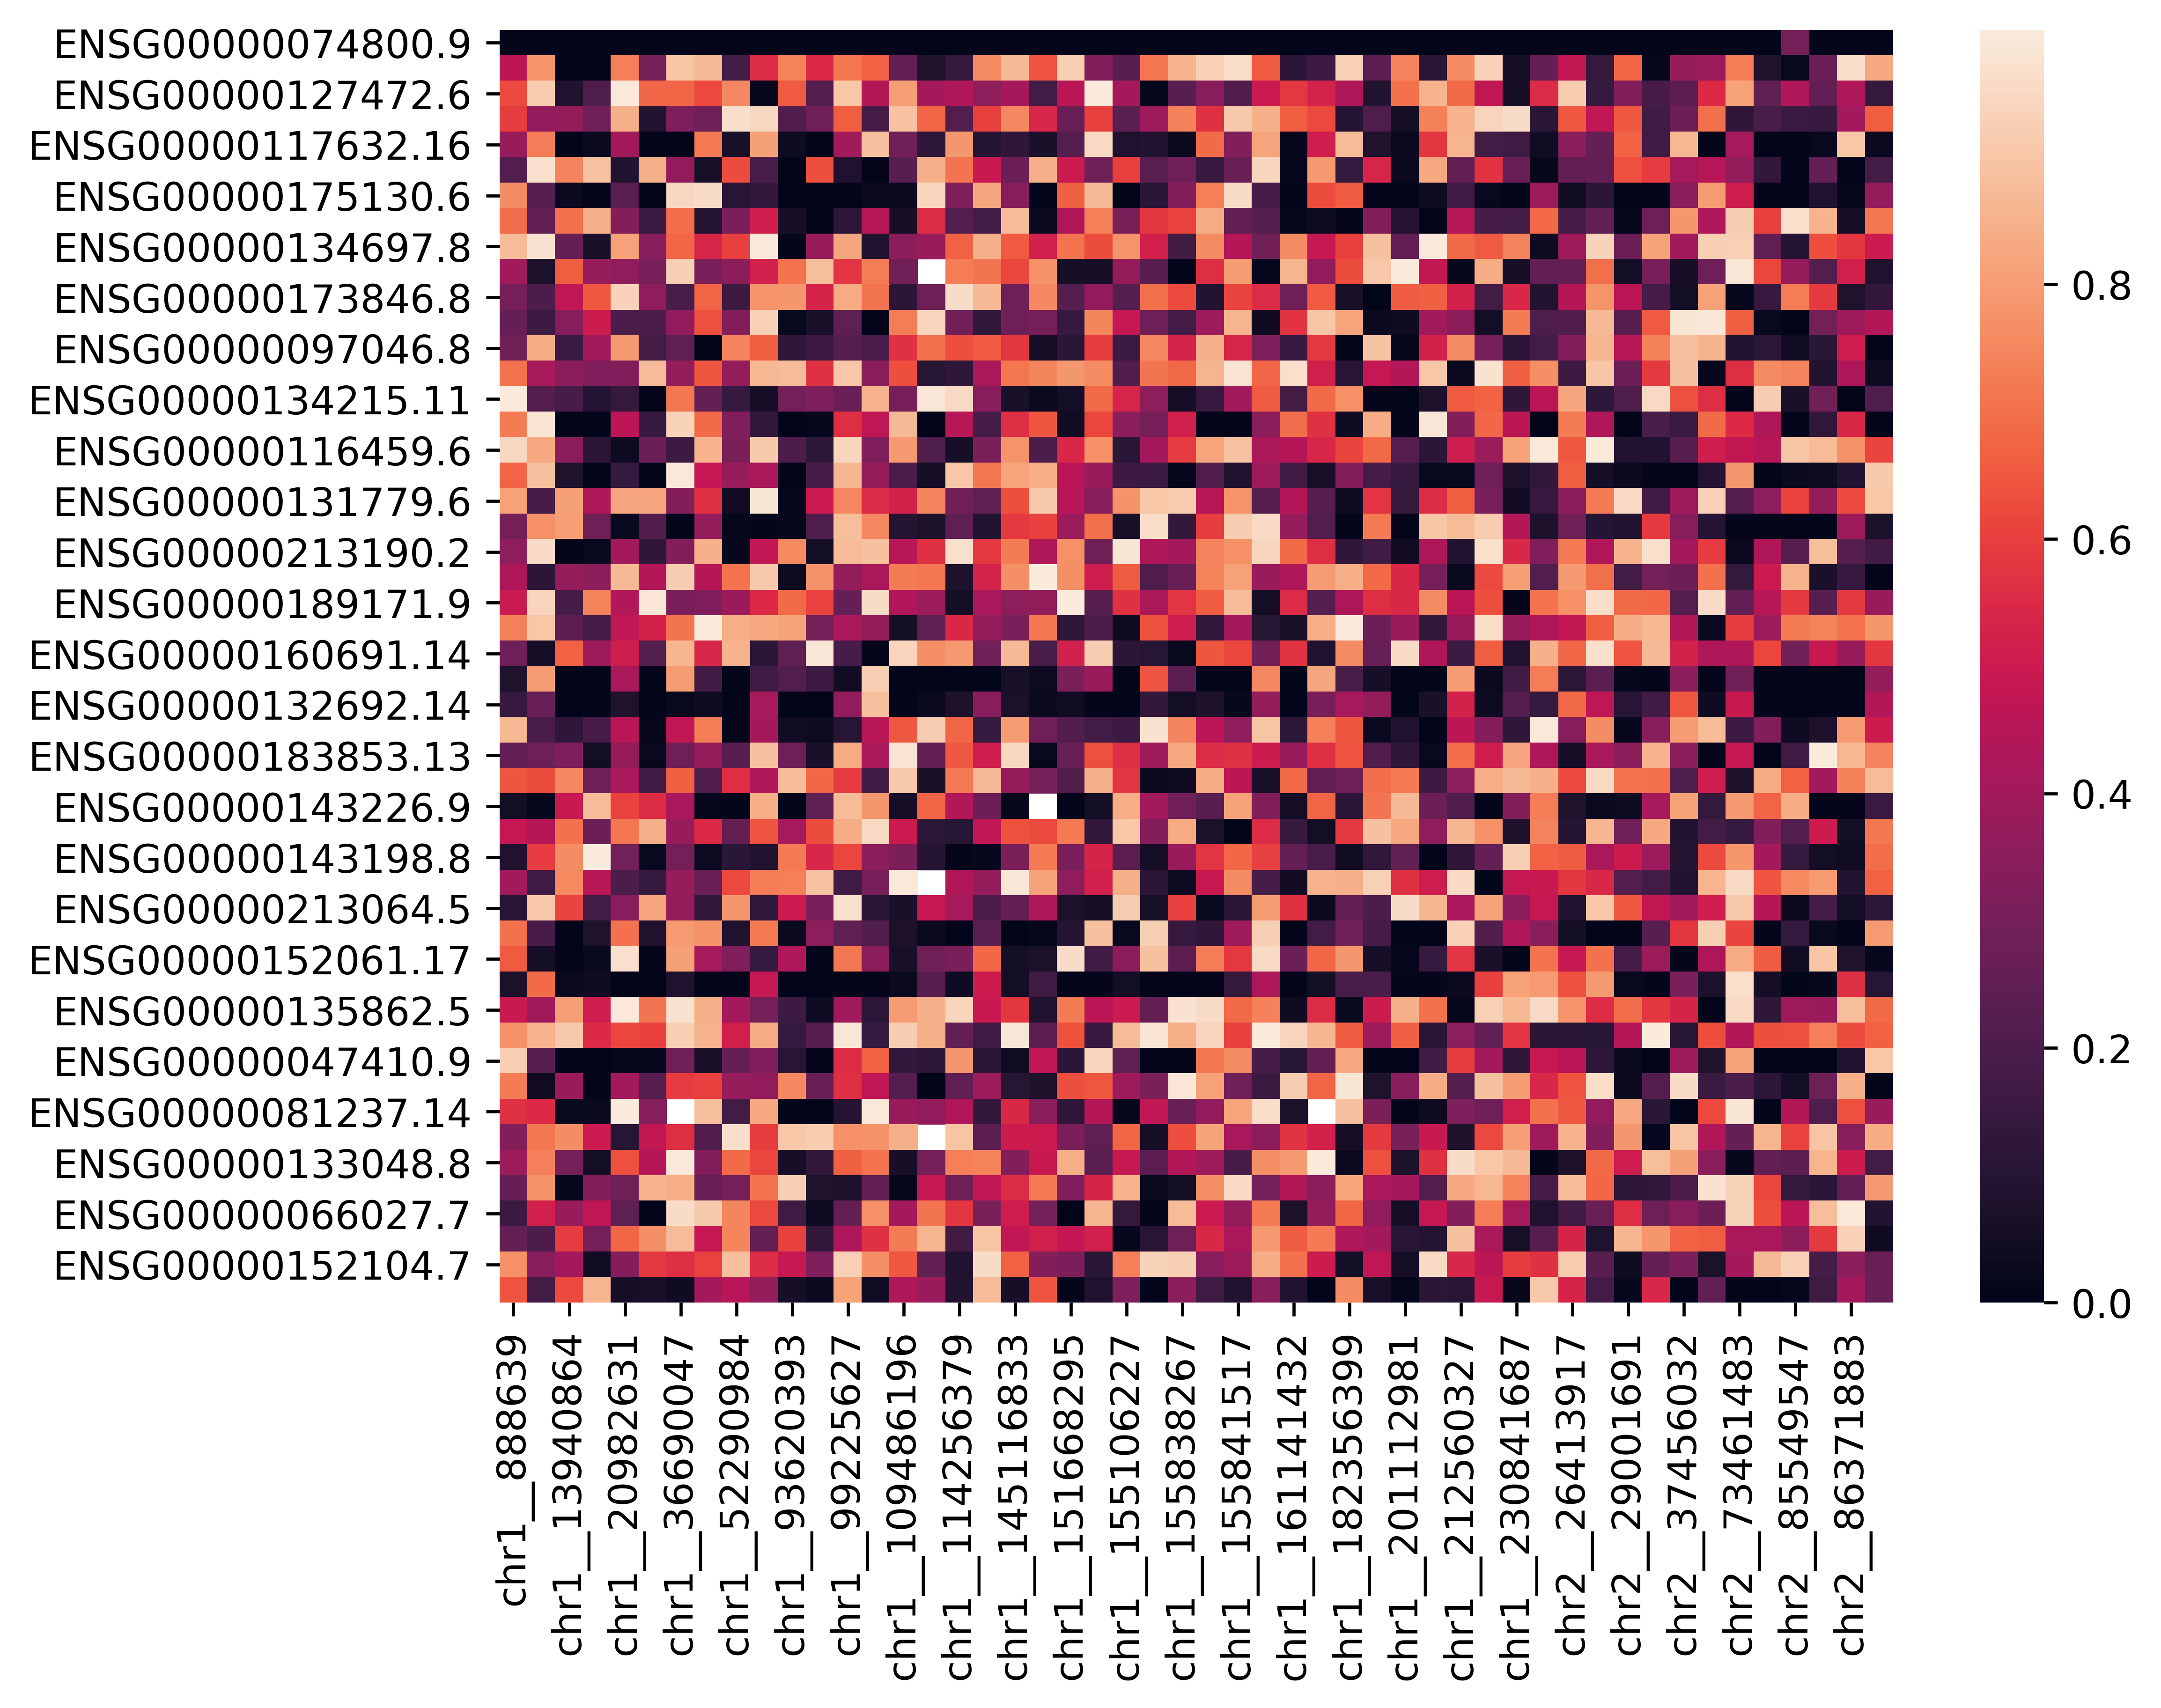

In [311]:
sns.heatmap(pvalue_Mes_Pro.iloc[:50,:50])

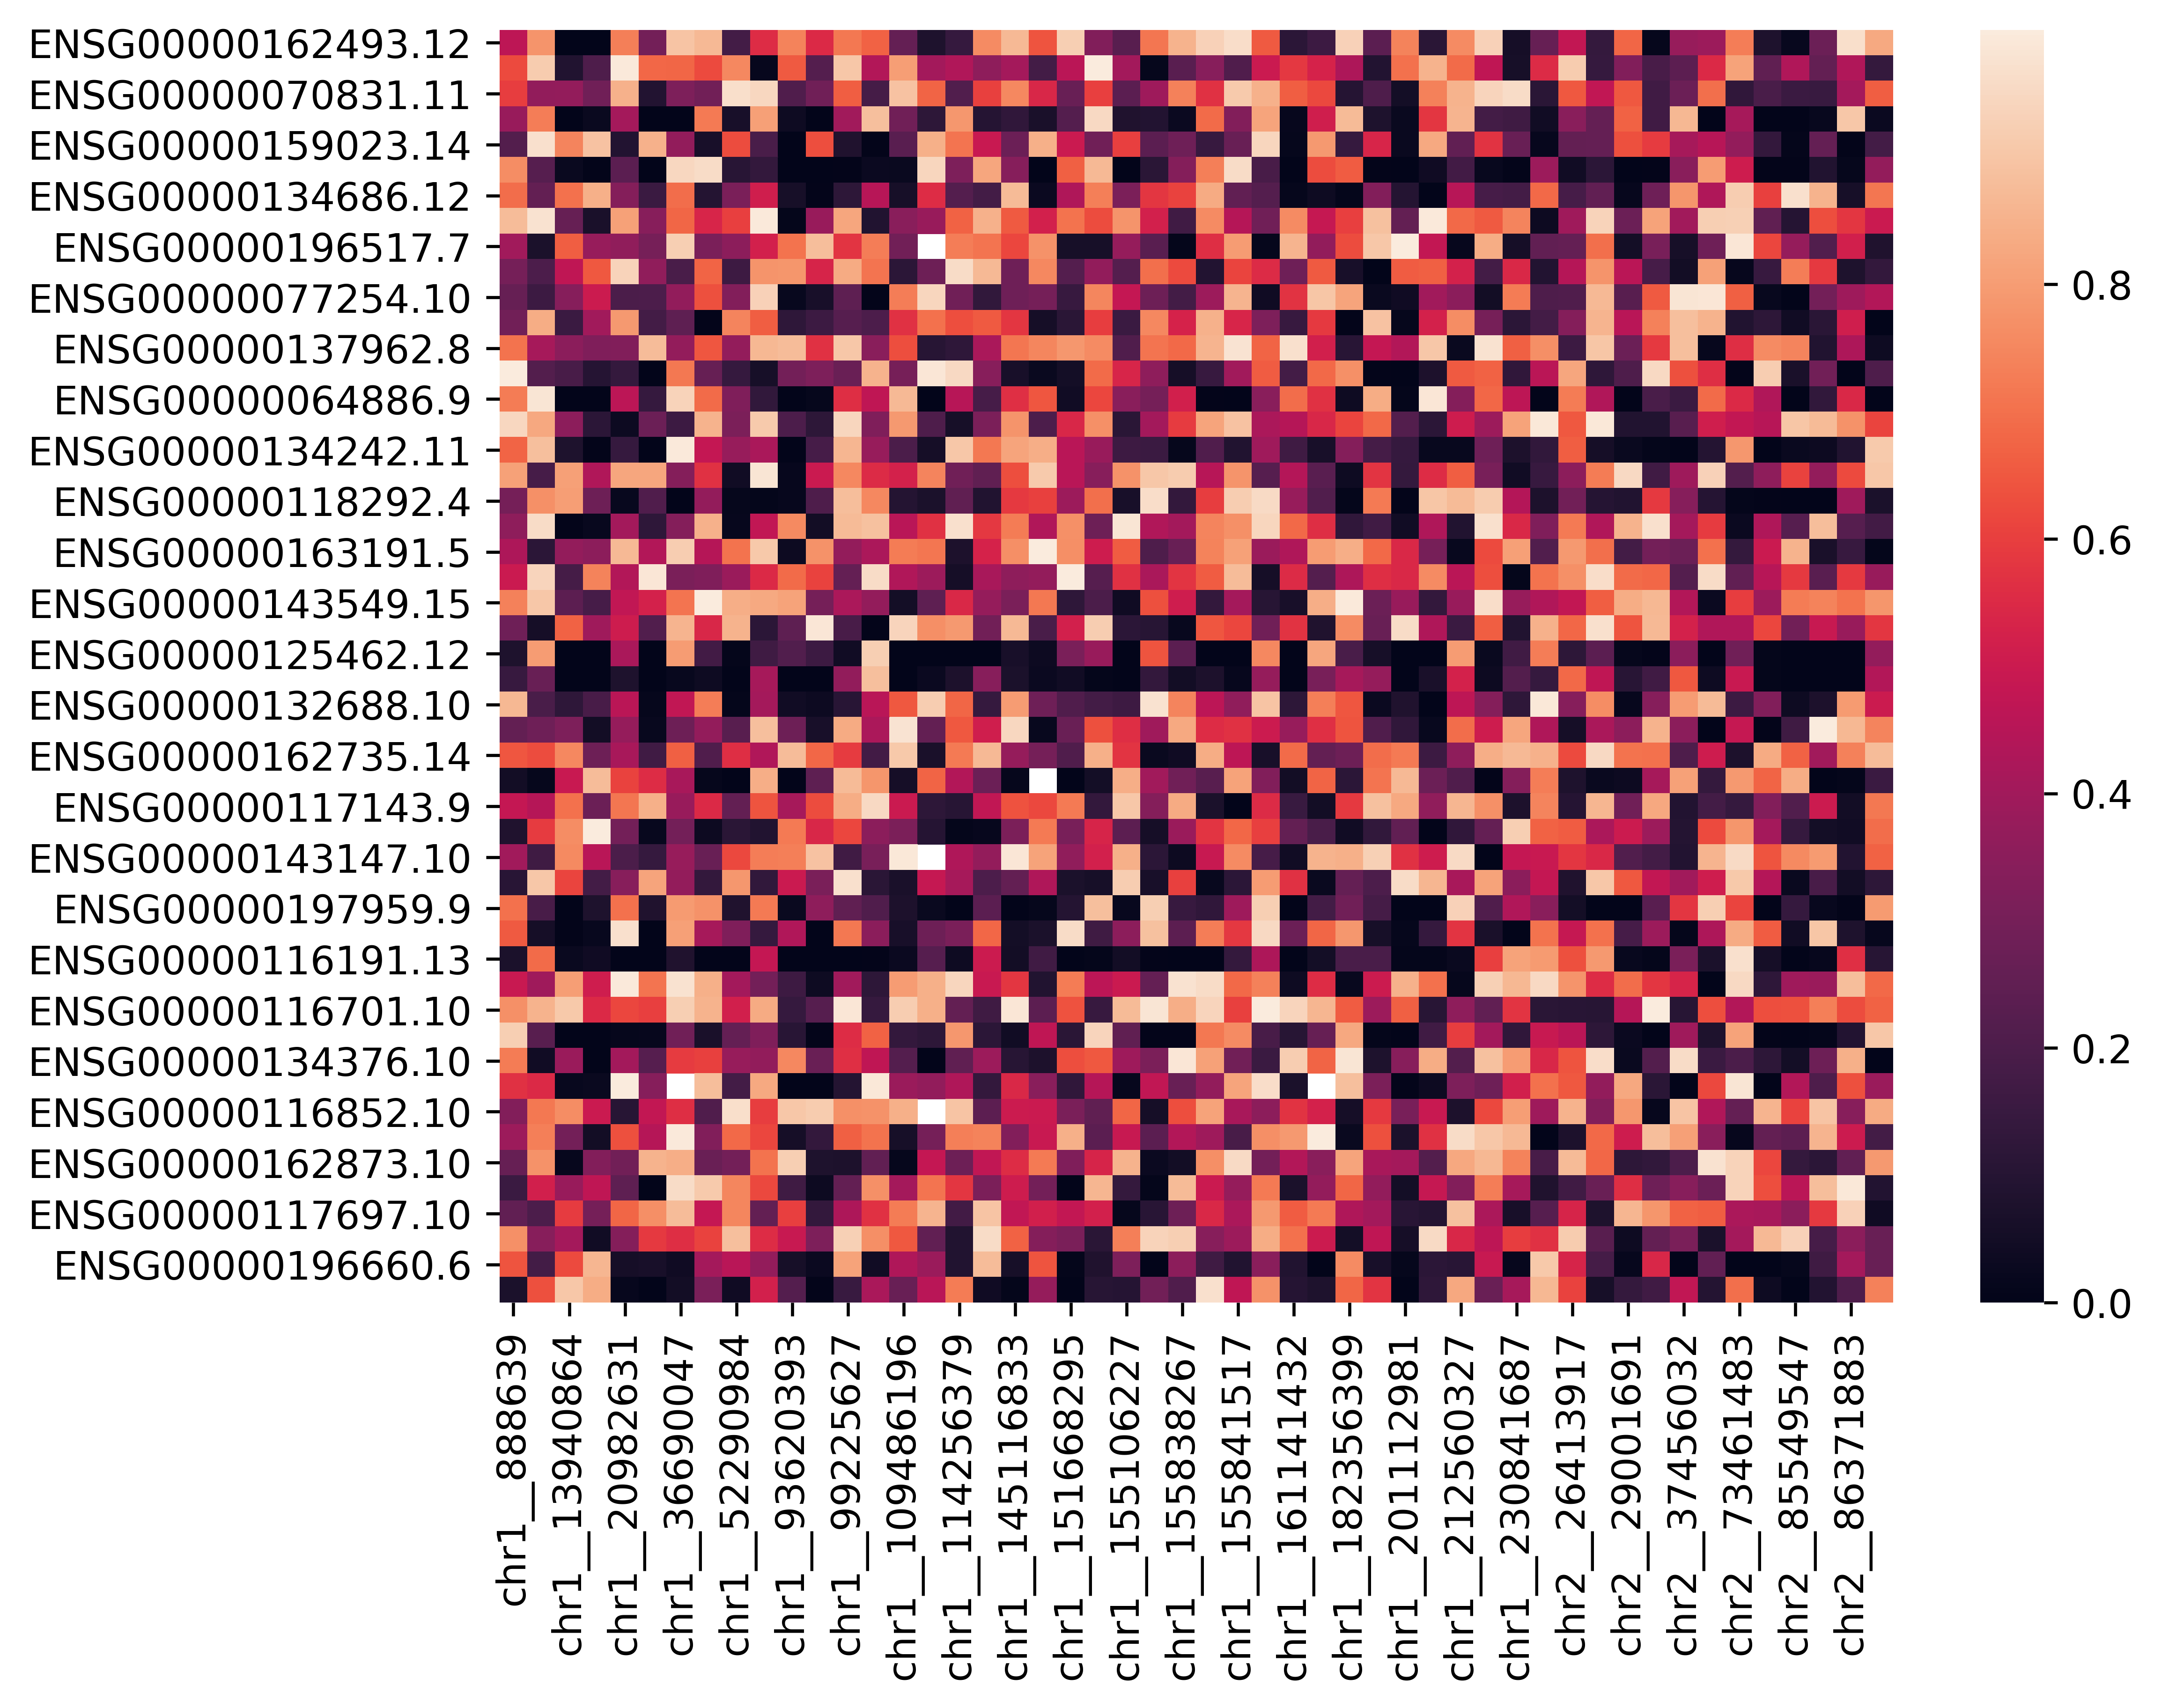

In [312]:
sns.heatmap(pvalue_Mes_Pro_filtered.iloc[:50,:50])

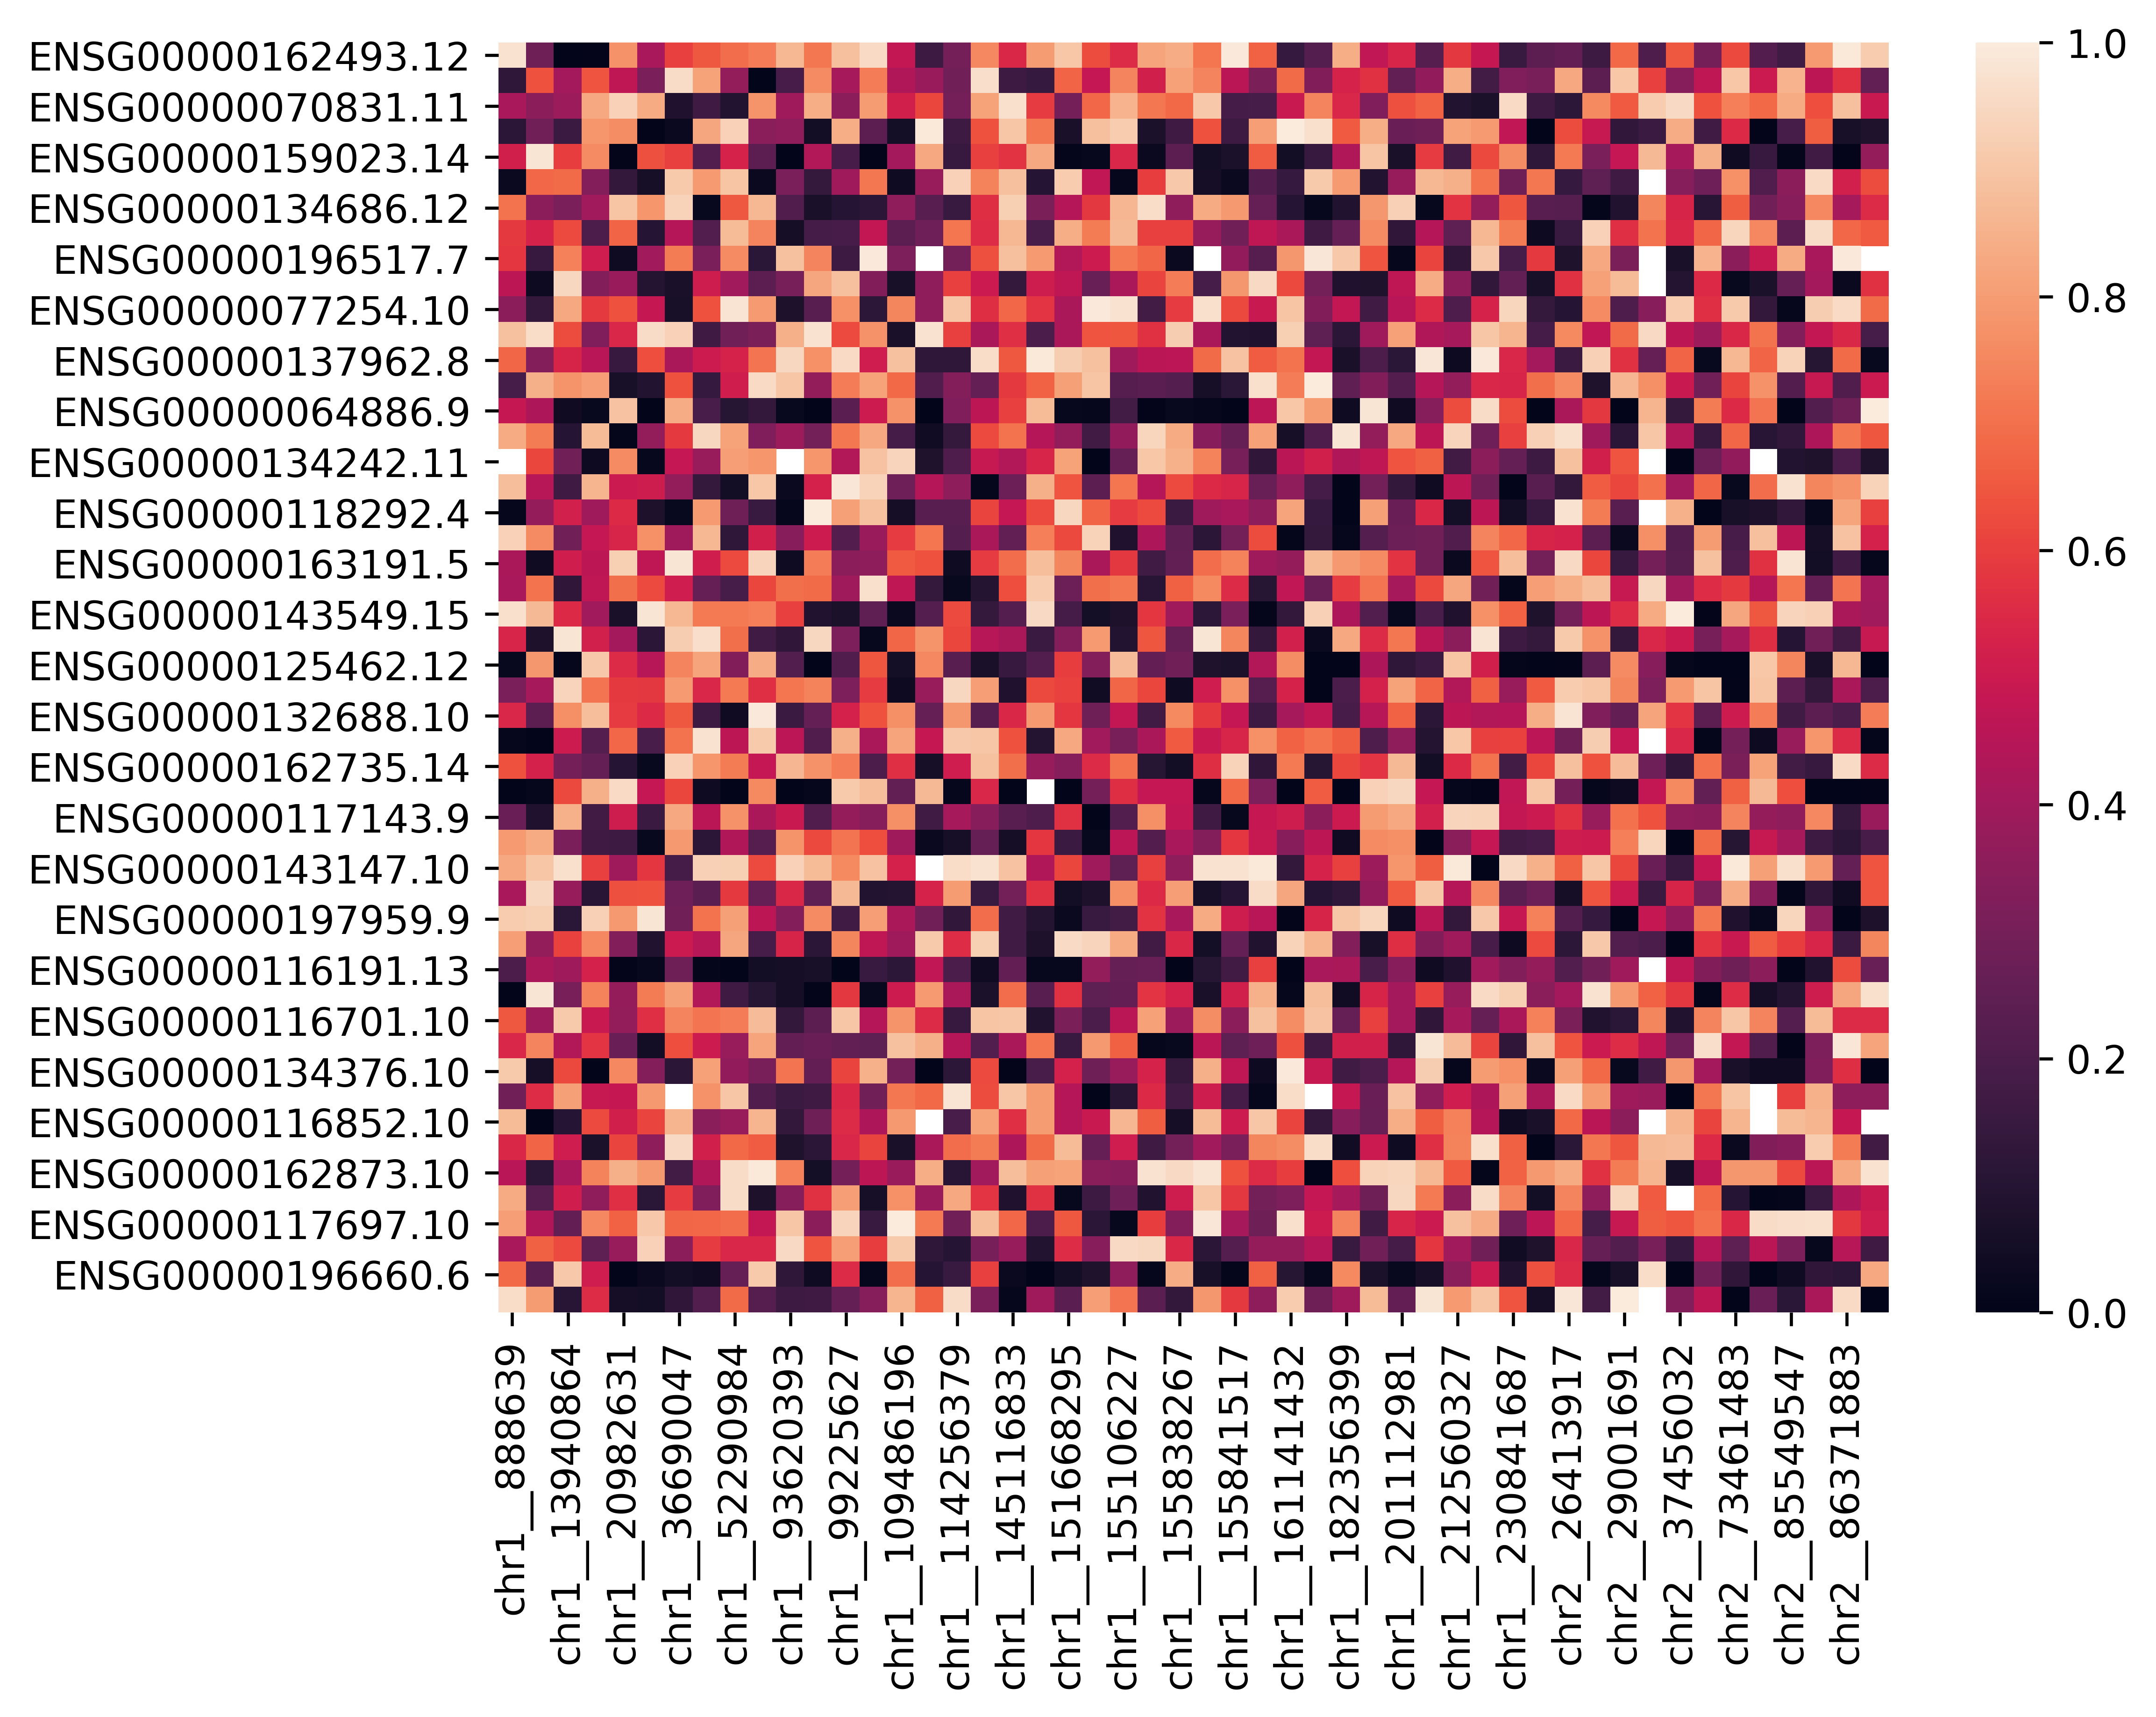

In [313]:
sns.heatmap(pvalue_Mes_filtered.iloc[:50,:50])

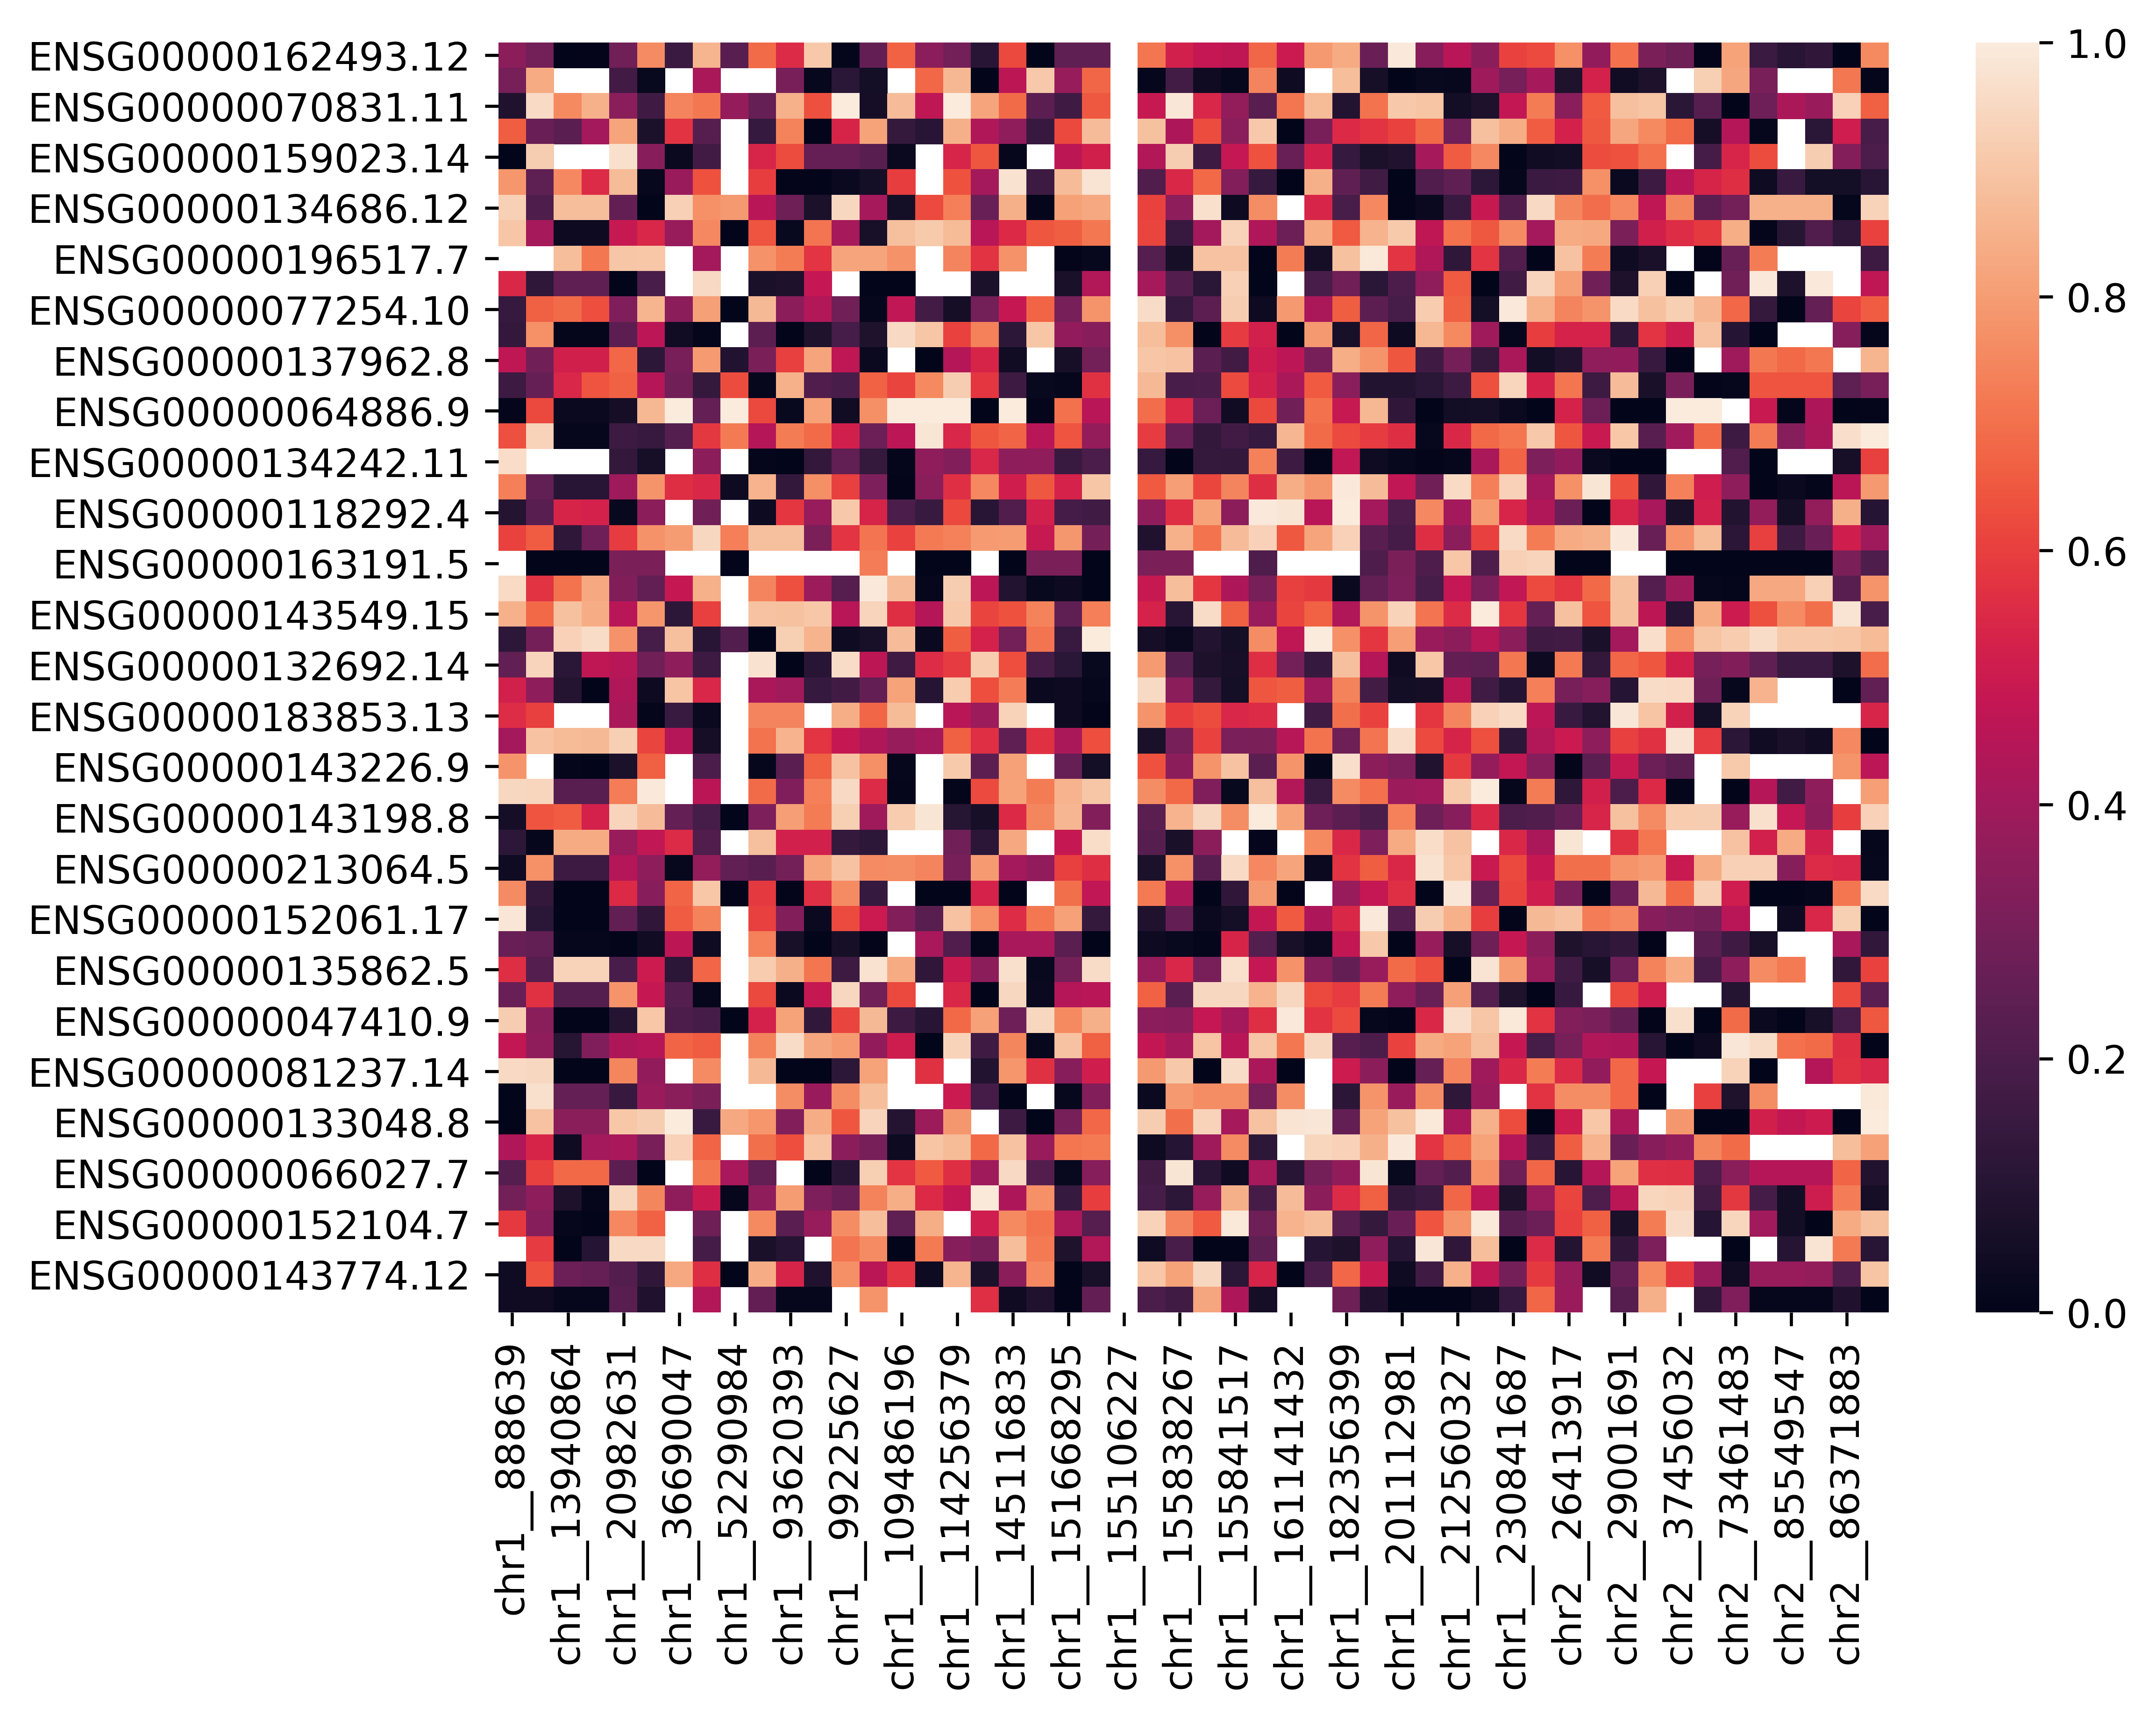

In [314]:
sns.heatmap(pvalue_Pro_filtered.iloc[:50,:50])

# Filter out too-many-zeros genes

In [574]:
gene_Mes_Pro_filtered = gene_Mes_Pro_filtered.loc[(gene_Mes_Pro_filtered > 2).sum(axis=1)[(gene_Mes_Pro_filtered > 2).sum(axis=1) > 30].index.values,]
gene_Mes_filtered = gene_Mes_filtered.loc[(gene_Mes_filtered > 2).sum(axis=1)[(gene_Mes_filtered > 2).sum(axis=1) > 20].index.values,]
gene_Pro_filtered = gene_Pro_filtered.loc[(gene_Pro_filtered > 2).sum(axis=1)[(gene_Pro_filtered > 2).sum(axis=1) > 20].index.values,]

In [575]:
pvalue_Mes_Pro_filtered = pvalue_Mes_Pro_filtered.loc[gene_Mes_Pro_filtered.index.values, ]
pvalue_Mes_filtered = pvalue_Mes_filtered.loc[gene_Mes_filtered.index.values, ]
pvalue_Pro_filtered = pvalue_Pro_filtered.loc[gene_Pro_filtered.index.values, ]

In [576]:
pvalue_Pro_filtered

chr6__44218120  chr4__95539267  chr19__14682804  \
ENSG00000070831.11        0.533144        0.297604         0.103590   
ENSG00000117632.16        0.288303        0.225582         0.986055   
ENSG00000175130.6         0.925980        0.434152         0.618999   
ENSG00000134686.12        0.682591        0.548148         0.856604   
ENSG00000134697.8         0.861233        0.996864         0.885244   
...                            ...             ...              ...   
ENSG00000123560.9         0.069478        0.019699         0.479416   
ENSG00000077279.12        0.026278        0.357430         0.474202   
ENSG00000102024.13        0.554089        0.915203         0.764549   
ENSG00000125676.15        0.736403        0.935019         0.980625   
ENSG00000029993.10        0.366032        0.013654         0.925601   

                    chr15__50773755  chr2__187630419  chr15__44093927  \
ENSG00000070831.11         0.313299         0.515037         0.509718   
ENSG00000117632.16         0.876301         0.278050         0.108423   
ENSG00000175130.6          0.030747         0.078850         0.830310   
ENSG00000134686.12         0.672964         0.246436         0.722693   
ENSG00000134697.8          0.957647         0.916190         0.144001   
...                             ...              ...              ...   
ENSG00000123560.9          0.477522         0.691693         0.460590   
ENSG00000077279.12         0.401000         0.340557         0.515913   
ENSG00000102024.13         0.465041         0.394405         0.647036   
ENSG00000125676.15         0.936284         0.380996         0.460229   
ENSG00000029993.10         0.059503         0.251285         0.151393   

                    chr7__127721507  chr3__156260245  chr17__20903776  \
ENSG00000070831.11         0.607405         0.353150         0.464552   
ENSG00000117632.16         0.587516         0.052133         0.877399   
ENSG00000175130.6          0.375212         0.116399         0.755351   
ENSG00000134686.12         0.899020         0.446084         0.271193   
ENSG00000134697.8          0.660045         0.855750         0.807602   
...                             ...              ...              ...   
ENSG00000123560.9          0.151846         0.230116         0.047226   
ENSG00000077279.12         0.089889         0.076786         0.048211   
ENSG00000102024.13         0.495394         0.412149         0.979250   
ENSG00000125676.15         0.467530         0.372994         0.352784   
ENSG00000029993.10         0.677521         0.588404         0.292795   

                    chr5__52856504  ...  chr3__197495334  chr5__176940384  \
ENSG00000070831.11        0.340679  ...         0.663487         0.779286   
ENSG00000117632.16        0.815931  ...         0.360417         0.325075   
ENSG00000175130.6         0.756570  ...         0.147934         0.793056   
ENSG00000134686.12        0.597991  ...         0.784500         0.517096   
ENSG00000134697.8         0.396059  ...         0.547014         0.849466   
...                            ...  ...              ...              ...   
ENSG00000123560.9         0.501815  ...         0.110734         0.935865   
ENSG00000077279.12        0.593831  ...         0.627997         0.297753   
ENSG00000102024.13        0.116109  ...         0.714261         0.704839   
ENSG00000125676.15        0.010921  ...         0.928664         0.472318   
ENSG00000029993.10        0.168225  ...         0.027466         0.043674   

                    chr4__6709812  chr10__120927793  chr9__35101522  \
ENSG00000070831.11       0.775350          0.685532        0.039962   
ENSG00000117632.16       0.927032          0.580606        0.427721   
ENSG00000175130.6        0.034922          0.142645        0.454929   
ENSG00000134686.12       0.158816          0.092671        0.961095   
ENSG00000134697.8        0.357784          0.566116        0.318460   
...                           ...               ...           

# Select SNVs

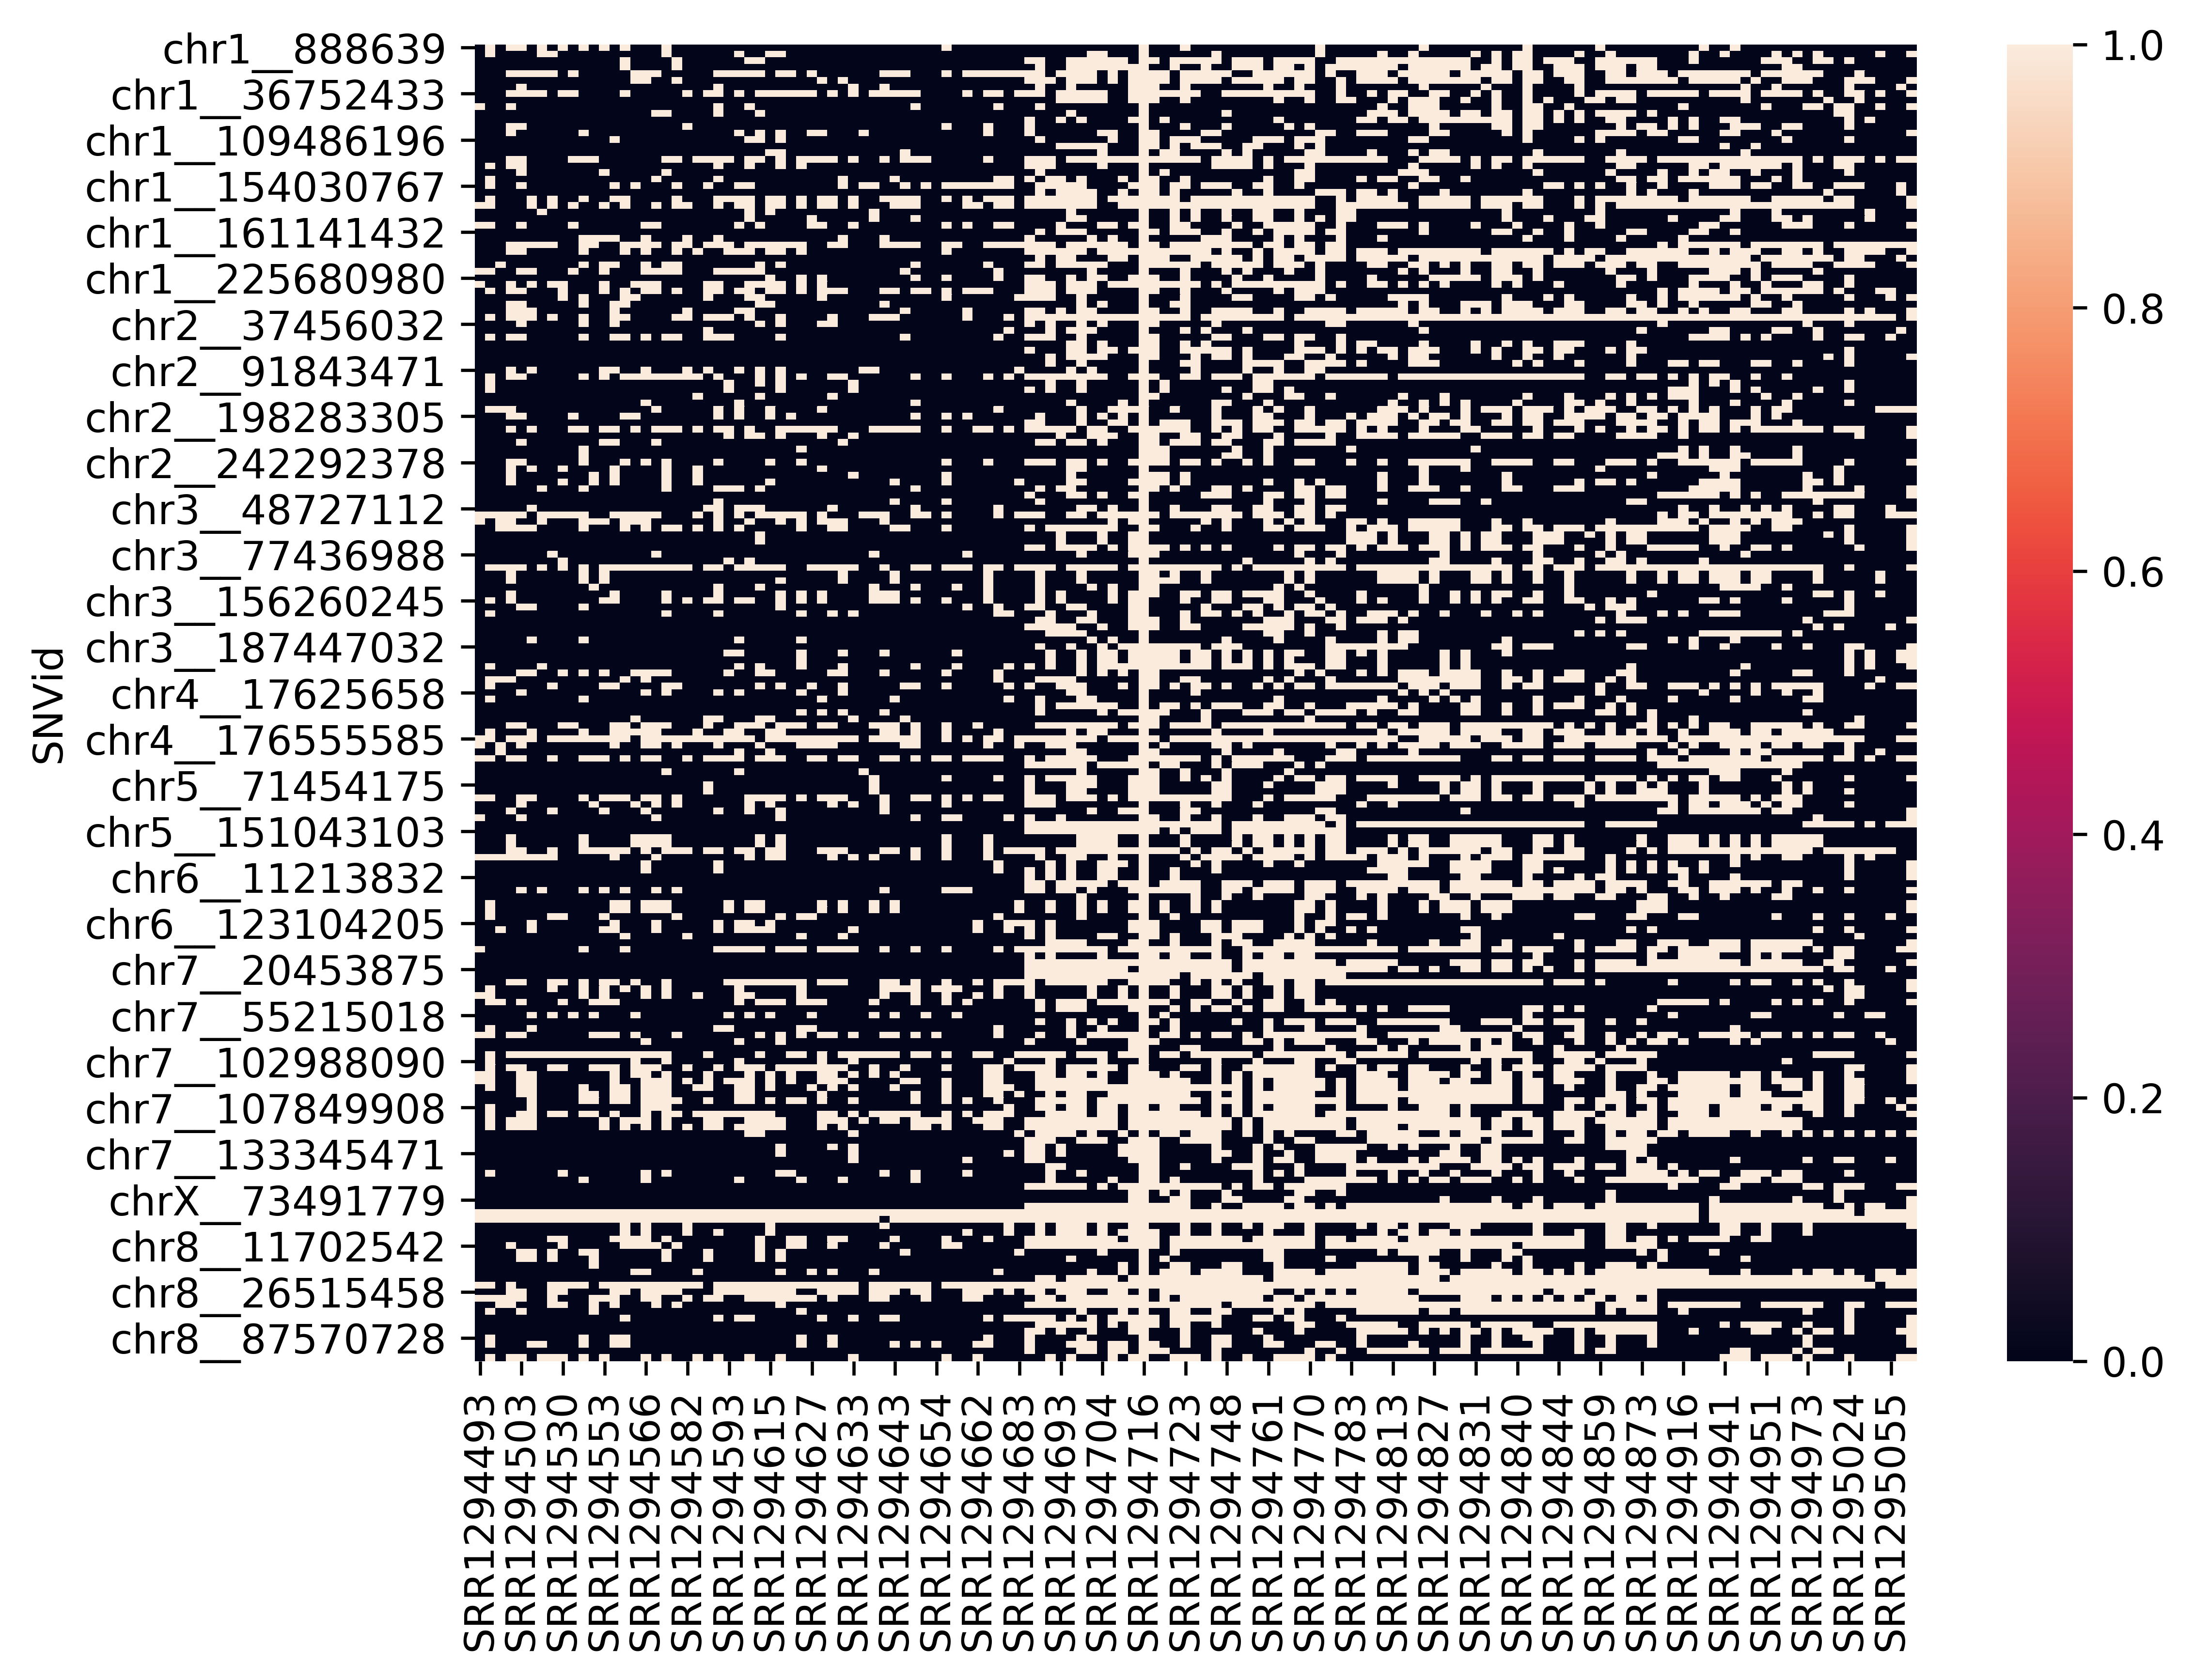

In [577]:
sns.heatmap(snv_Mes_Pro.iloc[:200,])

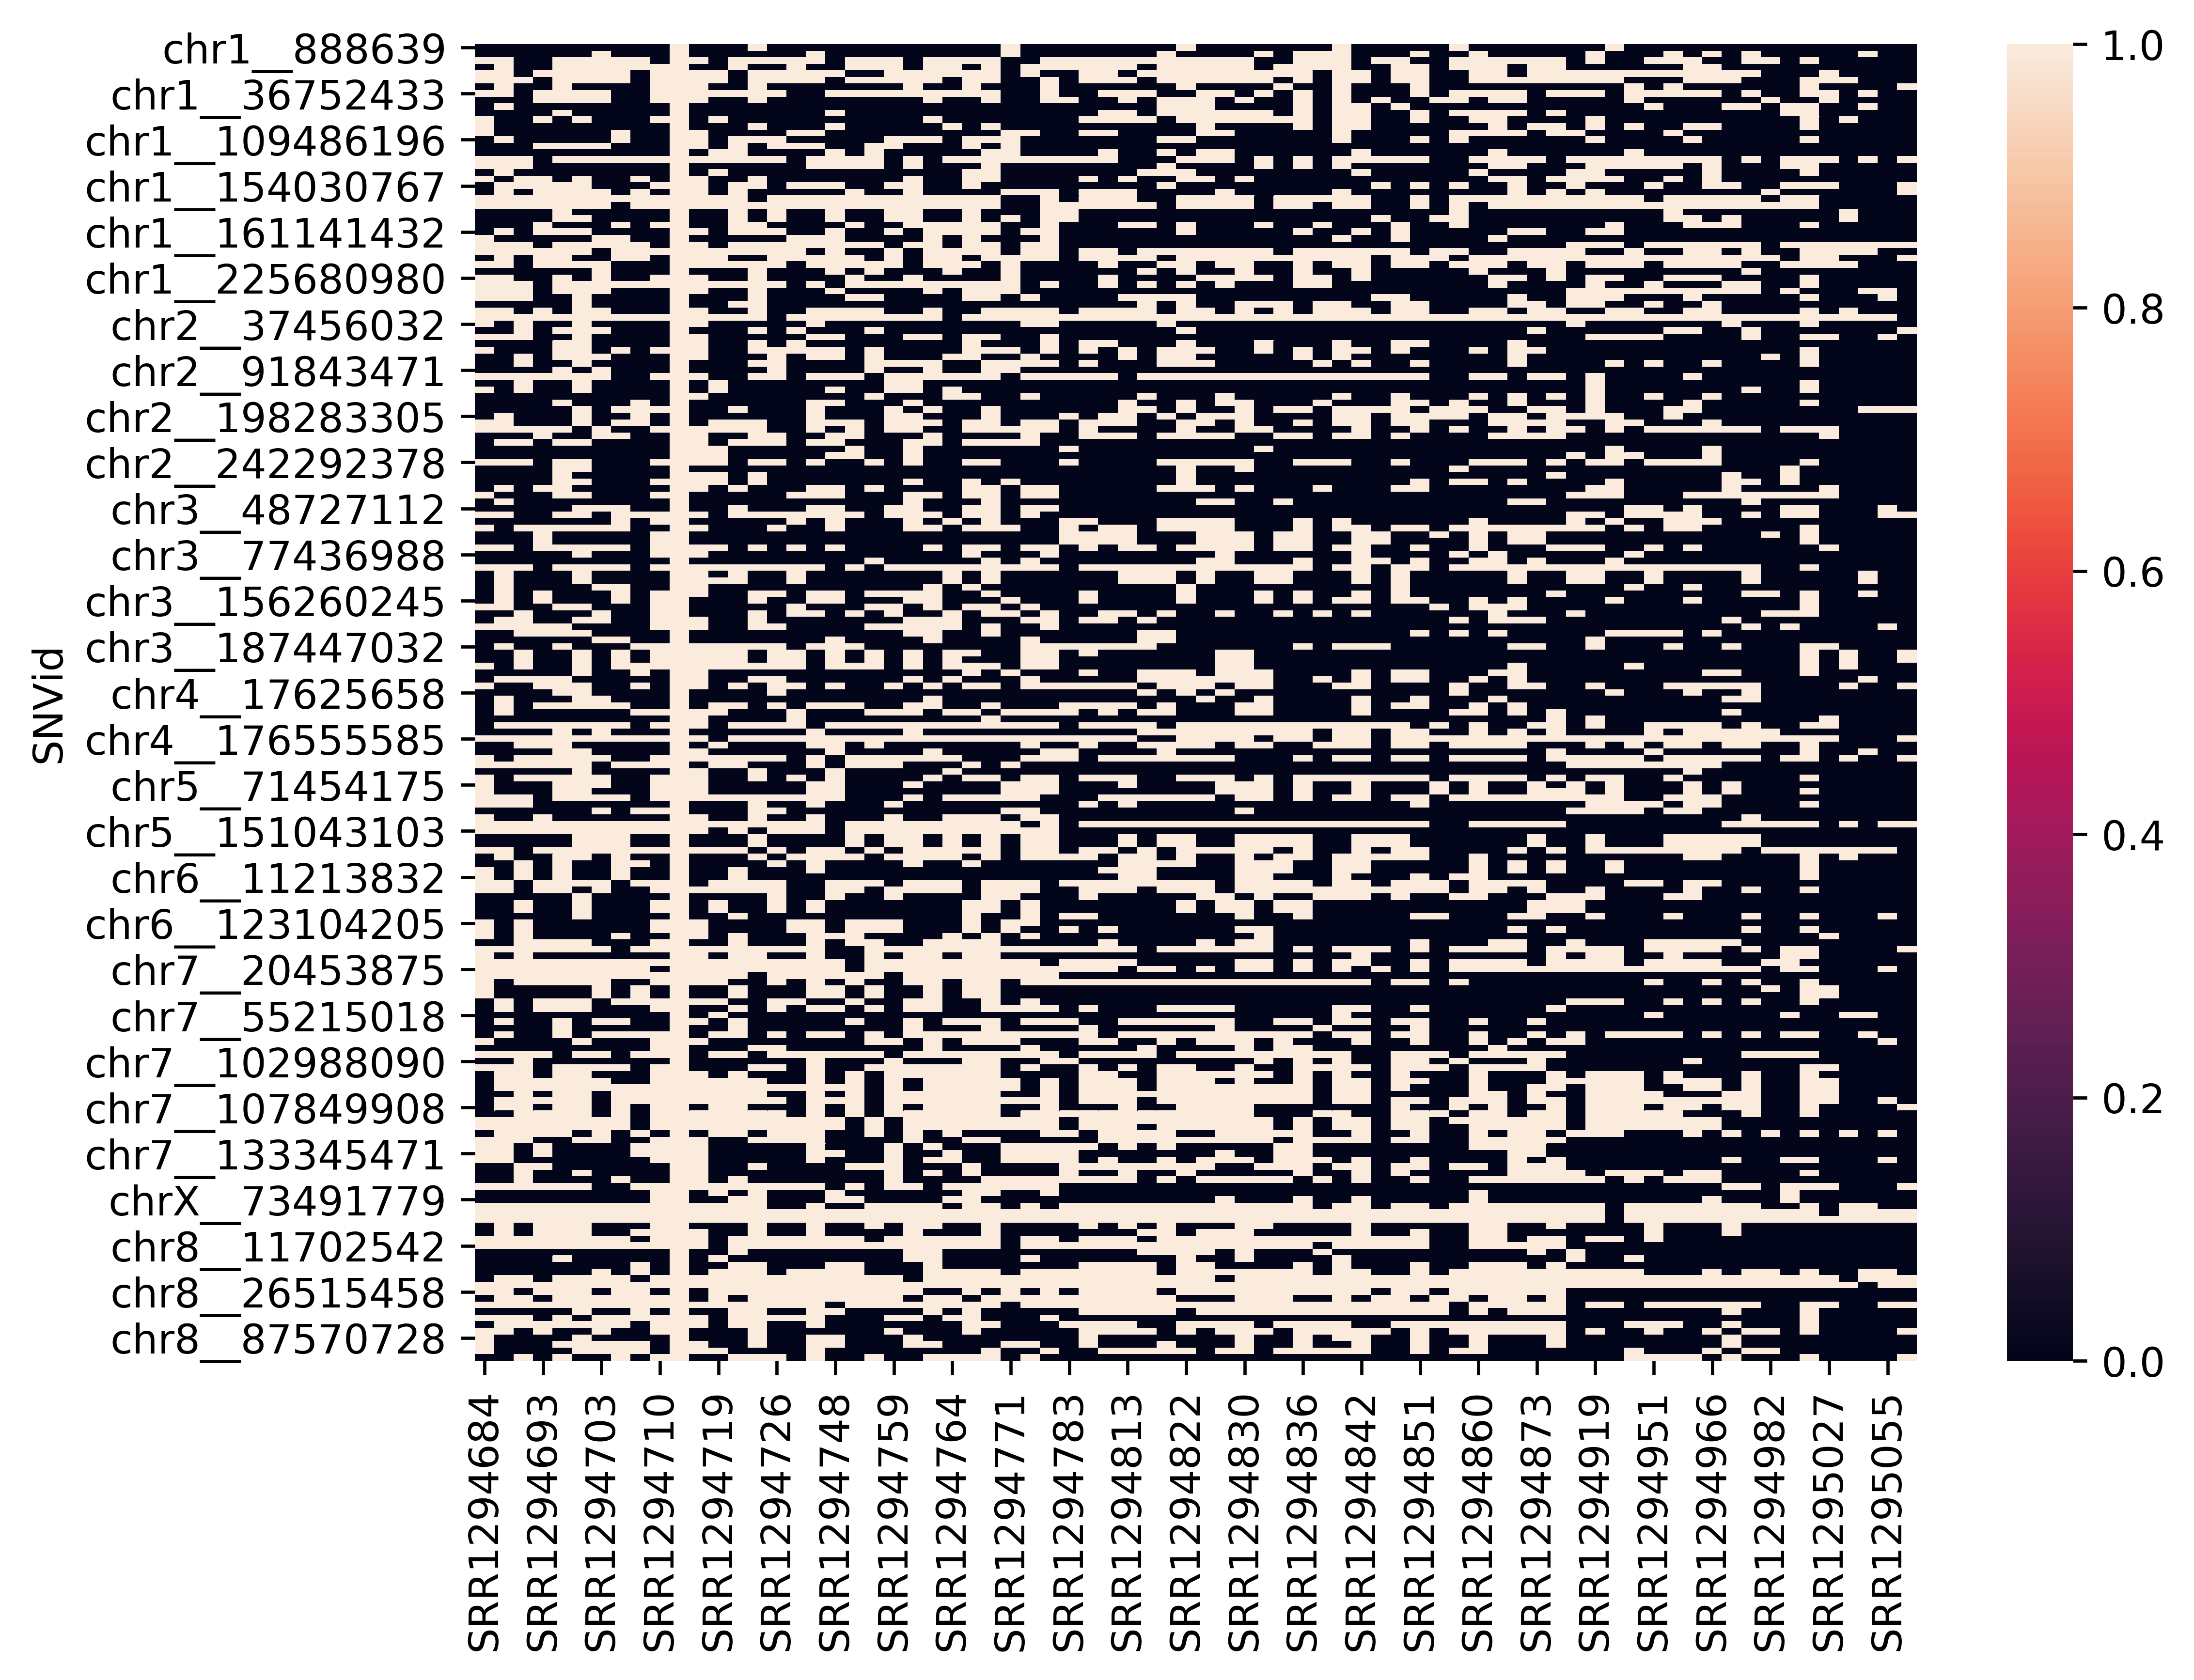

In [578]:
sns.heatmap(snv_Mes.iloc[:200,])

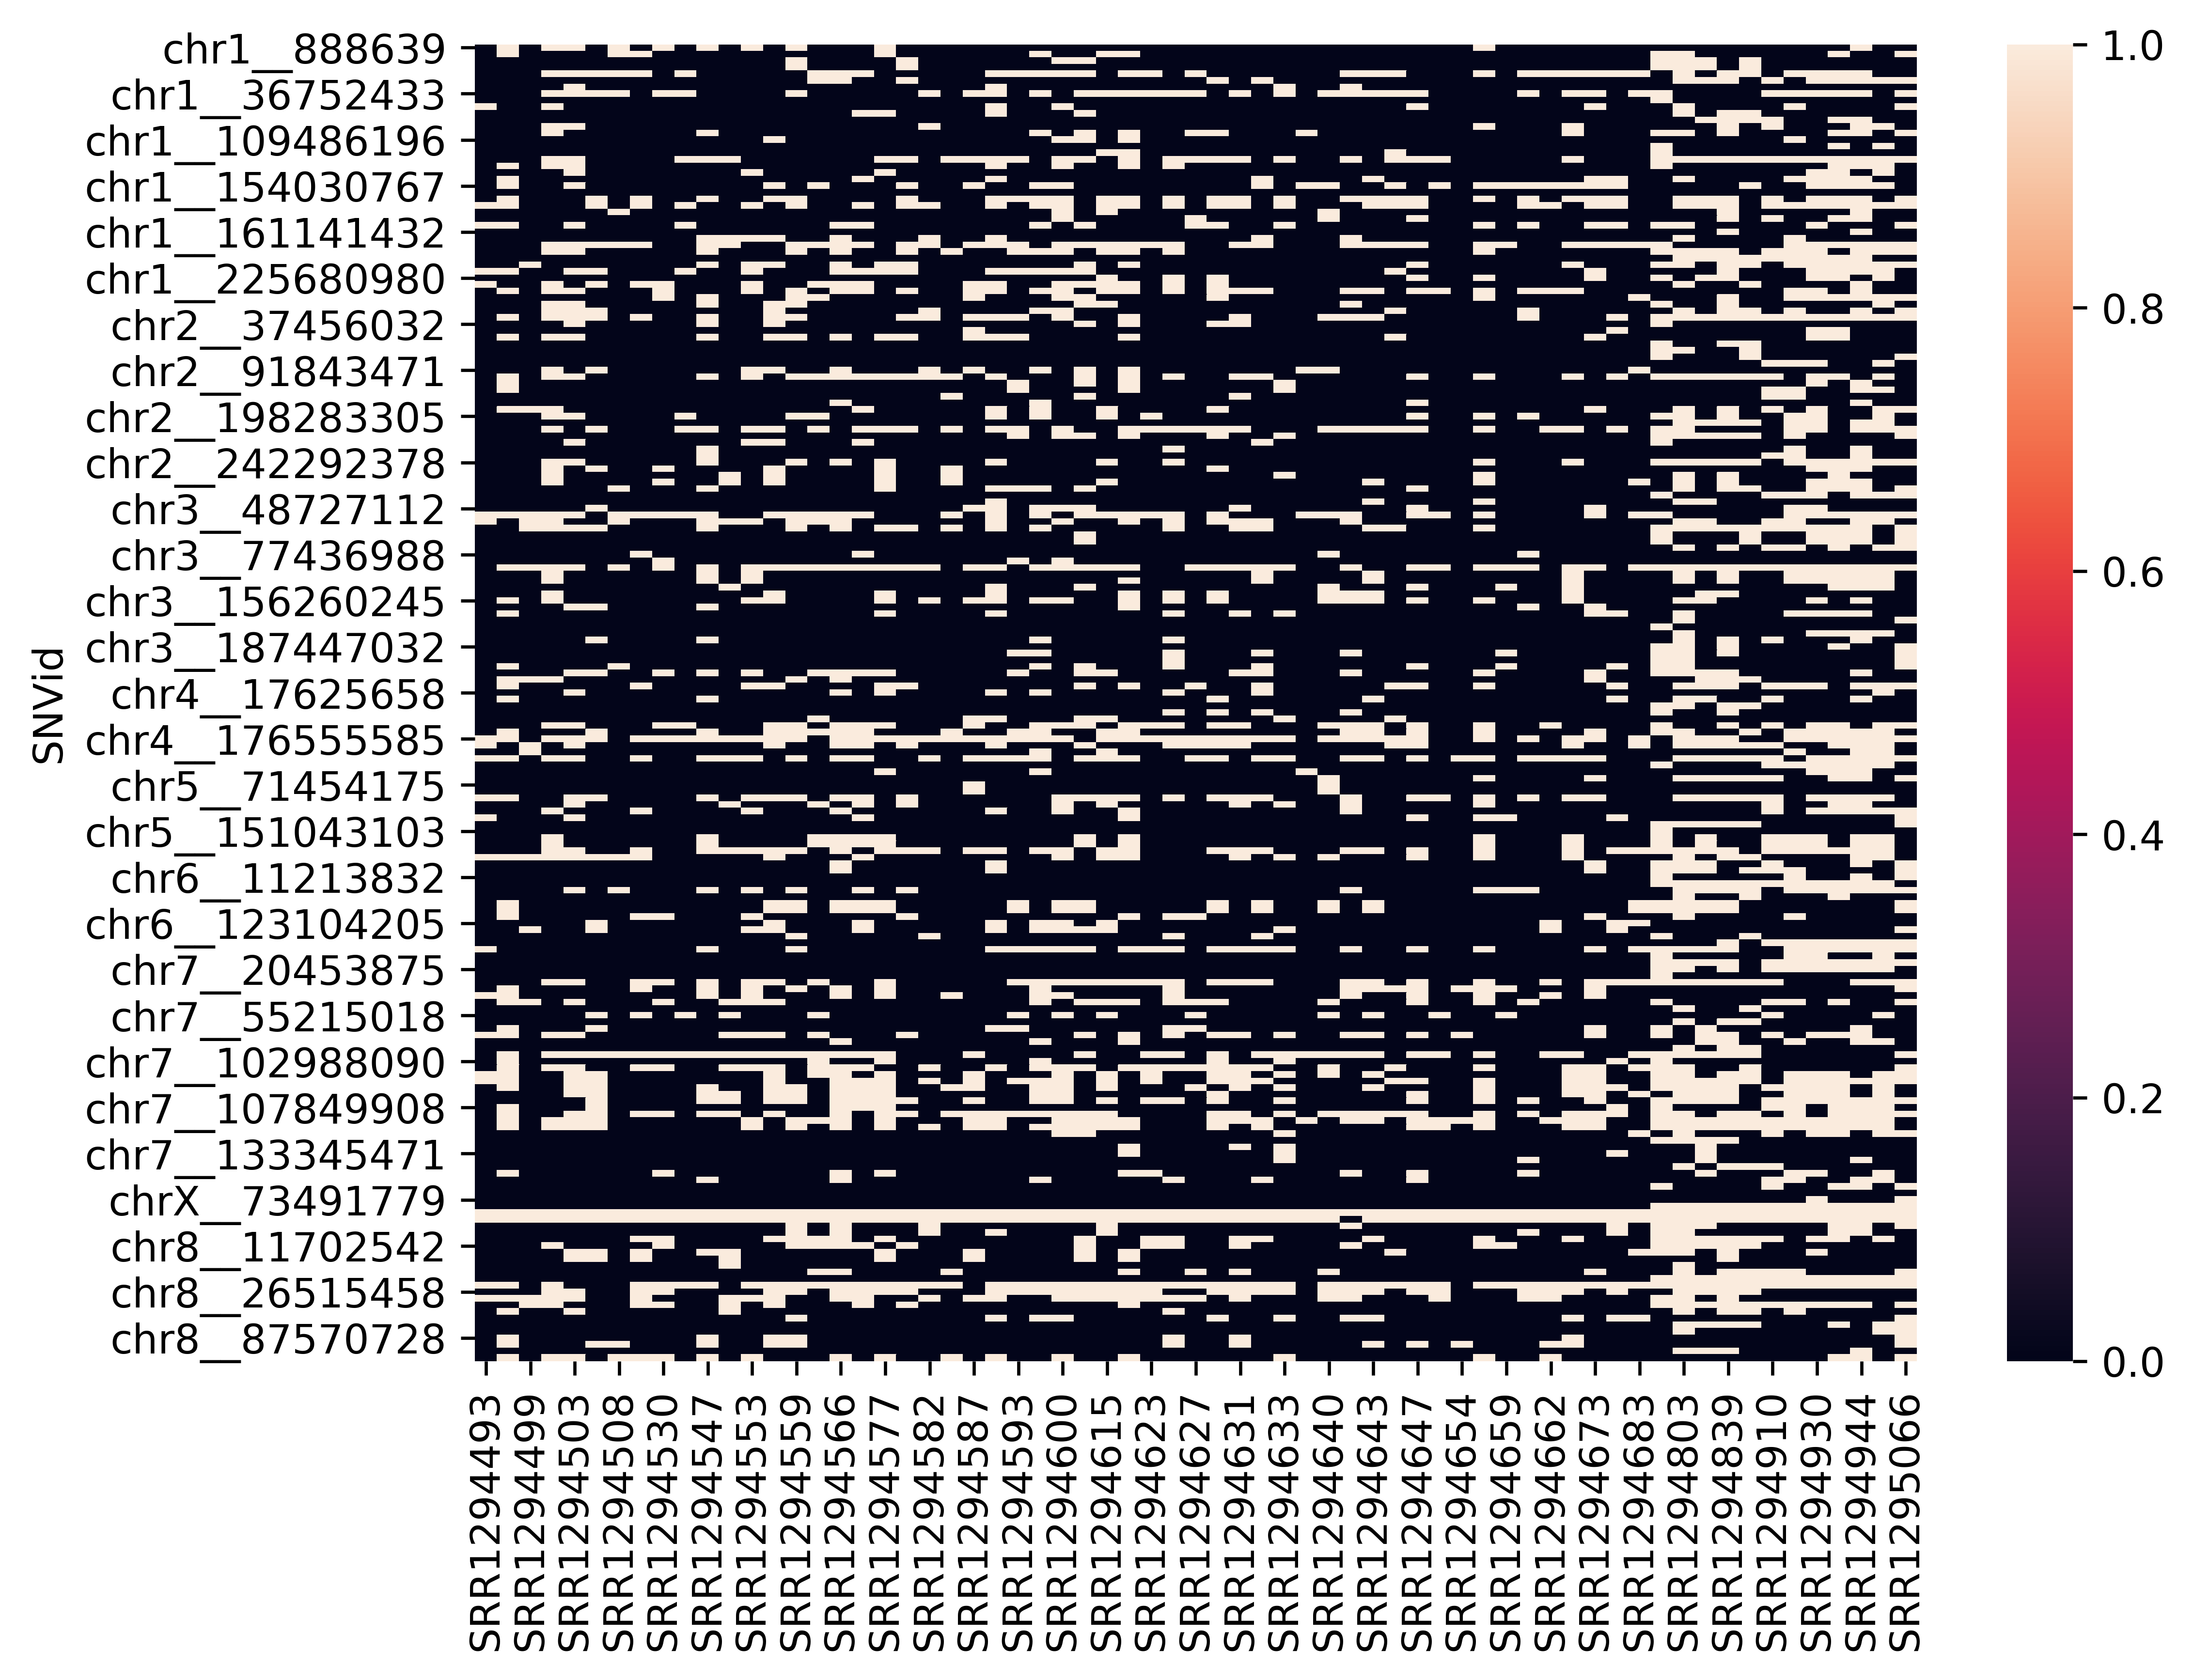

In [579]:
sns.heatmap(snv_Pro.iloc[:200,])

In [580]:
def select_snv(df,threshold = 20):
    # input is a snv matrix, snv*samples
    tmp_df = df.copy(deep=True)
    snv_yes = set((tmp_df == 1).sum(axis=1)[(tmp_df == 1).sum(axis=1) >= threshold].index.values)
    snv_no = set((tmp_df == 0).sum(axis=1)[(tmp_df == 0).sum(axis=1) >= threshold].index.values)
    snv_valid = snv_yes.intersection(snv_no)
    #tmp_df = tmp_df.loc[snv_valid,:]
    return snv_valid

In [581]:
snv_valid_Mes_Pro = select_snv(snv_Mes_Pro)
snv_valid_Mes = select_snv(snv_Mes)
snv_valid_Pro = select_snv(snv_Pro)

In [582]:
len(snv_valid_Mes_Pro)

1569

In [583]:
len(snv_valid_Mes)

702

In [584]:
len(snv_valid_Pro)

354

In [585]:
pvalue_Mes_Pro_filtered = pvalue_Mes_Pro_filtered.loc[:,snv_valid_Mes_Pro]
pvalue_Mes_filtered = pvalue_Mes_filtered.loc[:,snv_valid_Mes]
pvalue_Pro_filtered = pvalue_Pro_filtered.loc[:,snv_valid_Pro]

# Adjust p-value

In [586]:
def df2col(df):
    #df is pvalue dataframe
    row_num = df.shape[0]
    col_num = df.shape[1]
    tmp = 0
    tmp_index_list = []
    for i in range(row_num):
        for j in range(col_num):
            tmp = tmp +1
            k = df.index.values[i] + "____" + df.columns.values[j]
            tmp_index_list.append(k)
    df_one_column = pd.DataFrame({'pvalue':df.values.reshape(-1)})
    df_one_column.index = tmp_index_list
    return df_one_column
    

In [587]:
pvalue_Mes_Pro_col = df2col(pvalue_Mes_Pro_filtered)
pvalue_Mes_col = df2col(pvalue_Mes_filtered)
pvalue_Pro_col = df2col(pvalue_Pro_filtered)
#remove nan value
pvalue_Mes_Pro_col_valid = pvalue_Mes_Pro_col.loc[~pvalue_Mes_Pro_col.isna().pvalue,]
pvalue_Mes_col_valid = pvalue_Mes_col.loc[~pvalue_Mes_col.isna().pvalue,]
pvalue_Pro_col_valid = pvalue_Pro_col.loc[~pvalue_Pro_col.isna().pvalue,]

In [588]:
pvalue_Mes_Pro_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Mes_Pro_col_valid.pvalue.values,alpha=0.05)
pvalue_Mes_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Mes_col_valid.pvalue.values,alpha=0.05)
pvalue_Pro_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Pro_col_valid.pvalue.values,alpha=0.05)

In [589]:
pvalue_Mes_Pro_col_final = pvalue_Mes_Pro_col_valid.copy(deep=True)
pvalue_Mes_Pro_col_final['pvalue_adj'] = pvalue_Mes_Pro_adjusted[1]

pvalue_Mes_col_final = pvalue_Mes_col_valid.copy(deep=True)
pvalue_Mes_col_final['pvalue_adj'] = pvalue_Mes_adjusted[1]

pvalue_Pro_col_final = pvalue_Pro_col_valid.copy(deep=True)
pvalue_Pro_col_final['pvalue_adj'] = pvalue_Pro_adjusted[1]

In [603]:
pair_Mes_Pro = set(pvalue_Mes_Pro_col_final[pvalue_Mes_Pro_col_final['pvalue_adj']<0.01].index.values)
pair_Mes = set(pvalue_Mes_col_final[pvalue_Mes_col_final['pvalue_adj']<0.01].index.values)
pair_Pro = set(pvalue_Pro_col_final[pvalue_Pro_col_final['pvalue_adj']<0.01].index.values)

In [949]:
len(pair_Mes_Pro)

1421

In [950]:
len(pair_Mes)

233

In [951]:
len(pair_Pro)

26

# Result

In [604]:
# only
only_Mes_Pro = pair_Mes_Pro - pair_Mes - pair_Pro 
only_Mes = pair_Mes -  pair_Pro - pair_Mes_Pro
only_Pro = pair_Pro -  pair_Mes - pair_Mes_Pro
# all
all_Mes_Pro = pair_Mes_Pro.intersection(pair_Mes).intersection(pair_Pro)
# two
two_Mes_Pro__Mes = pair_Mes_Pro.intersection(pair_Mes) - all_Mes_Pro
two_Mes_Pro__Pro = pair_Mes_Pro.intersection(pair_Pro) - all_Mes_Pro
two_Mes__Pro = pair_Mes.intersection(pair_Pro) - all_Mes_Pro

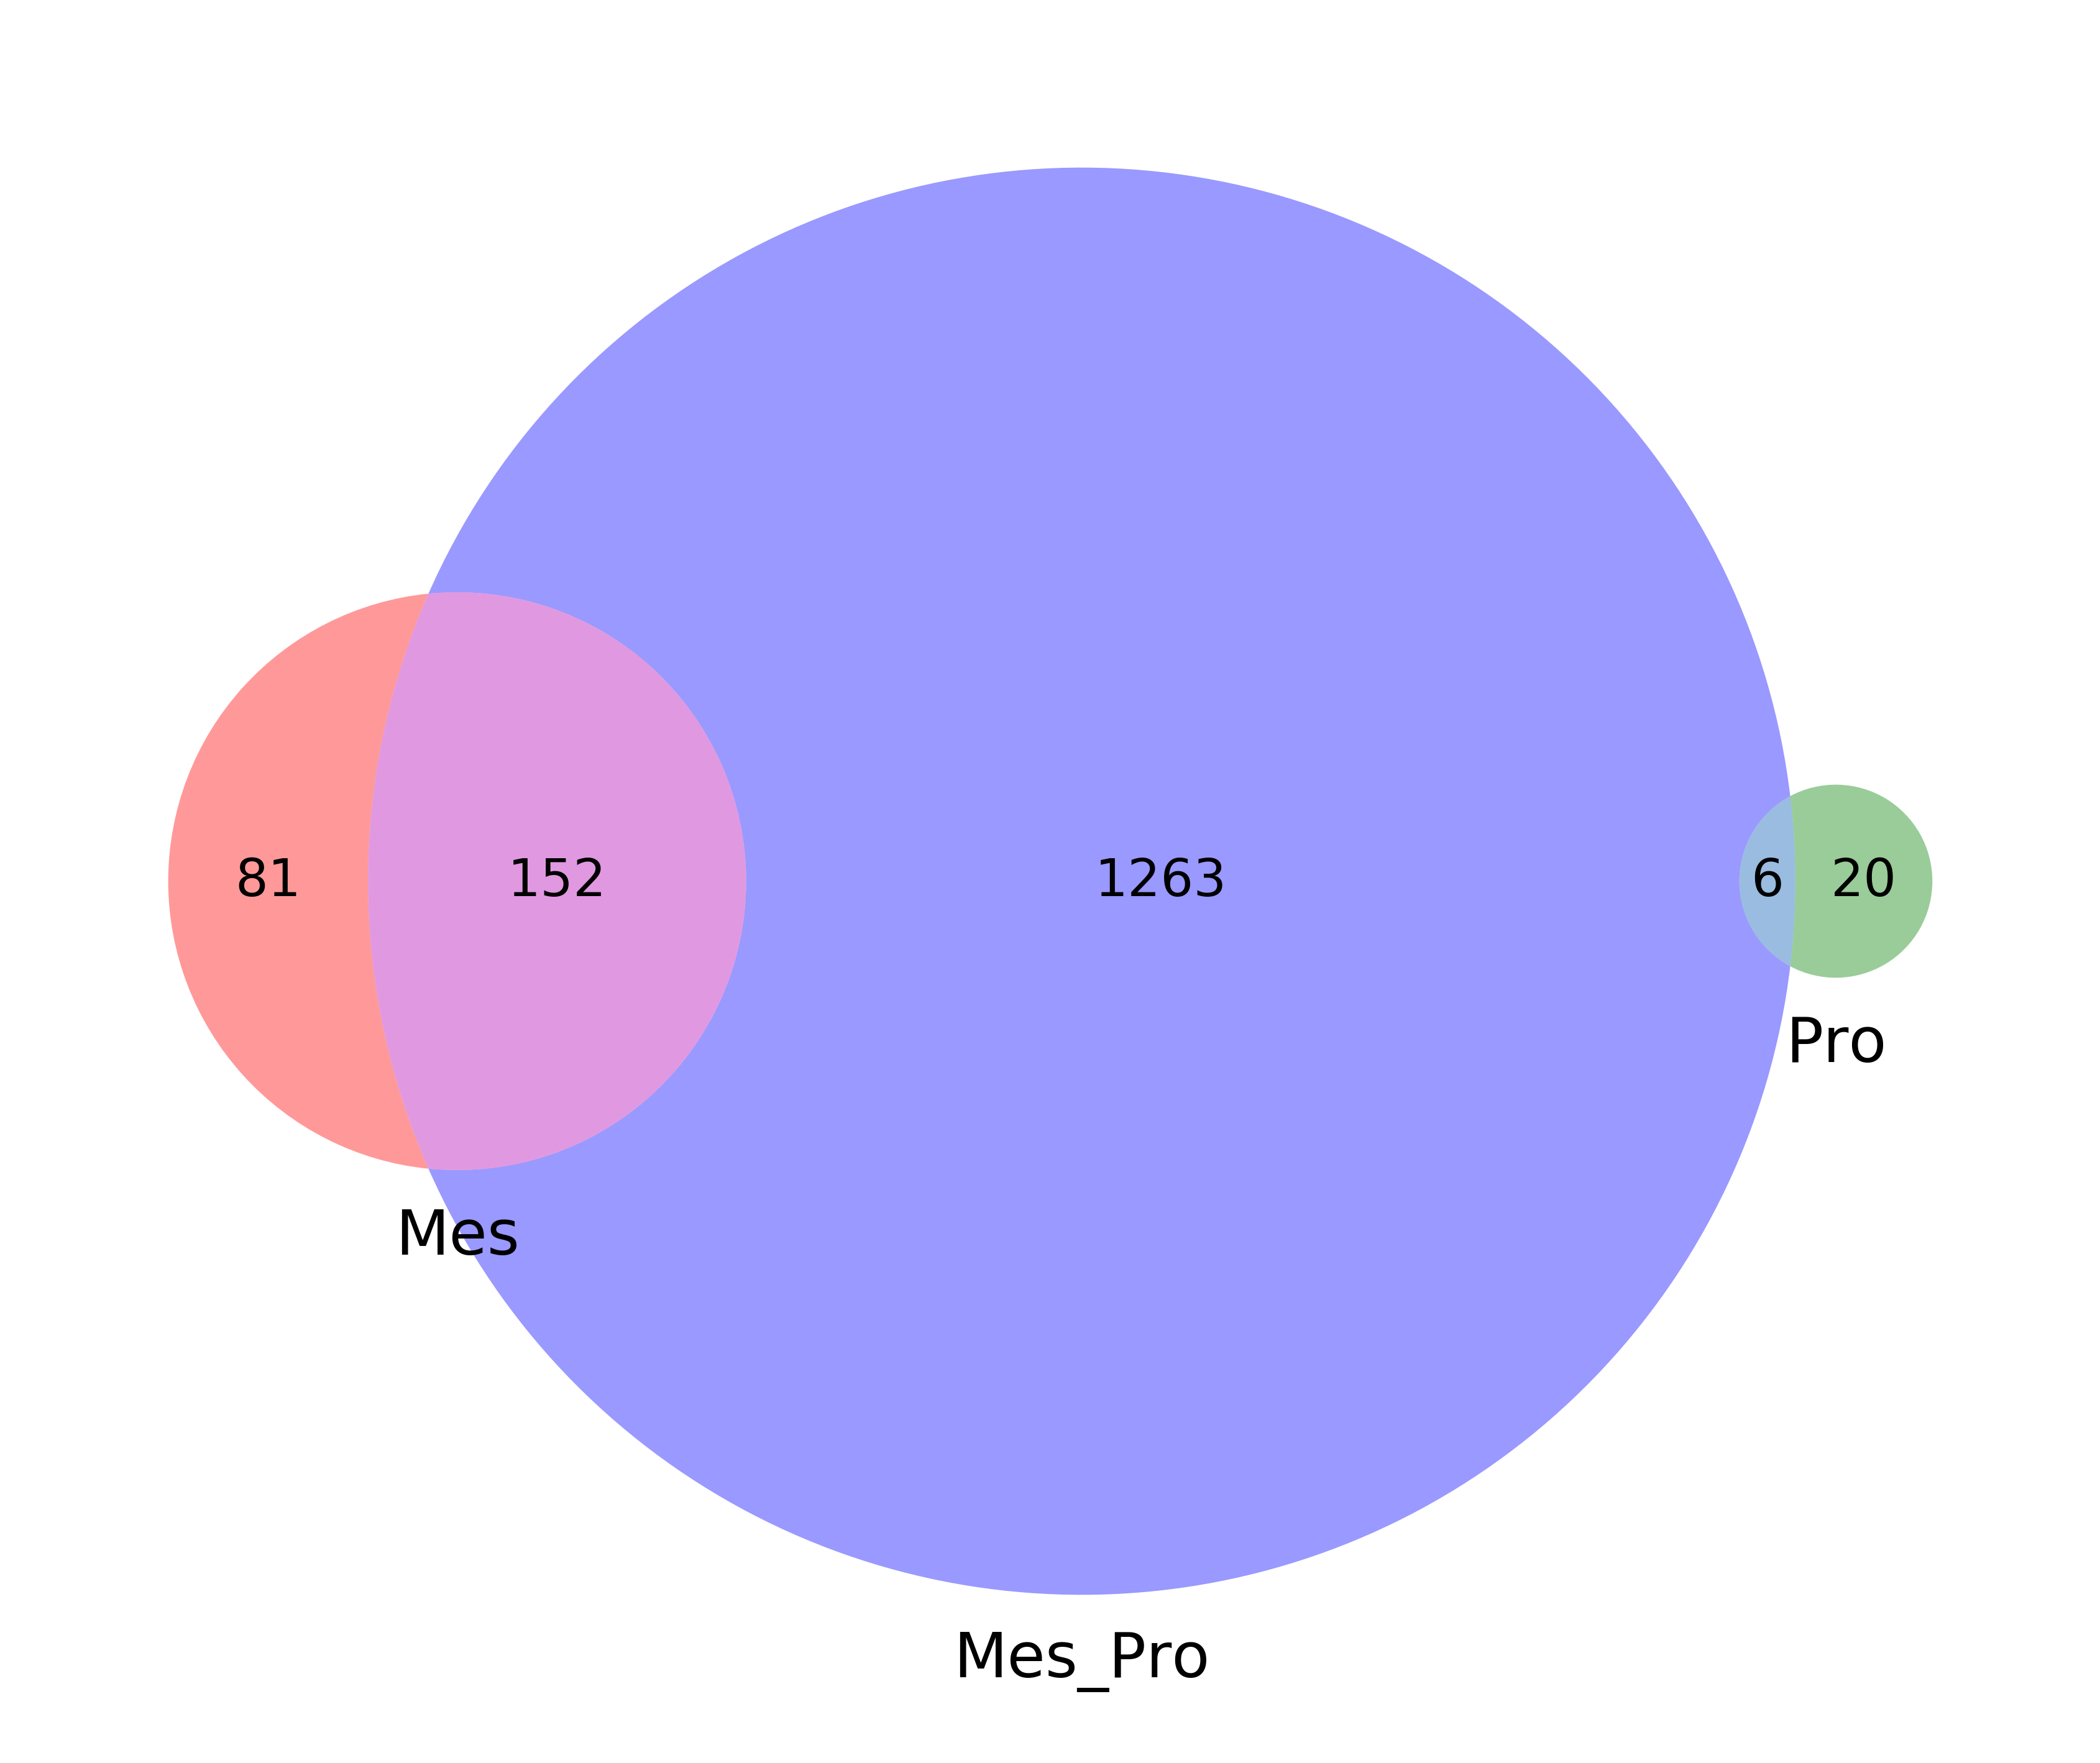

In [605]:
venn3(subsets = (len(only_Mes), len(only_Pro), len(two_Mes__Pro), 
                 len(only_Mes_Pro),len(two_Mes_Pro__Mes),
                 len(two_Mes_Pro__Pro),len(all_Mes_Pro)),
      set_labels = ('Mes', 'Pro', 'Mes_Pro'))

In [728]:
# filter furthur
pair_Mes_filtered = set()
for i in only_Mes:
    gene_id = i.split('____')[0]
    snv_id = i.split('____')[1]
    df_tmp = pd.DataFrame({'gene':gene_Mes.loc[gene_id,:],'snv':snv_Mes.loc[snv_id,:]})
    if((df_tmp[df_tmp.gene > 0].snv.value_counts() >10).sum() == 2):
        pair_Mes_filtered.add(i)

In [729]:
pair_Mes_filtered

{'ENSG00000101333.12____chr14__62213848',
 'ENSG00000101384.7____chr12__107090201',
 'ENSG00000102265.7____chr18__24435212',
 'ENSG00000102265.7____chr18__24435545',
 'ENSG00000102265.7____chr4__88412806',
 'ENSG00000105221.12____chr6__86387888',
 'ENSG00000119655.4____chr15__60653205',
 'ENSG00000119655.4____chr1__23884661',
 'ENSG00000119655.4____chr3__57557834',
 'ENSG00000125462.12____chr1__182356399',
 'ENSG00000128833.8____chr12__89743223',
 'ENSG00000128833.8____chr1__54317697',
 'ENSG00000130816.10____chr8__74236370',
 'ENSG00000135245.9____chr17__25628820',
 'ENSG00000135424.11____chr20__57478807',
 'ENSG00000135424.11____chr21__34166190',
 'ENSG00000135424.11____chr4__122617745',
 'ENSG00000135424.11____chr4__122618117',
 'ENSG00000146648.11____chr11__57381989',
 'ENSG00000146648.11____chr13__21720956',
 'ENSG00000146648.11____chr14__74759477',
 'ENSG00000146648.11____chr2__176046415',
 'ENSG00000146648.11____chr2__219139573',
 'ENSG00000146648.11____chr4__122617745',
 'ENSG0

In [730]:
# filter furthur
pair_Pro_filtered = set()
for i in only_Pro:
    gene_id = i.split('____')[0]
    snv_id = i.split('____')[1]
    df_tmp = pd.DataFrame({'gene':gene_Pro.loc[gene_id,:],'snv':snv_Pro.loc[snv_id,:]})
    if((df_tmp[df_tmp.gene > 0].snv.value_counts() >10).sum() == 2):
        pair_Pro_filtered.add(i)

In [731]:
pair_Pro_filtered

{'ENSG00000100504.12____chr10__135184126',
 'ENSG00000105221.12____chr1__205683280',
 'ENSG00000112144.11____chr11__16777342',
 'ENSG00000112144.11____chr15__72637795',
 'ENSG00000112144.11____chr19__18054643',
 'ENSG00000112144.11____chr20__2633936',
 'ENSG00000112144.11____chr4__41992677',
 'ENSG00000112144.11____chr4__42020142',
 'ENSG00000124766.4____chr11__62652779',
 'ENSG00000136451.4____chr7__127721507',
 'ENSG00000168036.12____chr6__29913042'}

In [732]:
# filter furthur
pair_Mes_Pro_filtered = set()
for i in only_Mes_Pro:
    gene_id = i.split('____')[0]
    snv_id = i.split('____')[1]
    df_tmp = pd.DataFrame({'gene':gene_Mes_Pro.loc[gene_id,:],'snv':snv_Mes_pro.loc[snv_id,:]})
    if((df_tmp[df_tmp.gene > 0].snv.value_counts() >30).sum() == 2):
        pair_Mes_Pro_filtered.add(i)

In [733]:
# only
only_Mes_Pro_filtered = pair_Mes_Pro_filtered - pair_Mes_filtered - pair_Pro_filtered 
only_Mes_filtered = pair_Mes_filtered -  pair_Pro_filtered - pair_Mes_Pro_filtered
only_Pro_filtered = pair_Pro_filtered -  pair_Mes_filtered - pair_Mes_Pro_filtered
# all
all_Mes_Pro_filtered = pair_Mes_Pro_filtered.intersection(pair_Mes_filtered).intersection(pair_Pro_filtered)
# two
two_Mes_Pro__Mes_filtered = pair_Mes_Pro_filtered.intersection(pair_Mes_filtered) - all_Mes_Pro_filtered
two_Mes_Pro__Pro_filtered = pair_Mes_Pro_filtered.intersection(pair_Pro_filtered) - all_Mes_Pro_filtered
two_Mes__Pro_filtered = pair_Mes_filtered.intersection(pair_Pro_filtered) - all_Mes_Pro_filtered

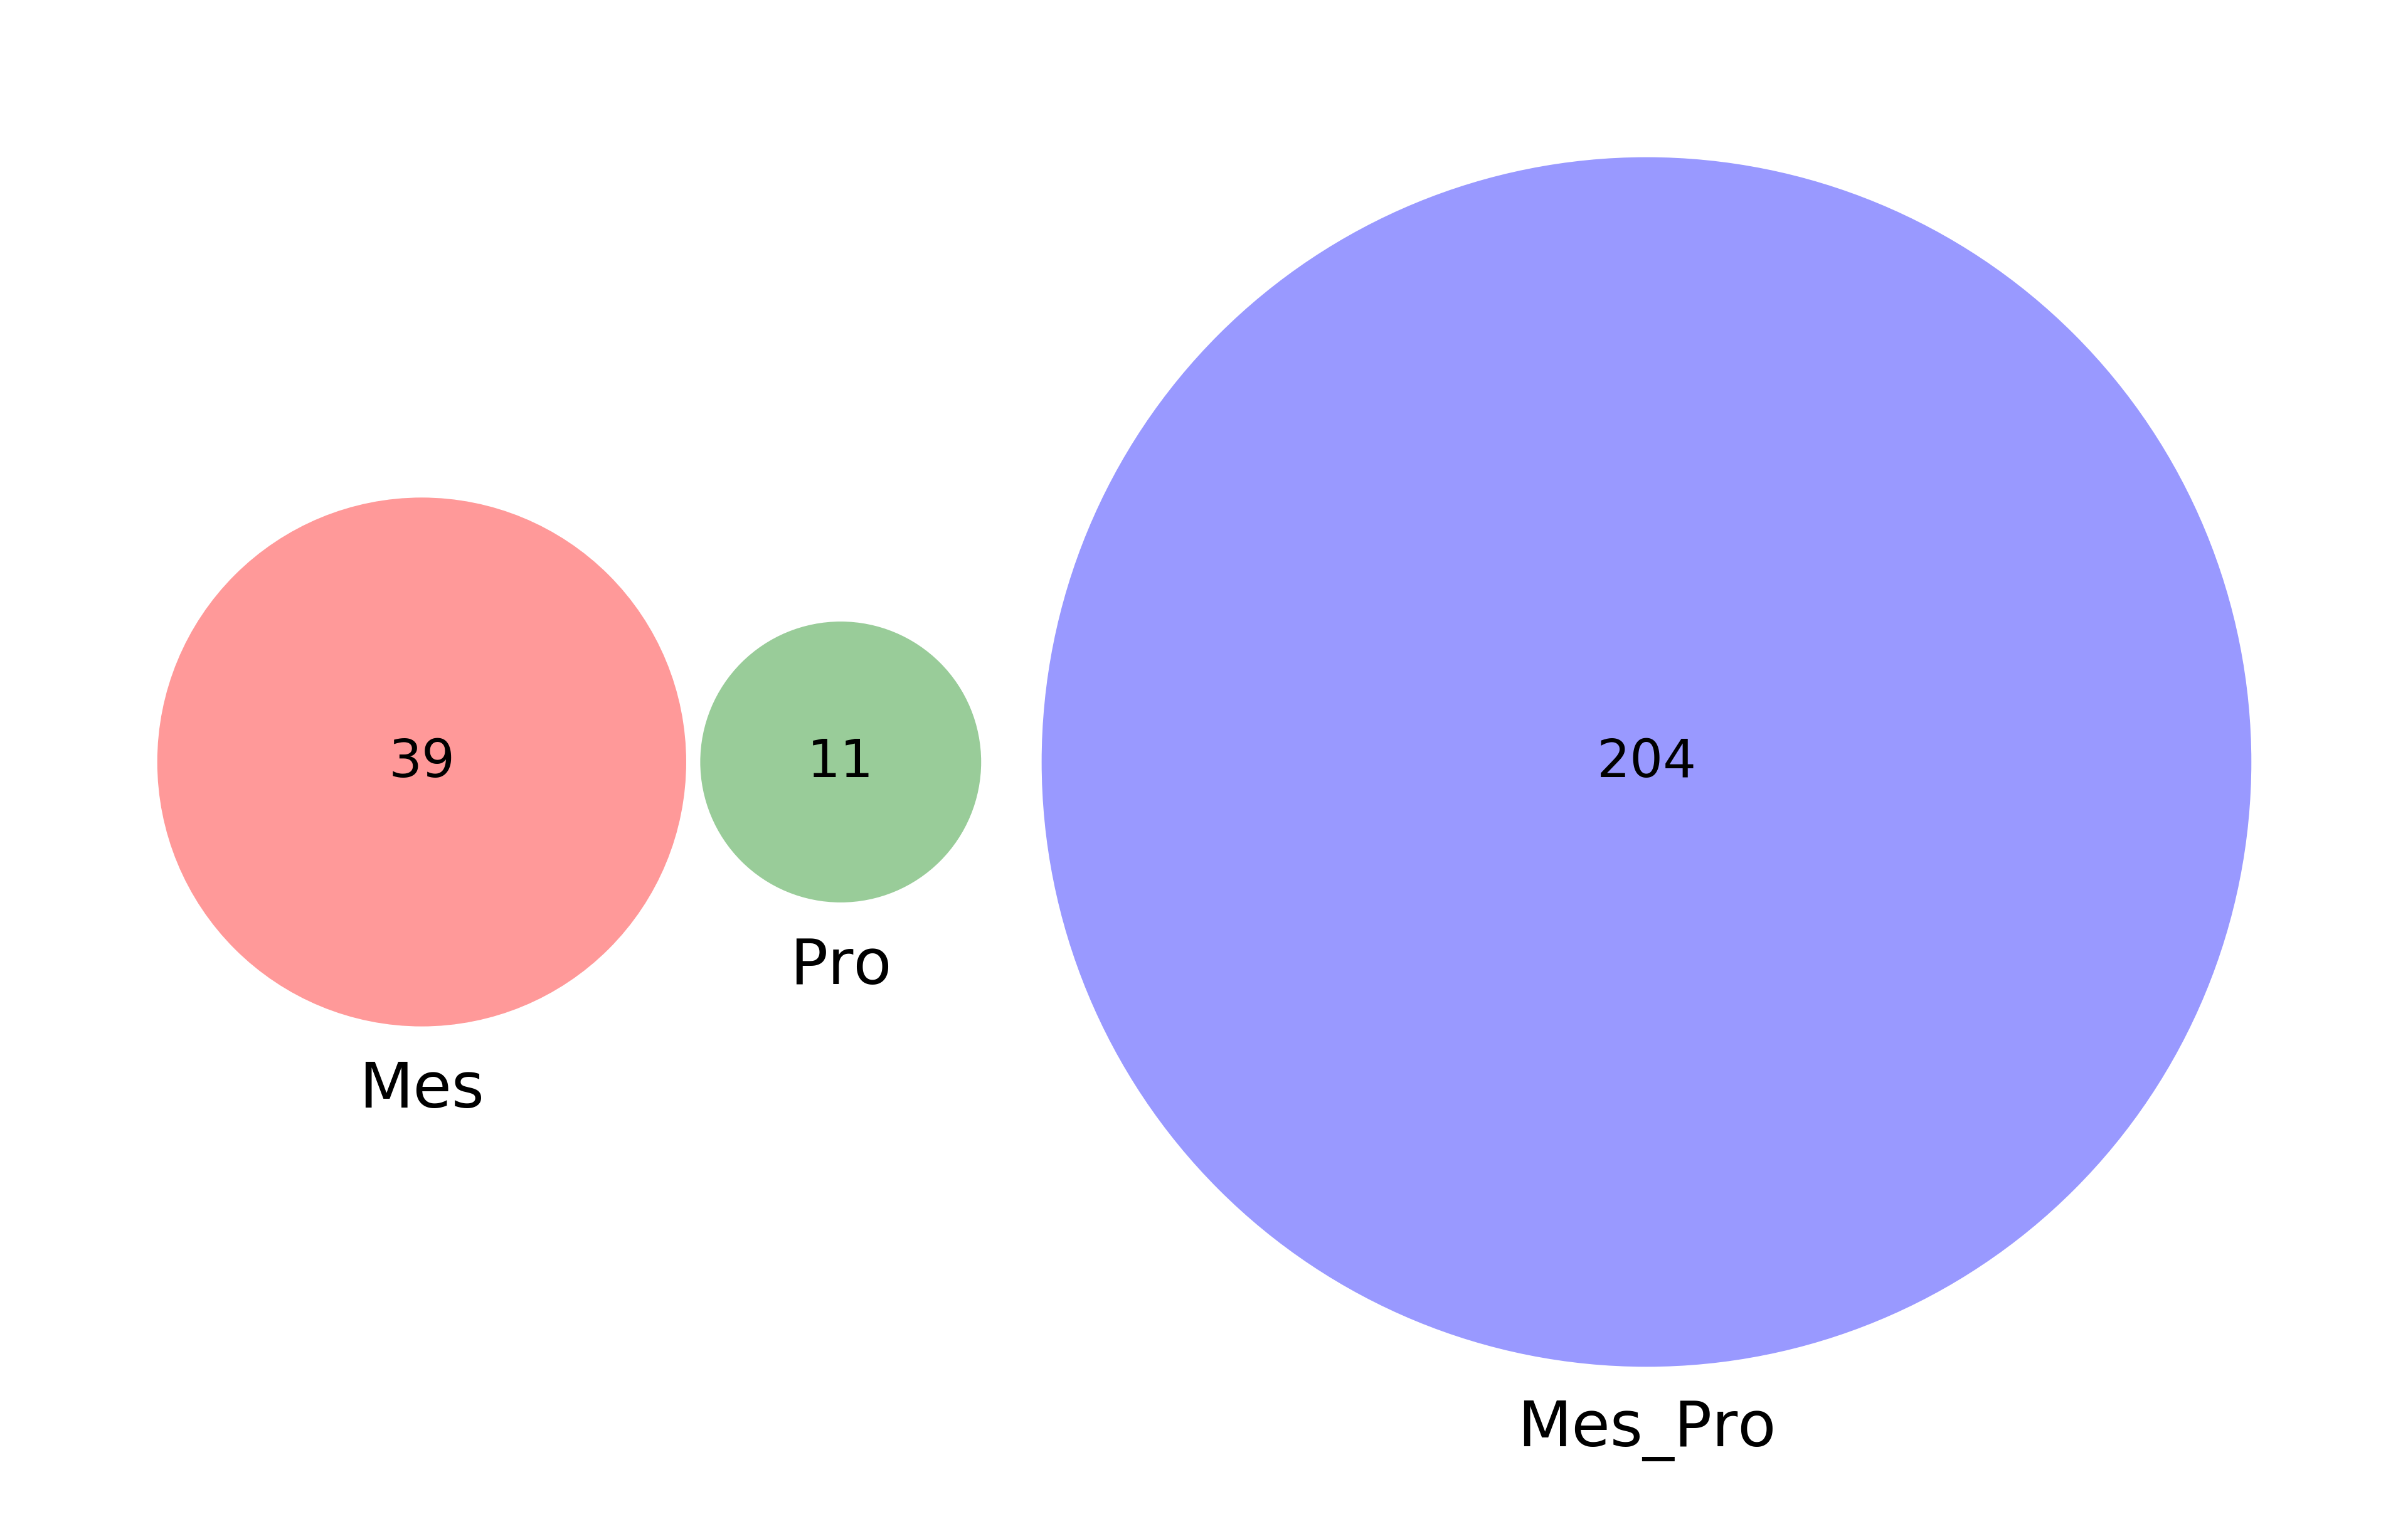

In [734]:
venn3(subsets = (len(only_Mes_filtered), len(only_Pro_filtered), len(two_Mes__Pro_filtered), 
                 len(only_Mes_Pro_filtered),len(two_Mes_Pro__Mes_filtered),
                 len(two_Mes_Pro__Pro_filtered),len(all_Mes_Pro_filtered)),
      set_labels = ('Mes', 'Pro', 'Mes_Pro'))

In [735]:
only_Mes_filtered

{'ENSG00000101333.12____chr14__62213848',
 'ENSG00000101384.7____chr12__107090201',
 'ENSG00000102265.7____chr18__24435212',
 'ENSG00000102265.7____chr18__24435545',
 'ENSG00000102265.7____chr4__88412806',
 'ENSG00000105221.12____chr6__86387888',
 'ENSG00000119655.4____chr15__60653205',
 'ENSG00000119655.4____chr1__23884661',
 'ENSG00000119655.4____chr3__57557834',
 'ENSG00000125462.12____chr1__182356399',
 'ENSG00000128833.8____chr12__89743223',
 'ENSG00000128833.8____chr1__54317697',
 'ENSG00000130816.10____chr8__74236370',
 'ENSG00000135245.9____chr17__25628820',
 'ENSG00000135424.11____chr20__57478807',
 'ENSG00000135424.11____chr21__34166190',
 'ENSG00000135424.11____chr4__122617745',
 'ENSG00000135424.11____chr4__122618117',
 'ENSG00000146648.11____chr11__57381989',
 'ENSG00000146648.11____chr13__21720956',
 'ENSG00000146648.11____chr14__74759477',
 'ENSG00000146648.11____chr2__176046415',
 'ENSG00000146648.11____chr2__219139573',
 'ENSG00000146648.11____chr4__122617745',
 'ENSG0

In [965]:
only_Mes_filtered_df = pd.DataFrame(only_Mes_filtered)
only_Mes_filtered_df = only_Mes_filtered_df.iloc[:,0].str.split('____', expand = True)
only_Mes_filtered_df.columns = ['gene','snv']
only_Mes_filtered_df['genename'] = only_Mes_filtered_df['gene']
only_Mes_filtered_df['snv_located_gene'] = only_Mes_filtered_df['snv']
only_Mes_filtered_df['snv_located_gene_name'] = only_Mes_filtered_df['snv']

for i in range(only_Mes_filtered_df.shape[0]):
    only_Mes_filtered_df['genename'].values[i] = gtf_index_df.loc[only_Mes_filtered_df['genename'].values[i],'gene_name']
    only_Mes_filtered_df['snv_located_gene'].values[i] = search_snv_from_gtfindex(only_Mes_filtered_df['snv_located_gene'].values[i],gtf_index_df)[only_Mes_filtered_df['snv_located_gene'].values[i]]
    tmp_gene_name = list()
    for gene_id in only_Mes_filtered_df['snv_located_gene'].values[i]:
        tmp_gene_name.append(gtf_index_df.loc[gene_id,'gene_name'])
    only_Mes_filtered_df['snv_located_gene_name'].values[i] = tmp_gene_name
only_Mes_filtered_df.to_csv('./positive_result_Mes.csv')

In [968]:
only_Mes_filtered_df

gene               snv genename  \
0   ENSG00000146648.11   chr7__107559911     EGFR   
1   ENSG00000146648.11    chr8__26515458     EGFR   
2    ENSG00000102265.7    chr4__88412806    TIMP1   
3    ENSG00000176887.5   chr21__48022230    SOX11   
4   ENSG00000146648.11    chr8__11702542     EGFR   
5    ENSG00000169122.7    chr7__75659815  FAM110B   
6    ENSG00000197977.3        chrM__4217   ELOVL2   
7   ENSG00000135424.11   chr21__34166190    ITGA7   
8   ENSG00000146648.11   chr13__21720956     EGFR   
9   ENSG00000146648.11   chr2__176046415     EGFR   
10   ENSG00000101384.7  chr12__107090201     JAG1   
11   ENSG00000119655.4   chr15__60653205     NPC2   
12  ENSG00000135424.11   chr4__122617745    ITGA7   
13  ENSG00000163808.12    chr3__33055721    KIF15   
14   ENSG00000213614.5     chr19__579627     HEXA   
15   ENSG00000102265.7   chr18__24435212    TIMP1   
16  ENSG00000130816.10    chr8__74236370    DNMT1   
17  ENSG00000146648.11    chr5__52979097     EGFR   
18   ENSG00000128833.8    chr1__54317697    MYO5C   
19   ENSG00000128833.8   chr12__89743223    MYO5C   
20   ENSG00000176533.8   chr6__109689907     GNG7   
21   ENSG00000102265.7   chr18__24435545    TIMP1   
22   ENSG00000119655.4    chr3__57557834     NPC2   
23   ENSG00000185950.7   chr19__17513981     IRS2   
24   ENSG00000119655.4    chr1__23884661     NPC2   
25  ENSG00000146648.11   chr11__57381989     EGFR   
26  ENSG00000146648.11   chr7__133345207     EGFR   
27  ENSG00000135424.11   chr4__122618117    ITGA7   
28  ENSG00000146648.11   chr4__122617745     EGFR   
29  ENSG00000146648.11   chr2__219139573     EGFR   
30  ENSG00000101333.12   chr14__62213848    PLCB4   
31  ENSG00000146648.11   chr14__74759477     EGFR   
32  ENSG00000135424.11   chr20__57478807    ITGA7   
33  ENSG00000146648.11    chr8__27462481     EGFR   
34  ENSG00000105221.12    chr6__86387888     AKT2   
35   ENSG00000135245.9   chr17__25628820   HILPDA   
36   ENSG00000213614.5     chr19__580388     HEXA   
37  ENSG00000125462.12   chr1__182356399  C1orf61   
38  ENSG00000146648.11   chr7__150916228     EGFR   

                                     snv_located_gene  \
0                                 [ENSG00000091140.8]   
1                                [ENSG00000092964.12]   
2                                 [ENSG00000152583.8]   
3                                 [ENSG00000160307.5]   
4                                [ENSG00000164733.16]   
5                                [ENSG00000127952.12]   
6                                 [ENSG00000198888.2]   
7              [ENSG00000205930.4, ENSG00000205929.5]   
8                                 [ENSG00000150459.8]   
9                                 [ENSG00000154518.5]   
10             [ENSG00000257545.1, ENSG00000111783.8]   
11                               [ENSG00000182718.12]   
12                               [ENSG00000164111.10]   
13                               [ENSG00000170266.11]   
14                               [ENSG00000172270.14]   
15             [ENSG00000260372.2, ENSG00000171885.9]   
16             [ENSG00000121039.5, ENSG00000250295.2]   
17                                [ENSG00000164258.7]   
18                                [ENSG00000058799.9]   
19                                [ENSG00000139318.7]   
20                               [ENSG00000135535.10]   
21             [ENSG00000260372.2, ENSG00000171885.9]   
22                                [ENSG00000168374.6]   
23                                [ENSG00000130303.8]   
24                                [ENSG00000117318.8]   
25                               [ENSG00000149131.11]   
26                               [ENSG00000131558.10]   
27                               [ENSG00000164111.10]   
28                               [ENSG00000164111.10]   
29             [ENSG00000127838.9, ENSG00000135926.8]   
30  [ENSG00000100644.12, ENSG00000258667.1, ENSG00...   
31            [ENSG00000119688.16, ENSG00000258559.2]   
32              

In [970]:
only_Mes_filtered_df[only_Mes_filtered_df.genename == 'NPC2']

gene              snv genename      snv_located_gene  \
11  ENSG00000119655.4  chr15__60653205     NPC2  [ENSG00000182718.12]   
22  ENSG00000119655.4   chr3__57557834     NPC2   [ENSG00000168374.6]   
24  ENSG00000119655.4   chr1__23884661     NPC2   [ENSG00000117318.8]   

   snv_located_gene_name  
11               [ANXA2]  
22                [ARF4]  
24                 [ID3]

In [799]:
only_Pro_filtered_df = pd.DataFrame(only_Pro_filtered)
only_Pro_filtered_df = only_Pro_filtered_df.iloc[:,0].str.split('____', expand = True)
only_Pro_filtered_df.columns = ['gene','snv']
only_Pro_filtered_df['genename'] = only_Pro_filtered_df['gene']
only_Pro_filtered_df['snv_located_gene'] = only_Pro_filtered_df['snv']
only_Pro_filtered_df['snv_located_gene_name'] = only_Pro_filtered_df['snv']

for i in range(only_Pro_filtered_df.shape[0]):
    only_Pro_filtered_df['genename'].values[i] = gtf_index_df.loc[only_Pro_filtered_df['genename'].values[i],'gene_name']
    only_Pro_filtered_df['snv_located_gene'].values[i] = search_snv_from_gtfindex(only_Pro_filtered_df['snv_located_gene'].values[i],gtf_index_df)[only_Pro_filtered_df['snv_located_gene'].values[i]]
    tmp_gene_name = list()
    for gene_id in only_Pro_filtered_df['snv_located_gene'].values[i]:
        tmp_gene_name.append(gtf_index_df.loc[gene_id,'gene_name'])
    only_Pro_filtered_df['snv_located_gene_name'].values[i] = tmp_gene_name
only_Pro_filtered_df.to_csv('./positive_result_Pro.csv')

In [967]:
only_Pro_filtered_df

gene               snv genename  \
0   ENSG00000112144.11   chr11__16777342      ICK   
1   ENSG00000105221.12   chr1__205683280     AKT2   
2   ENSG00000112144.11    chr4__42020142      ICK   
3    ENSG00000124766.4   chr11__62652779     SOX4   
4   ENSG00000112144.11   chr15__72637795      ICK   
5   ENSG00000100504.12  chr10__135184126     PYGL   
6   ENSG00000112144.11   chr19__18054643      ICK   
7    ENSG00000136451.4   chr7__127721507    VEZF1   
8   ENSG00000112144.11    chr4__41992677      ICK   
9   ENSG00000168036.12    chr6__29913042   CTNNB1   
10  ENSG00000112144.11    chr20__2633936      ICK   

                                     snv_located_gene  \
0                                 [ENSG00000110696.5]   
1             [ENSG00000069275.12, ENSG00000268313.1]   
2                                 [ENSG00000014824.9]   
3                                [ENSG00000168003.12]   
4   [ENSG00000261460.1, ENSG00000260729.1, ENSG000...   
5                                 [ENSG00000127884.4]   
6                                 [ENSG00000007080.6]   
7                                 [ENSG00000197157.6]   
8                                 [ENSG00000014824.9]   
9                                 [ENSG00000206503.7]   
10                               [ENSG00000101361.10]   

                 snv_located_gene_name  
0                           [C11orf58]  
1                 [NUCKS1, AC119673.1]  
2                            [SLC30A9]  
3                             [SLC3A2]  
4   [RP11-106M3.3, RP11-106M3.2, HEXA]  
5                              [ECHS1]  
6                            [CCDC124]  
7                               [SND1]  
8                            [SLC30A9]  
9                              [HLA-A]  
10                             [NOP56]

In [795]:
search_snv_from_gtfindex('chr21__34166190',gtf_index_df)['chr21__34166190']

['ENSG00000205930.4', 'ENSG00000205929.5']

In [755]:
gtf_index_df

chr  start    end   gene_name
Geneid                                           
ENSG00000223972.4  chr1  11869  14412     DDX11L1
ENSG00000227232.4  chr1  14363  29806      WASH7P
ENSG00000243485.2  chr1  29554  31109  MIR1302-11
ENSG00000237613.2  chr1  34554  36081     FAM138A
ENSG00000268020.2  chr1  52473  54936      OR4G4P
...                 ...    ...    ...         ...
ENSG00000198695.2  chrM  14149  14673      MT-ND6
ENSG00000210194.1  chrM  14674  14742       MT-TE
ENSG00000198727.2  chrM  14747  15887      MT-CYB
ENSG00000210195.2  chrM  15888  15953       MT-TT
ENSG00000210196.2  chrM  15956  16023       MT-TP

[57820 rows x 4 columns]

In [748]:
only_Mes_filtered_df

gene               snv
0   ENSG00000146648.11   chr7__107559911
1   ENSG00000146648.11    chr8__26515458
2    ENSG00000102265.7    chr4__88412806
3    ENSG00000176887.5   chr21__48022230
4   ENSG00000146648.11    chr8__11702542
5    ENSG00000169122.7    chr7__75659815
6    ENSG00000197977.3        chrM__4217
7   ENSG00000135424.11   chr21__34166190
8   ENSG00000146648.11   chr13__21720956
9   ENSG00000146648.11   chr2__176046415
10   ENSG00000101384.7  chr12__107090201
11   ENSG00000119655.4   chr15__60653205
12  ENSG00000135424.11   chr4__122617745
13  ENSG00000163808.12    chr3__33055721
14   ENSG00000213614.5     chr19__579627
15   ENSG00000102265.7   chr18__24435212
16  ENSG00000130816.10    chr8__74236370
17  ENSG00000146648.11    chr5__52979097
18   ENSG00000128833.8    chr1__54317697
19   ENSG00000128833.8   chr12__89743223
20   ENSG00000176533.8   chr6__109689907
21   ENSG00000102265.7   chr18__24435545
22   ENSG00000119655.4    chr3__57557834
23   ENSG00000185950.7   chr19__17513981
24   ENSG00000119655.4    chr1__23884661
25  ENSG00000146648.11   chr11__57381989
26  ENSG00000146648.11   chr7__133345207
27  ENSG00000135424.11   chr4__122618117
28  ENSG00000146648.11   chr4__122617745
29  ENSG00000146648.11   chr2__219139573
30  ENSG00000101333.12   chr14__62213848
31  ENSG00000146648.11   chr14__74759477
32  ENSG00000135424.11   chr20__57478807
33  ENSG00000146648.11    chr8__27462481
34  ENSG00000105221.12    chr6__86387888
35   ENSG00000135245.9   chr17__25628820
36   ENSG00000213614.5     chr19__580388
37  ENSG00000125462.12   chr1__182356399
38  ENSG00000146648.11   chr7__150916228

In [739]:
only_Pro_filtered

{'ENSG00000100504.12____chr10__135184126',
 'ENSG00000105221.12____chr1__205683280',
 'ENSG00000112144.11____chr11__16777342',
 'ENSG00000112144.11____chr15__72637795',
 'ENSG00000112144.11____chr19__18054643',
 'ENSG00000112144.11____chr20__2633936',
 'ENSG00000112144.11____chr4__41992677',
 'ENSG00000112144.11____chr4__42020142',
 'ENSG00000124766.4____chr11__62652779',
 'ENSG00000136451.4____chr7__127721507',
 'ENSG00000168036.12____chr6__29913042'}

In [971]:
df3 = pd.DataFrame({'gene':gene_Mes.loc['ENSG00000119655.4',:],'snv':snv_Mes.loc['chr15__60653205',:]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'NPC2(gene) and rs17845226(SNV)')

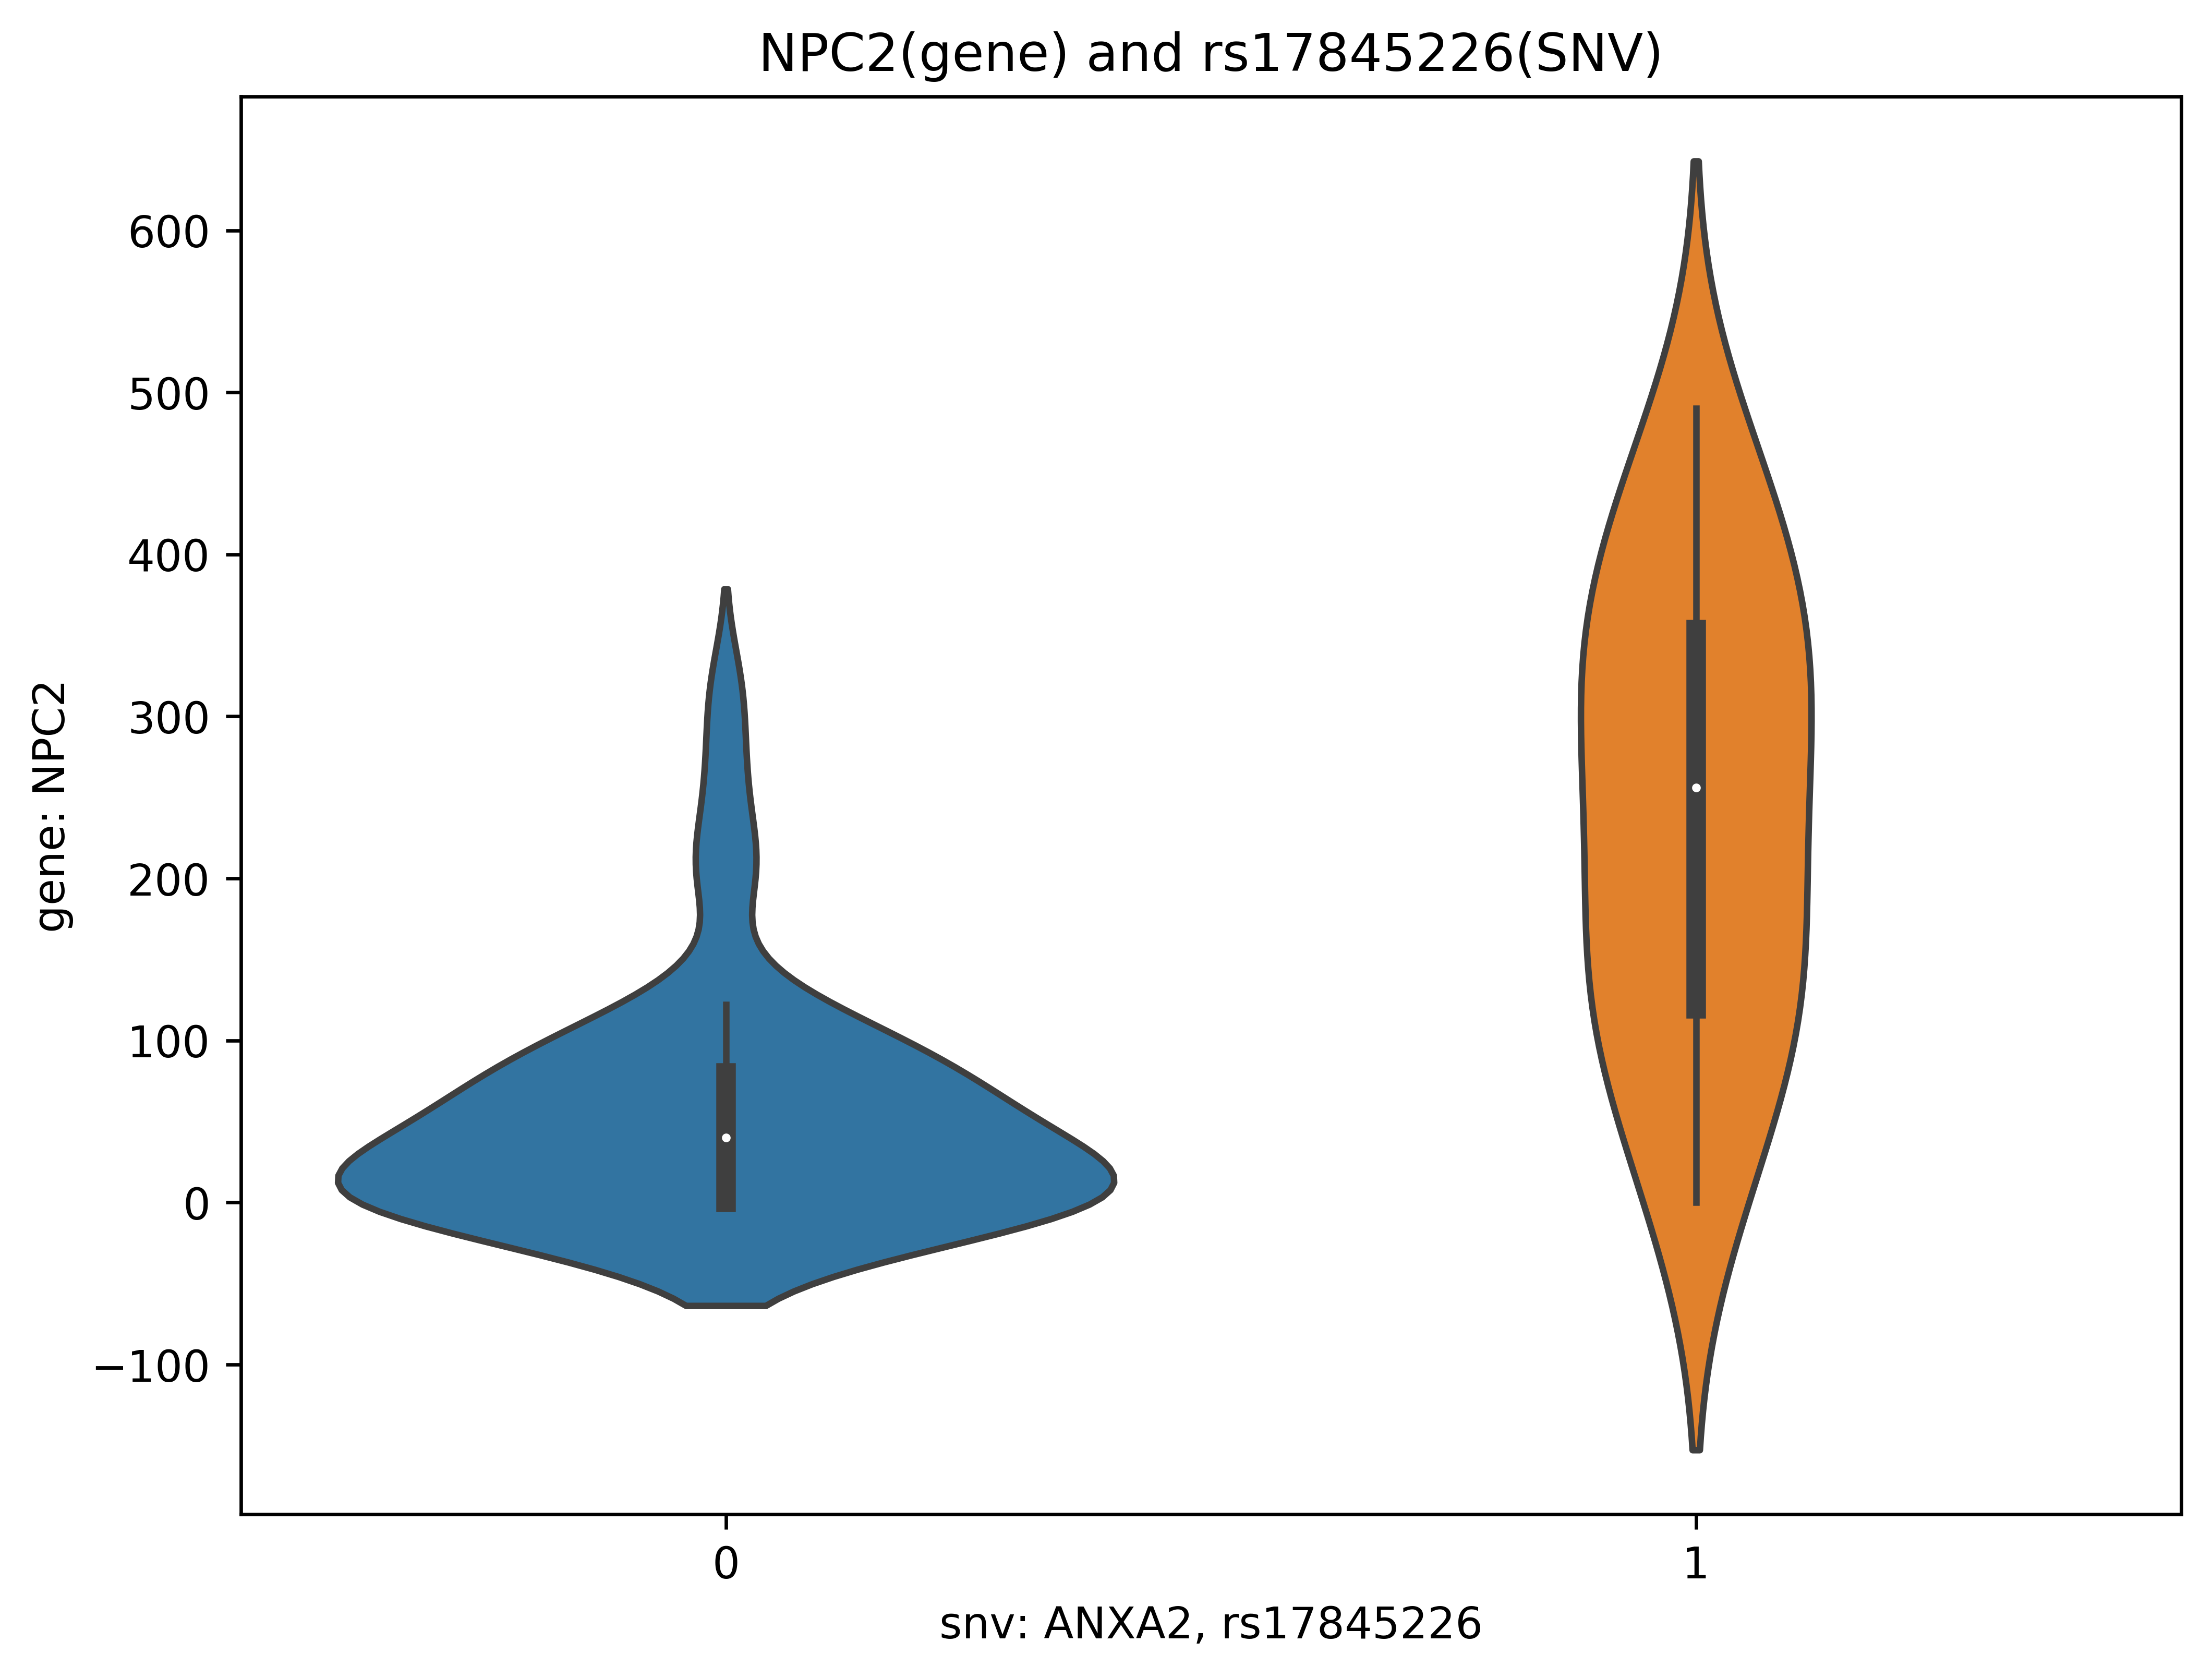

In [981]:
ax = sns.violinplot(x="snv", y="gene", data=df3)
ax.set(xlabel='snv: ANXA2, rs17845226', ylabel='gene: NPC2')
ax.set_title('NPC2(gene) and rs17845226(SNV)')

In [978]:
df4 = pd.DataFrame({'gene':gene_Mes.loc['ENSG00000119655.4',:],
                   'snv':snv_Mes.loc['chr15__60653205',:],
                   'gene_snv':exp_profile.loc['ENSG00000182718.12',gene_Mes.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000182718.12',gene_Mes.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'rs17845226(SNV) located gene')

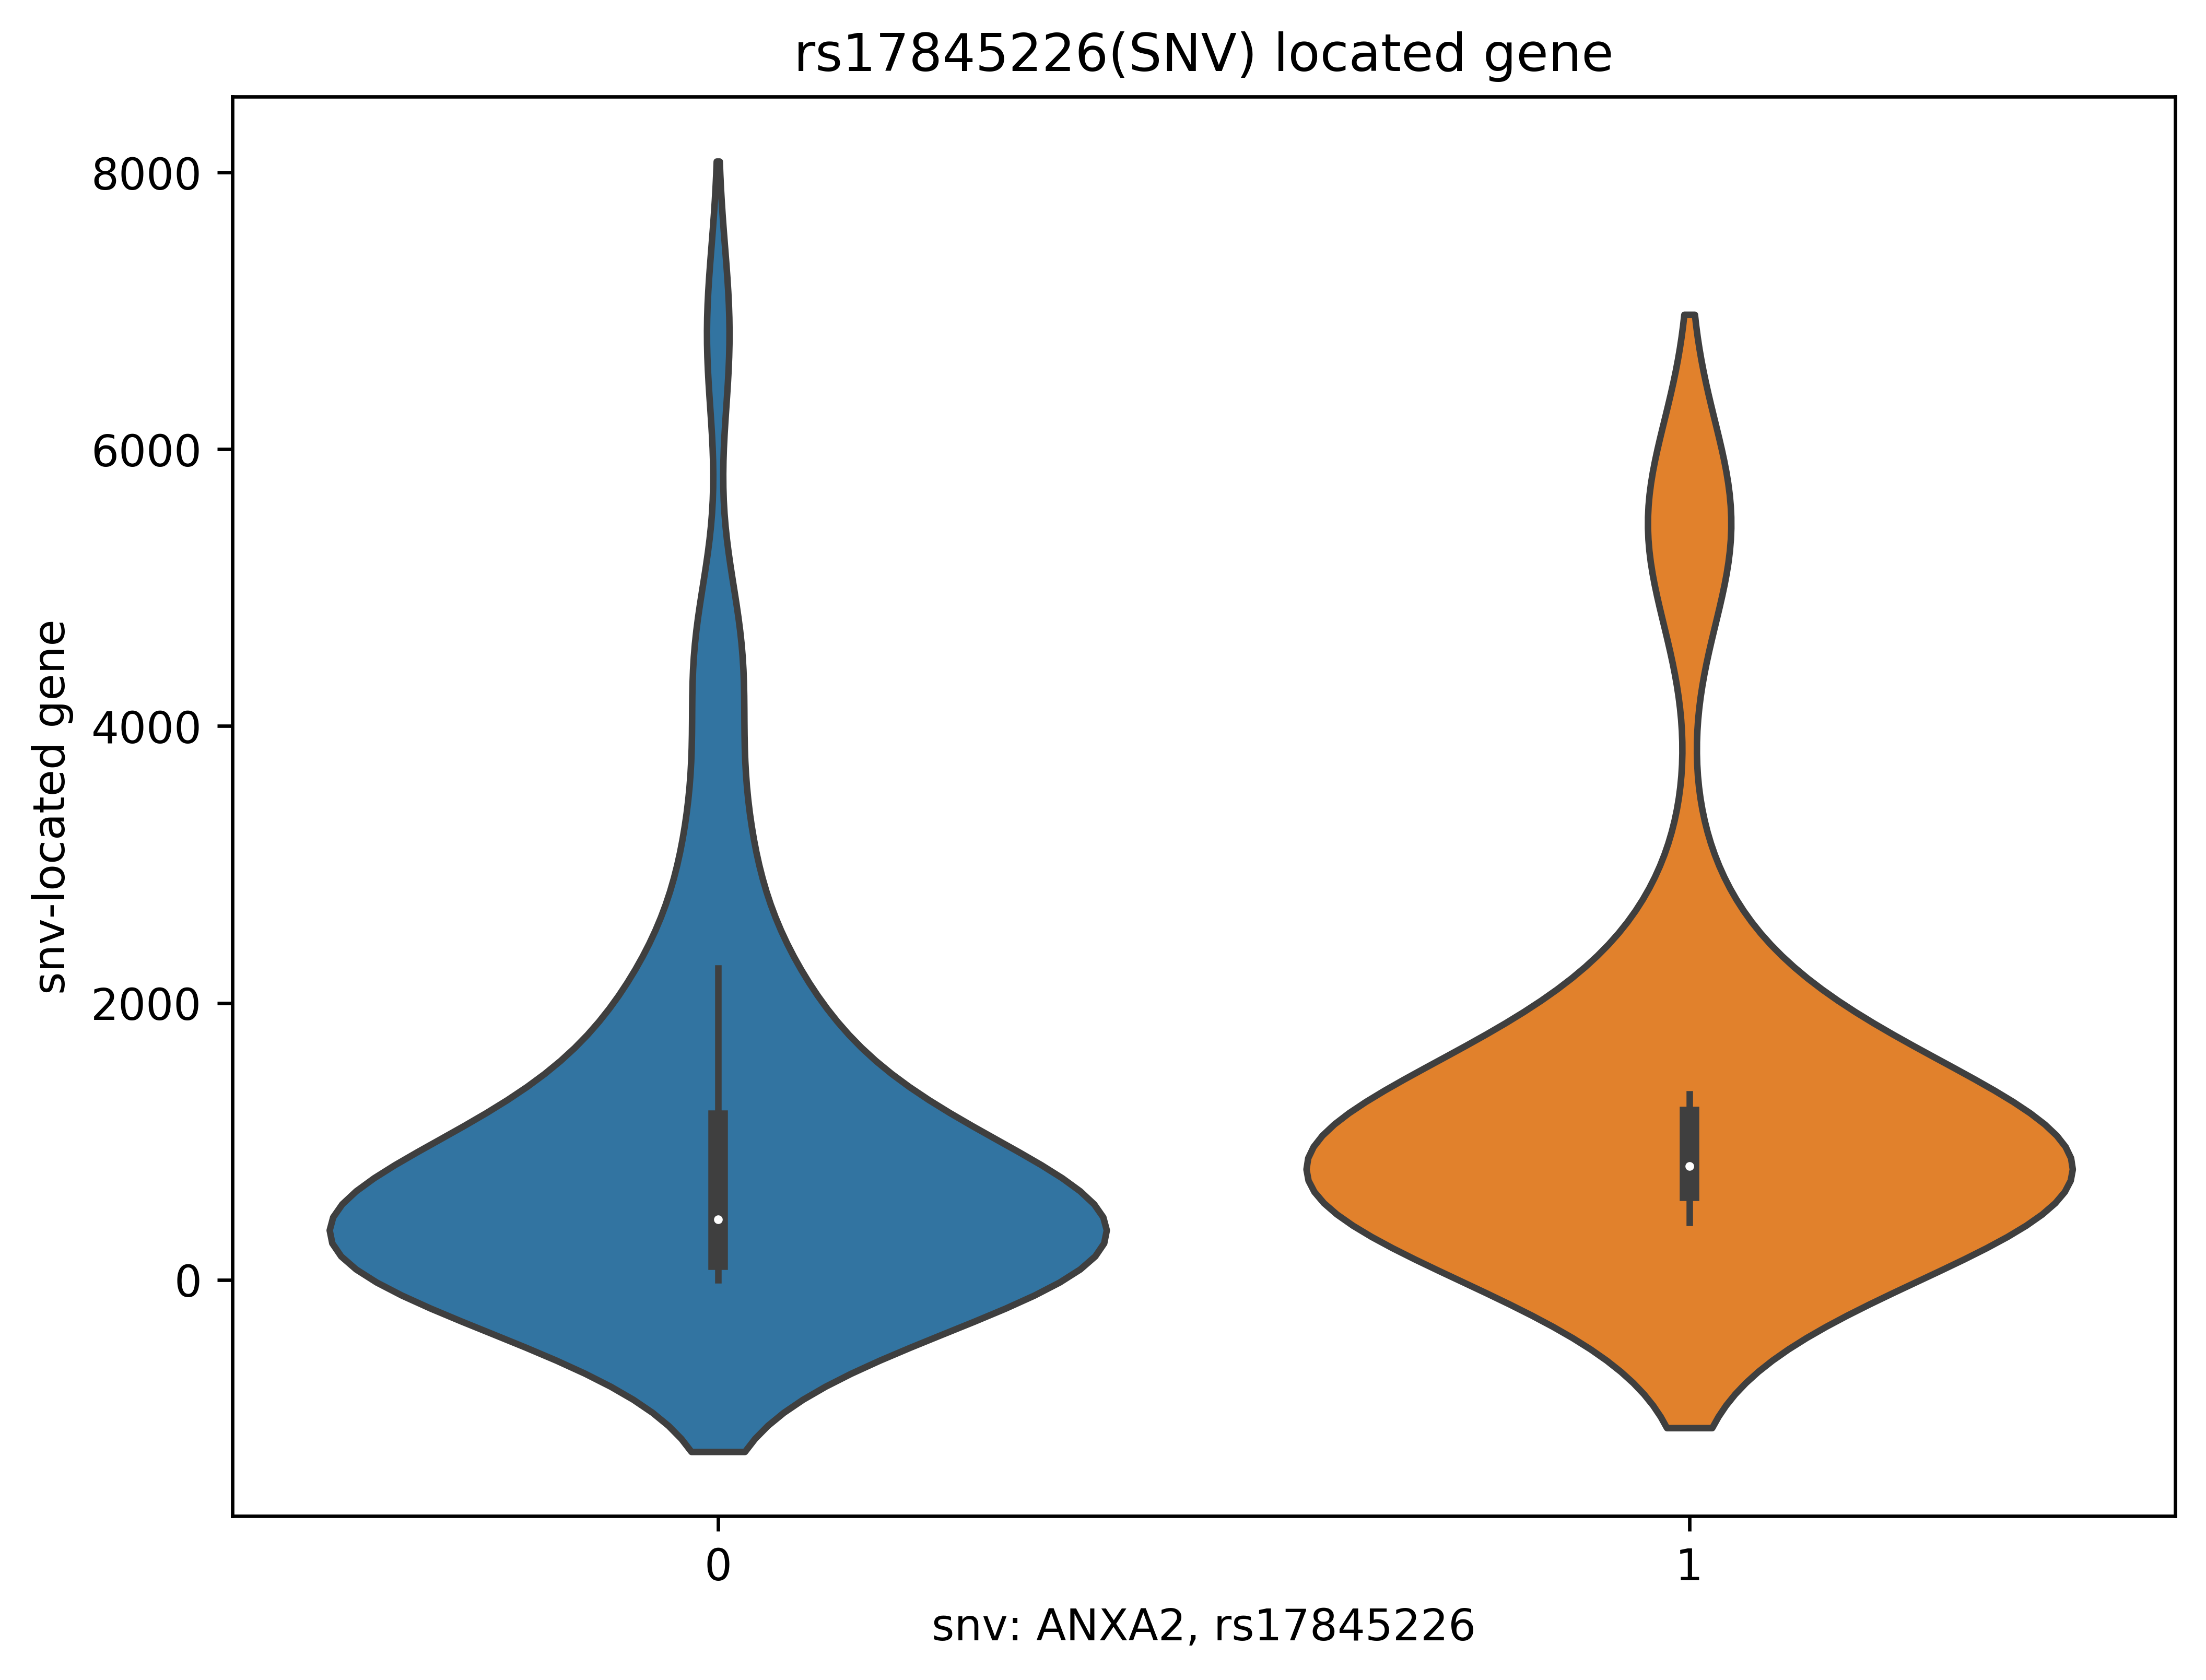

In [982]:
ax = sns.violinplot(x="snv", y="gene_snv_reads", data=df4)
ax.set(xlabel='snv: ANXA2, rs17845226', ylabel='snv-located gene')
ax.set_title('rs17845226(SNV) located gene')

In [717]:
df = pd.DataFrame({'gene':gene_Pro.loc['ENSG00000168036.12',:],'snv':snv_Pro.loc['chr6__29913042',:]})
df2 = pd.DataFrame({'gene':gene_Mes.loc['ENSG00000168036.12',:],'snv':snv_Mes.loc['chr6__29913042',:]})

In [718]:
df2.loc[df2.gene>0,].snv.value_counts()

1    45
0    29
Name: snv, dtype: int64

In [682]:
df[df.gene>0]

gene  snv
SRR1294498    17    0
SRR1294499   472    0
SRR1294500   551    0
SRR1294503     3    1
SRR1294505    15    0
...          ...  ...
SRR1294930   164    1
SRR1294941    94    1
SRR1294944    37    1
SRR1294948    10    1
SRR1295066    14    1

[64 rows x 2 columns]

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


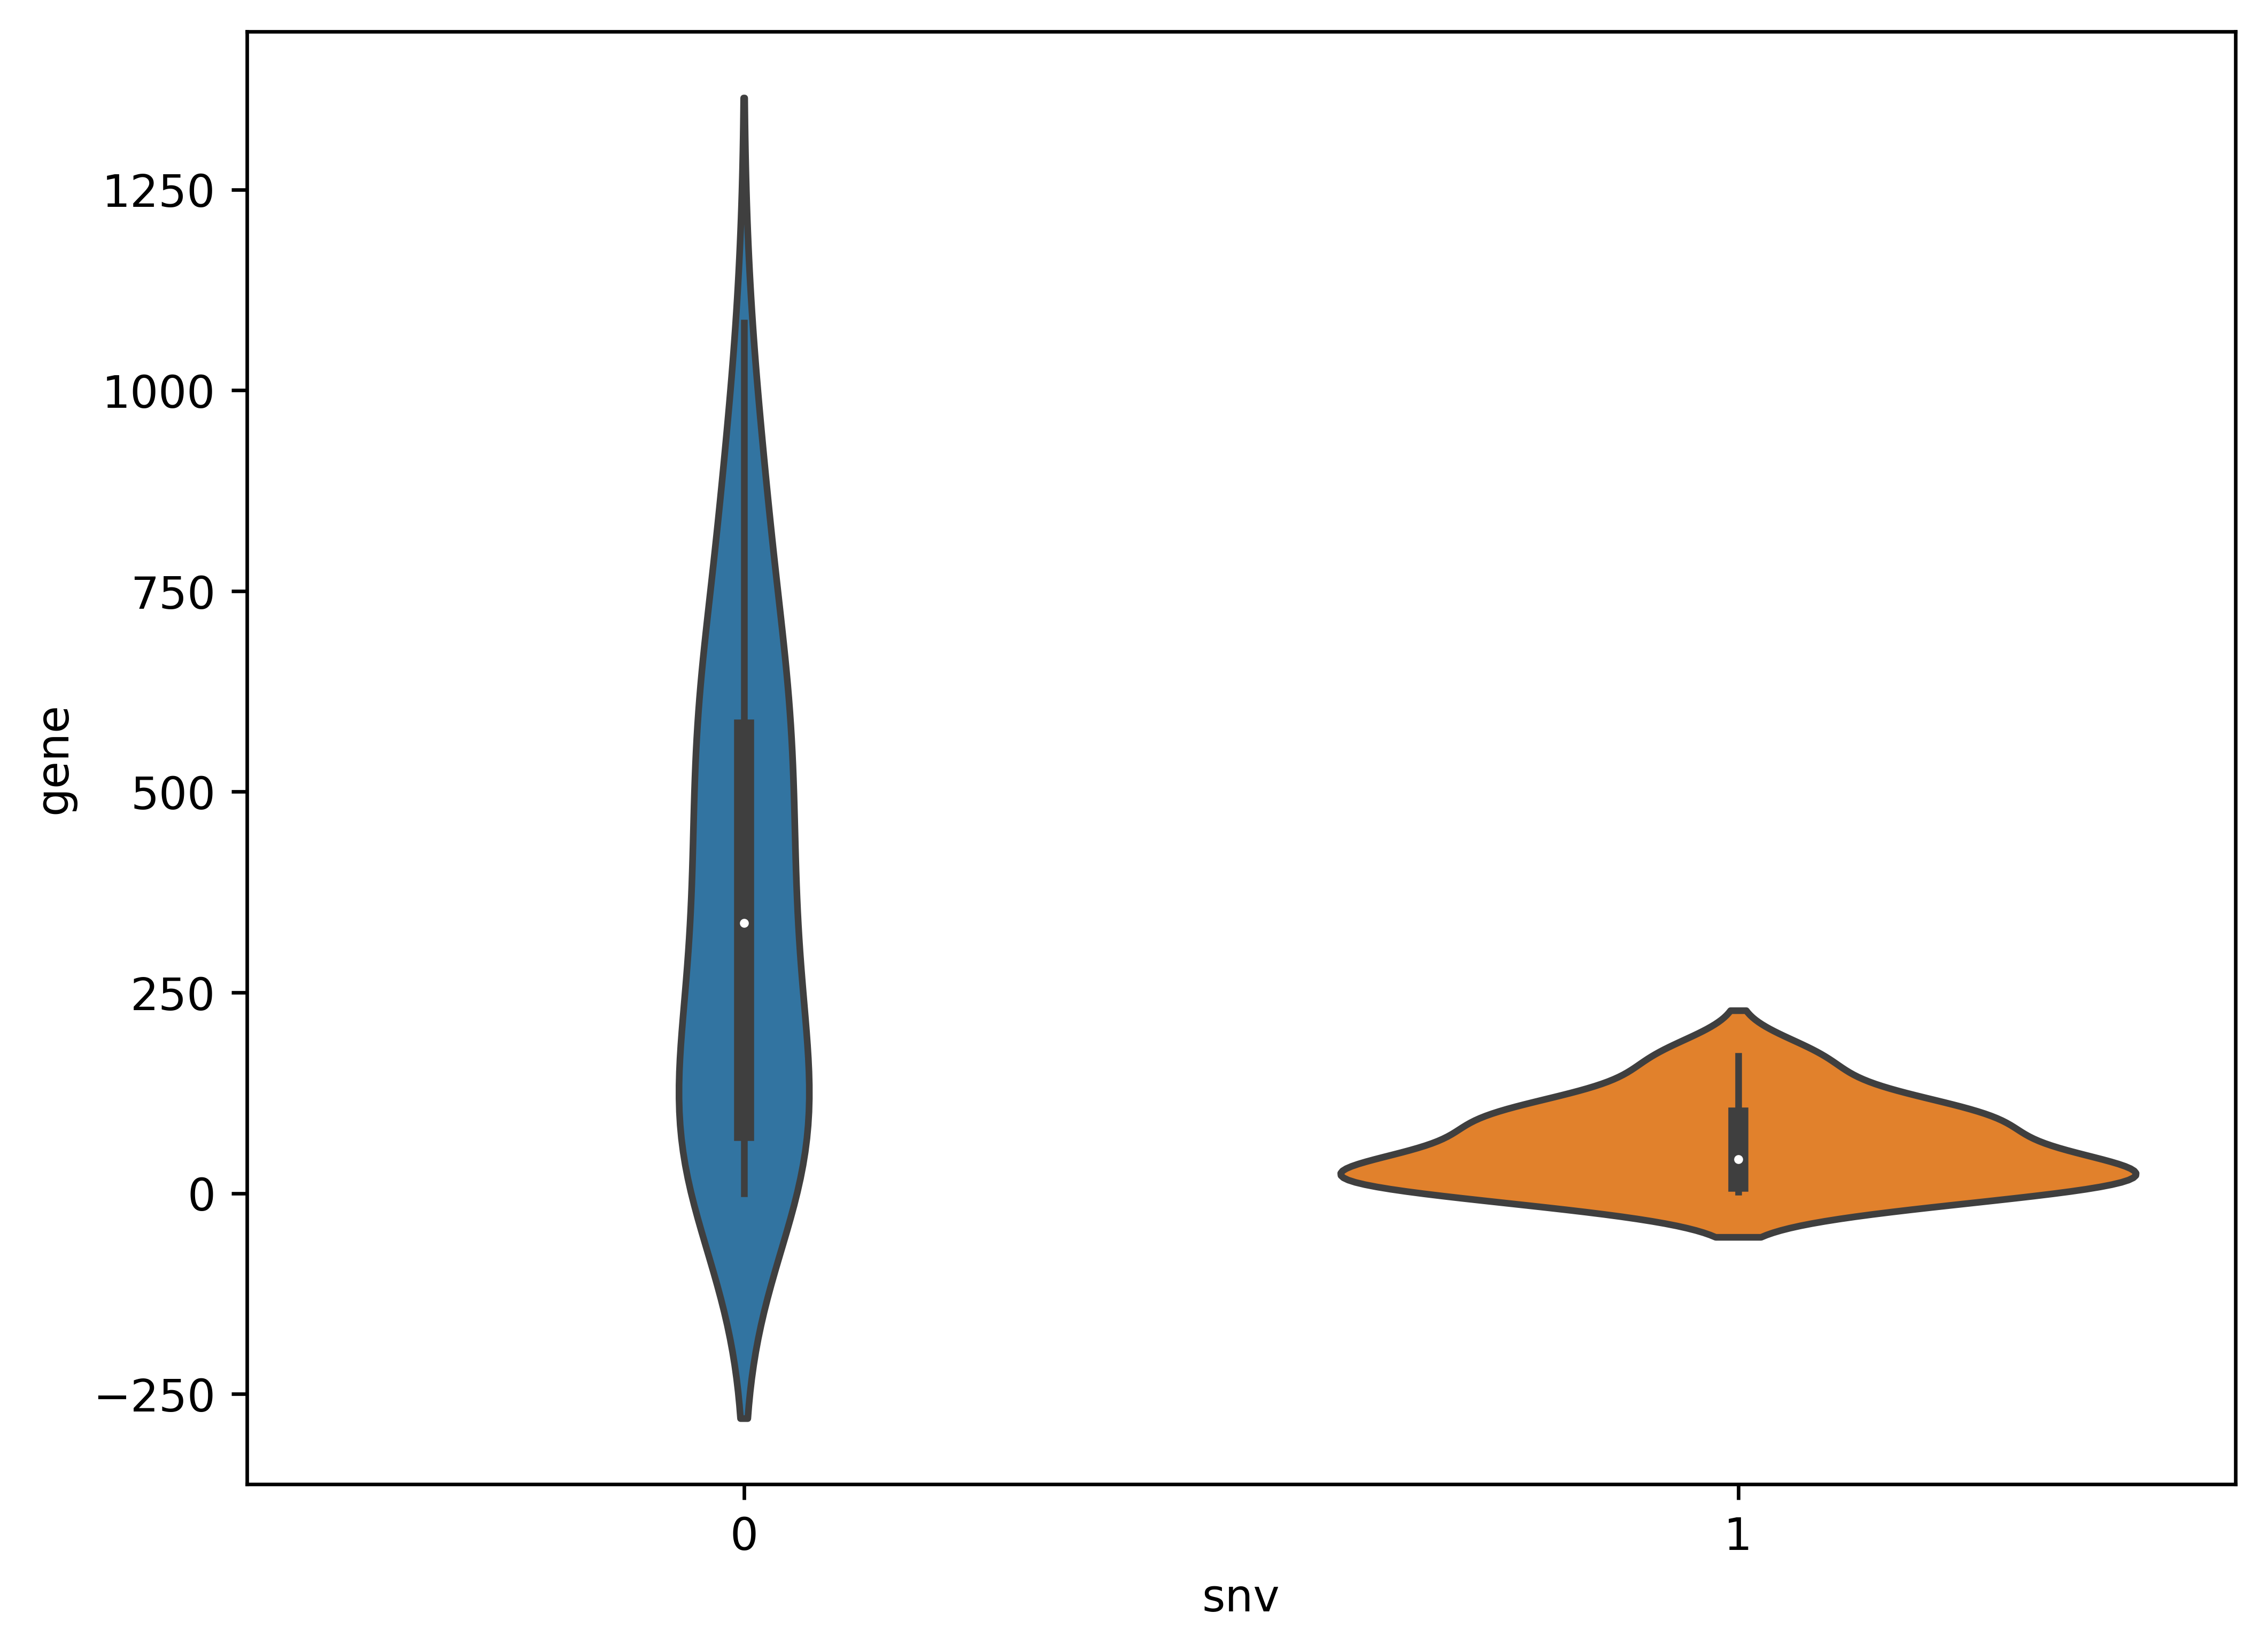

In [721]:
sns.violinplot(x="snv", y="gene", data=df)

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


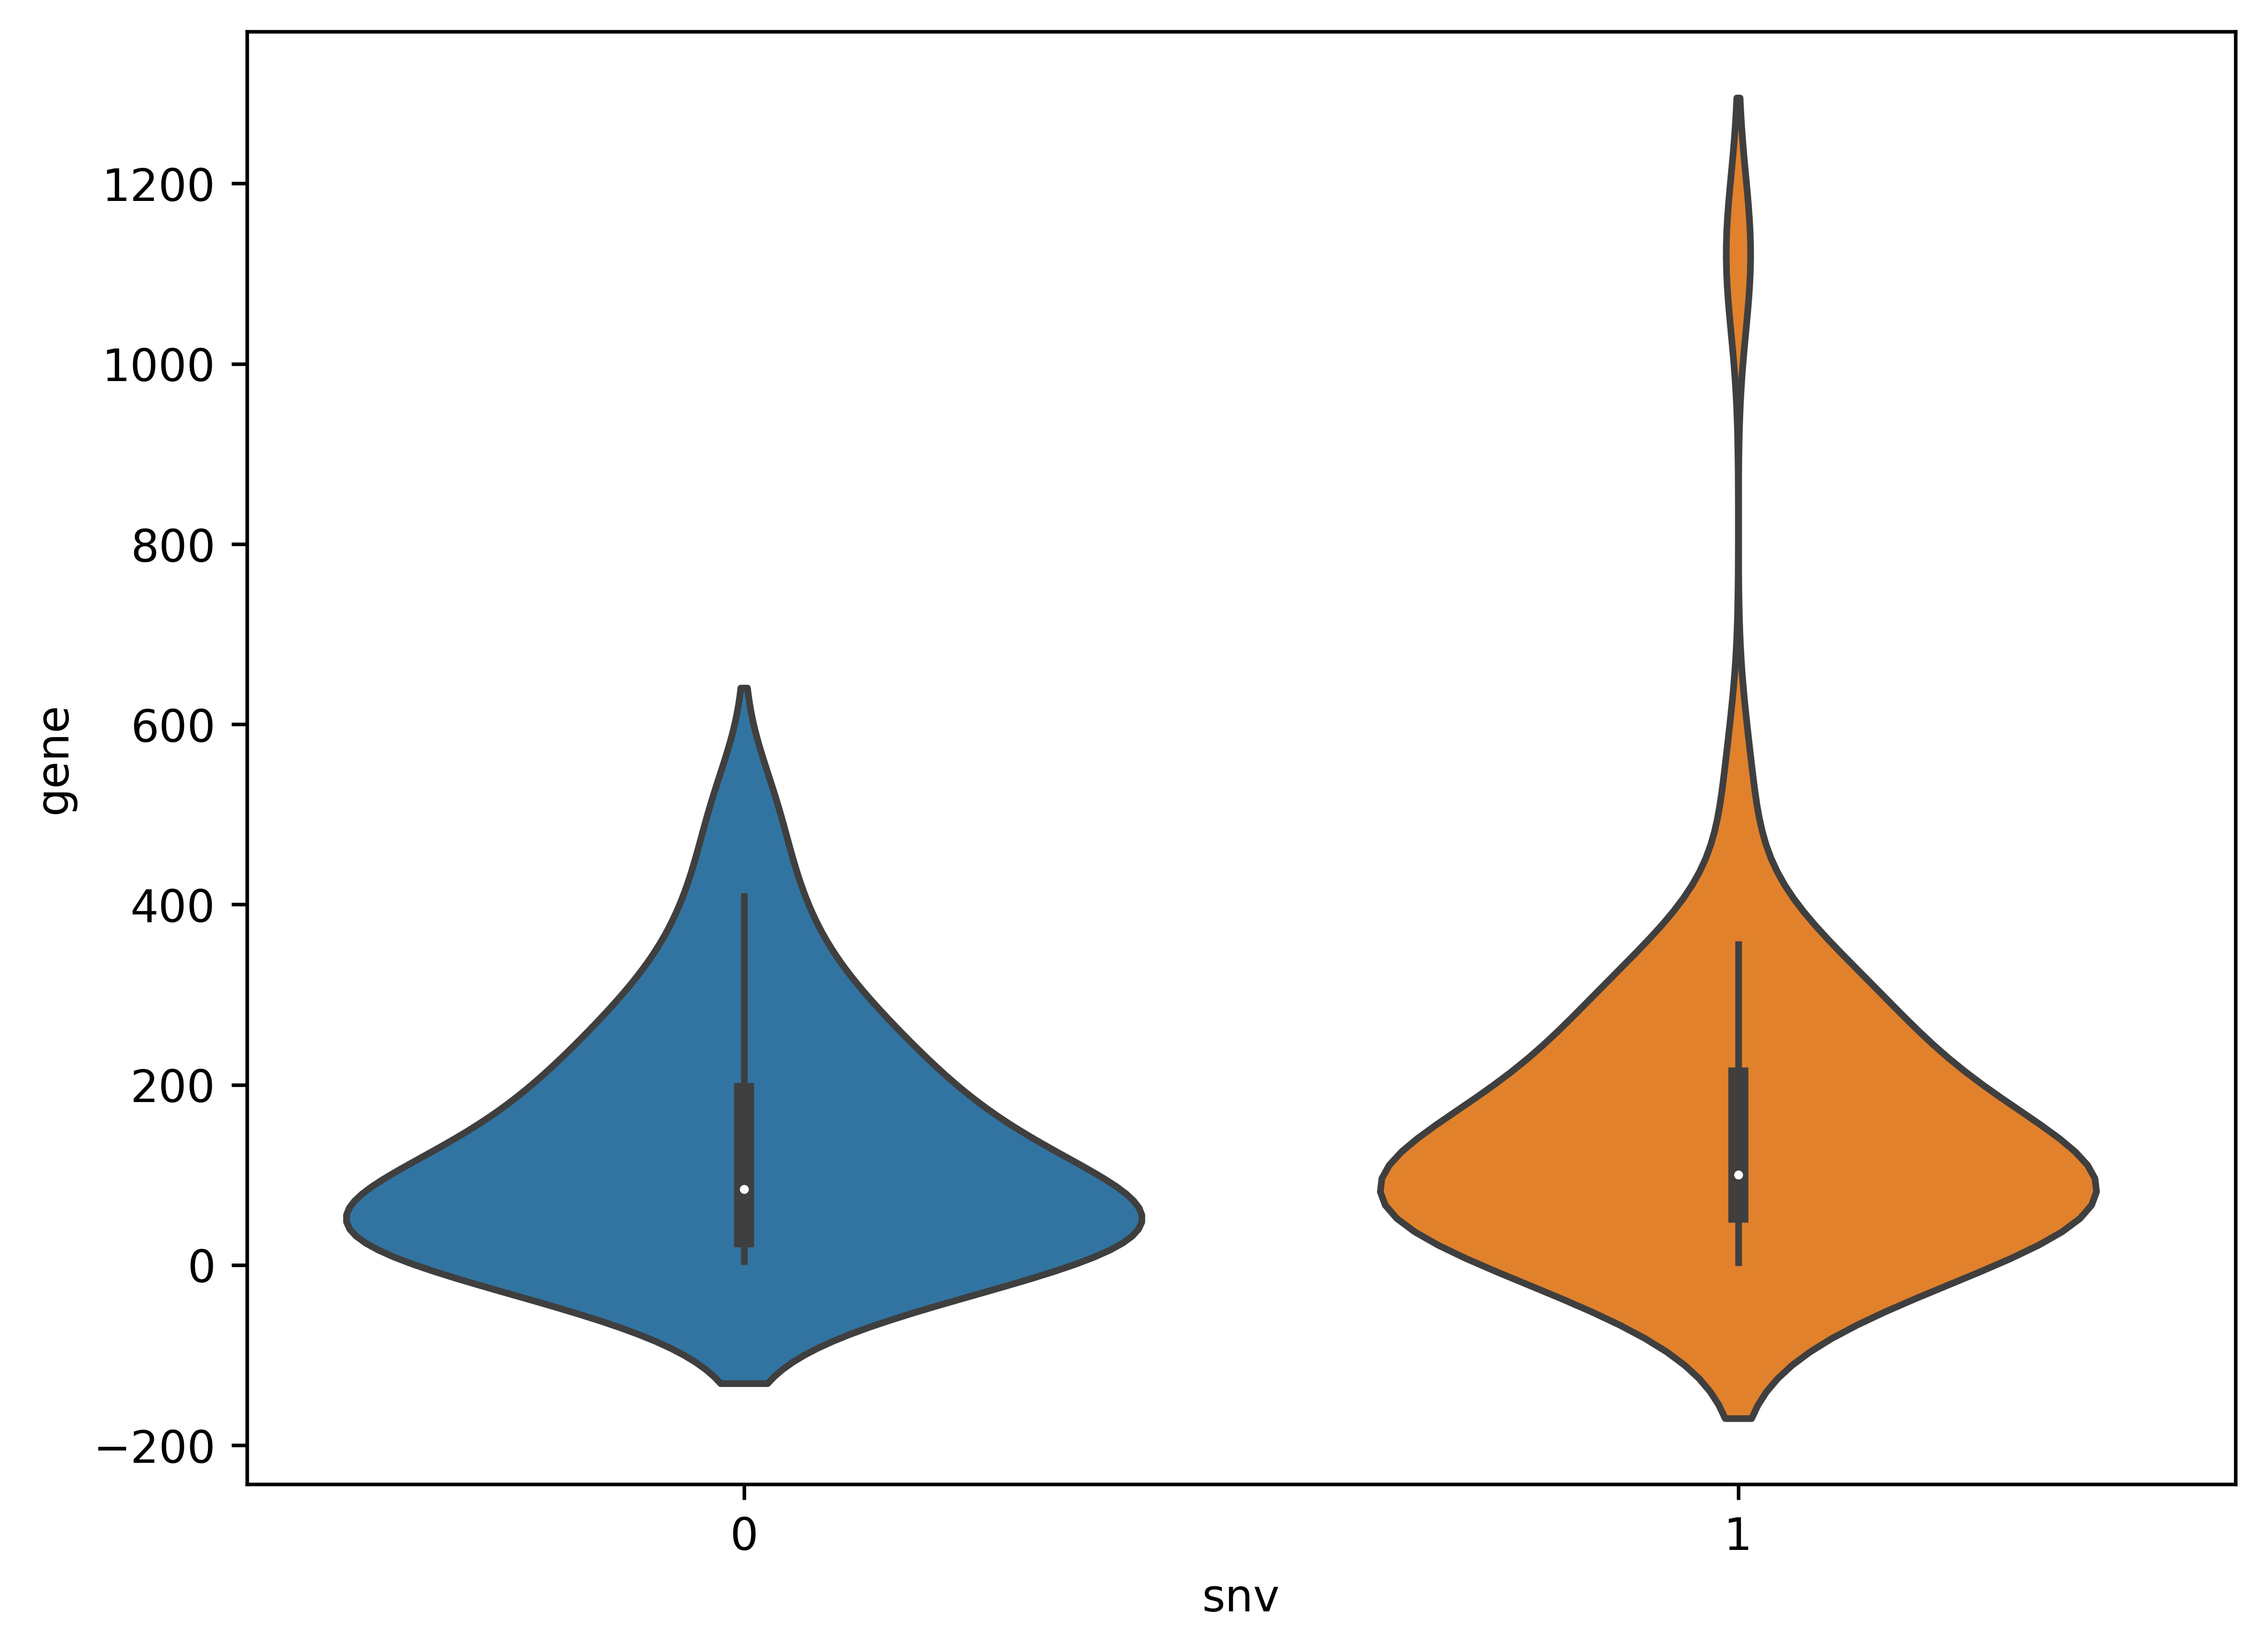

In [720]:
sns.violinplot(x="snv", y="gene", data=df2)

In [683]:
gtf_index_df = pd.read_csv("/data8t/mtx/scSNV/dataset_v1/kim/data/gtf_index/GTF_index.csv", index_col='Geneid')

In [705]:
gtf_index_df.loc['ENSG00000168036.12',]

chr              chr3
start        41236328
end          41301587
gene_name      CTNNB1
Name: ENSG00000168036.12, dtype: object

In [684]:
def search_snv_from_gtfindex(snv_list, gtf_index_df):
    # snv_list can be list or numpy array
    # for str, try to convert it to list(with only one snv)
    # each item in snv_list is named like chr7_123
    if isinstance(snv_list, str):
        snv_list = [snv_list]
    snv_location = defaultdict(list)
    j = 0
    for i in snv_list:
        j += 1
        if j%5000 == 0:
            print(j)
        chrom = i.split("__")[0]
        pos = int(i.split("__")[1])
        result_df = gtf_index_df[(gtf_index_df['chr'] == chrom) & (gtf_index_df['start'] <= pos) & (gtf_index_df['end'] >= pos)]
        gene_id_list = list(result_df.index.values)
        snv_location[i] = gene_id_list
    return snv_location

In [687]:
search_snv_from_gtfindex('chr6__29913042',gtf_index_df)

defaultdict(list, {'chr6__29913042': ['ENSG00000206503.7']})

In [706]:
gtf_index_df.loc['ENSG00000206503.7',]

chr              chr6
start        29909037
end          29913661
gene_name       HLA-A
Name: ENSG00000206503.7, dtype: object

In [692]:
exp_profile.loc['ENSG00000206503.7',gene_Pro.columns.values]

SRR1294493      3.306539
SRR1294498    477.439912
SRR1294499    438.987808
SRR1294500    527.200913
SRR1294503    106.029216
                 ...    
SRR1294930     16.829532
SRR1294941     59.602580
SRR1294944     39.144226
SRR1294948     25.597706
SRR1295066     48.100768
Name: ENSG00000206503.7, Length: 65, dtype: float64

In [724]:
df = pd.DataFrame({'gene':gene_Pro.loc['ENSG00000168036.12',:],
                   'snv':snv_Pro.loc['chr6__29913042',:],
                   'gene_snv':exp_profile.loc['ENSG00000206503.7',gene_Pro.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000206503.7',gene_Pro.columns.values]})

In [725]:
df

gene  snv    gene_snv  gene_snv_reads
SRR1294493     0    0    3.306539               1
SRR1294498    17    0  477.439912             567
SRR1294499   472    0  438.987808             216
SRR1294500   551    0  527.200913             874
SRR1294503     3    1  106.029216             204
...          ...  ...         ...             ...
SRR1294930   164    1   16.829532              28
SRR1294941    94    1   59.602580              69
SRR1294944    37    1   39.144226              58
SRR1294948    10    1   25.597706              30
SRR1295066    14    1   48.100768              45

[65 rows x 4 columns]

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


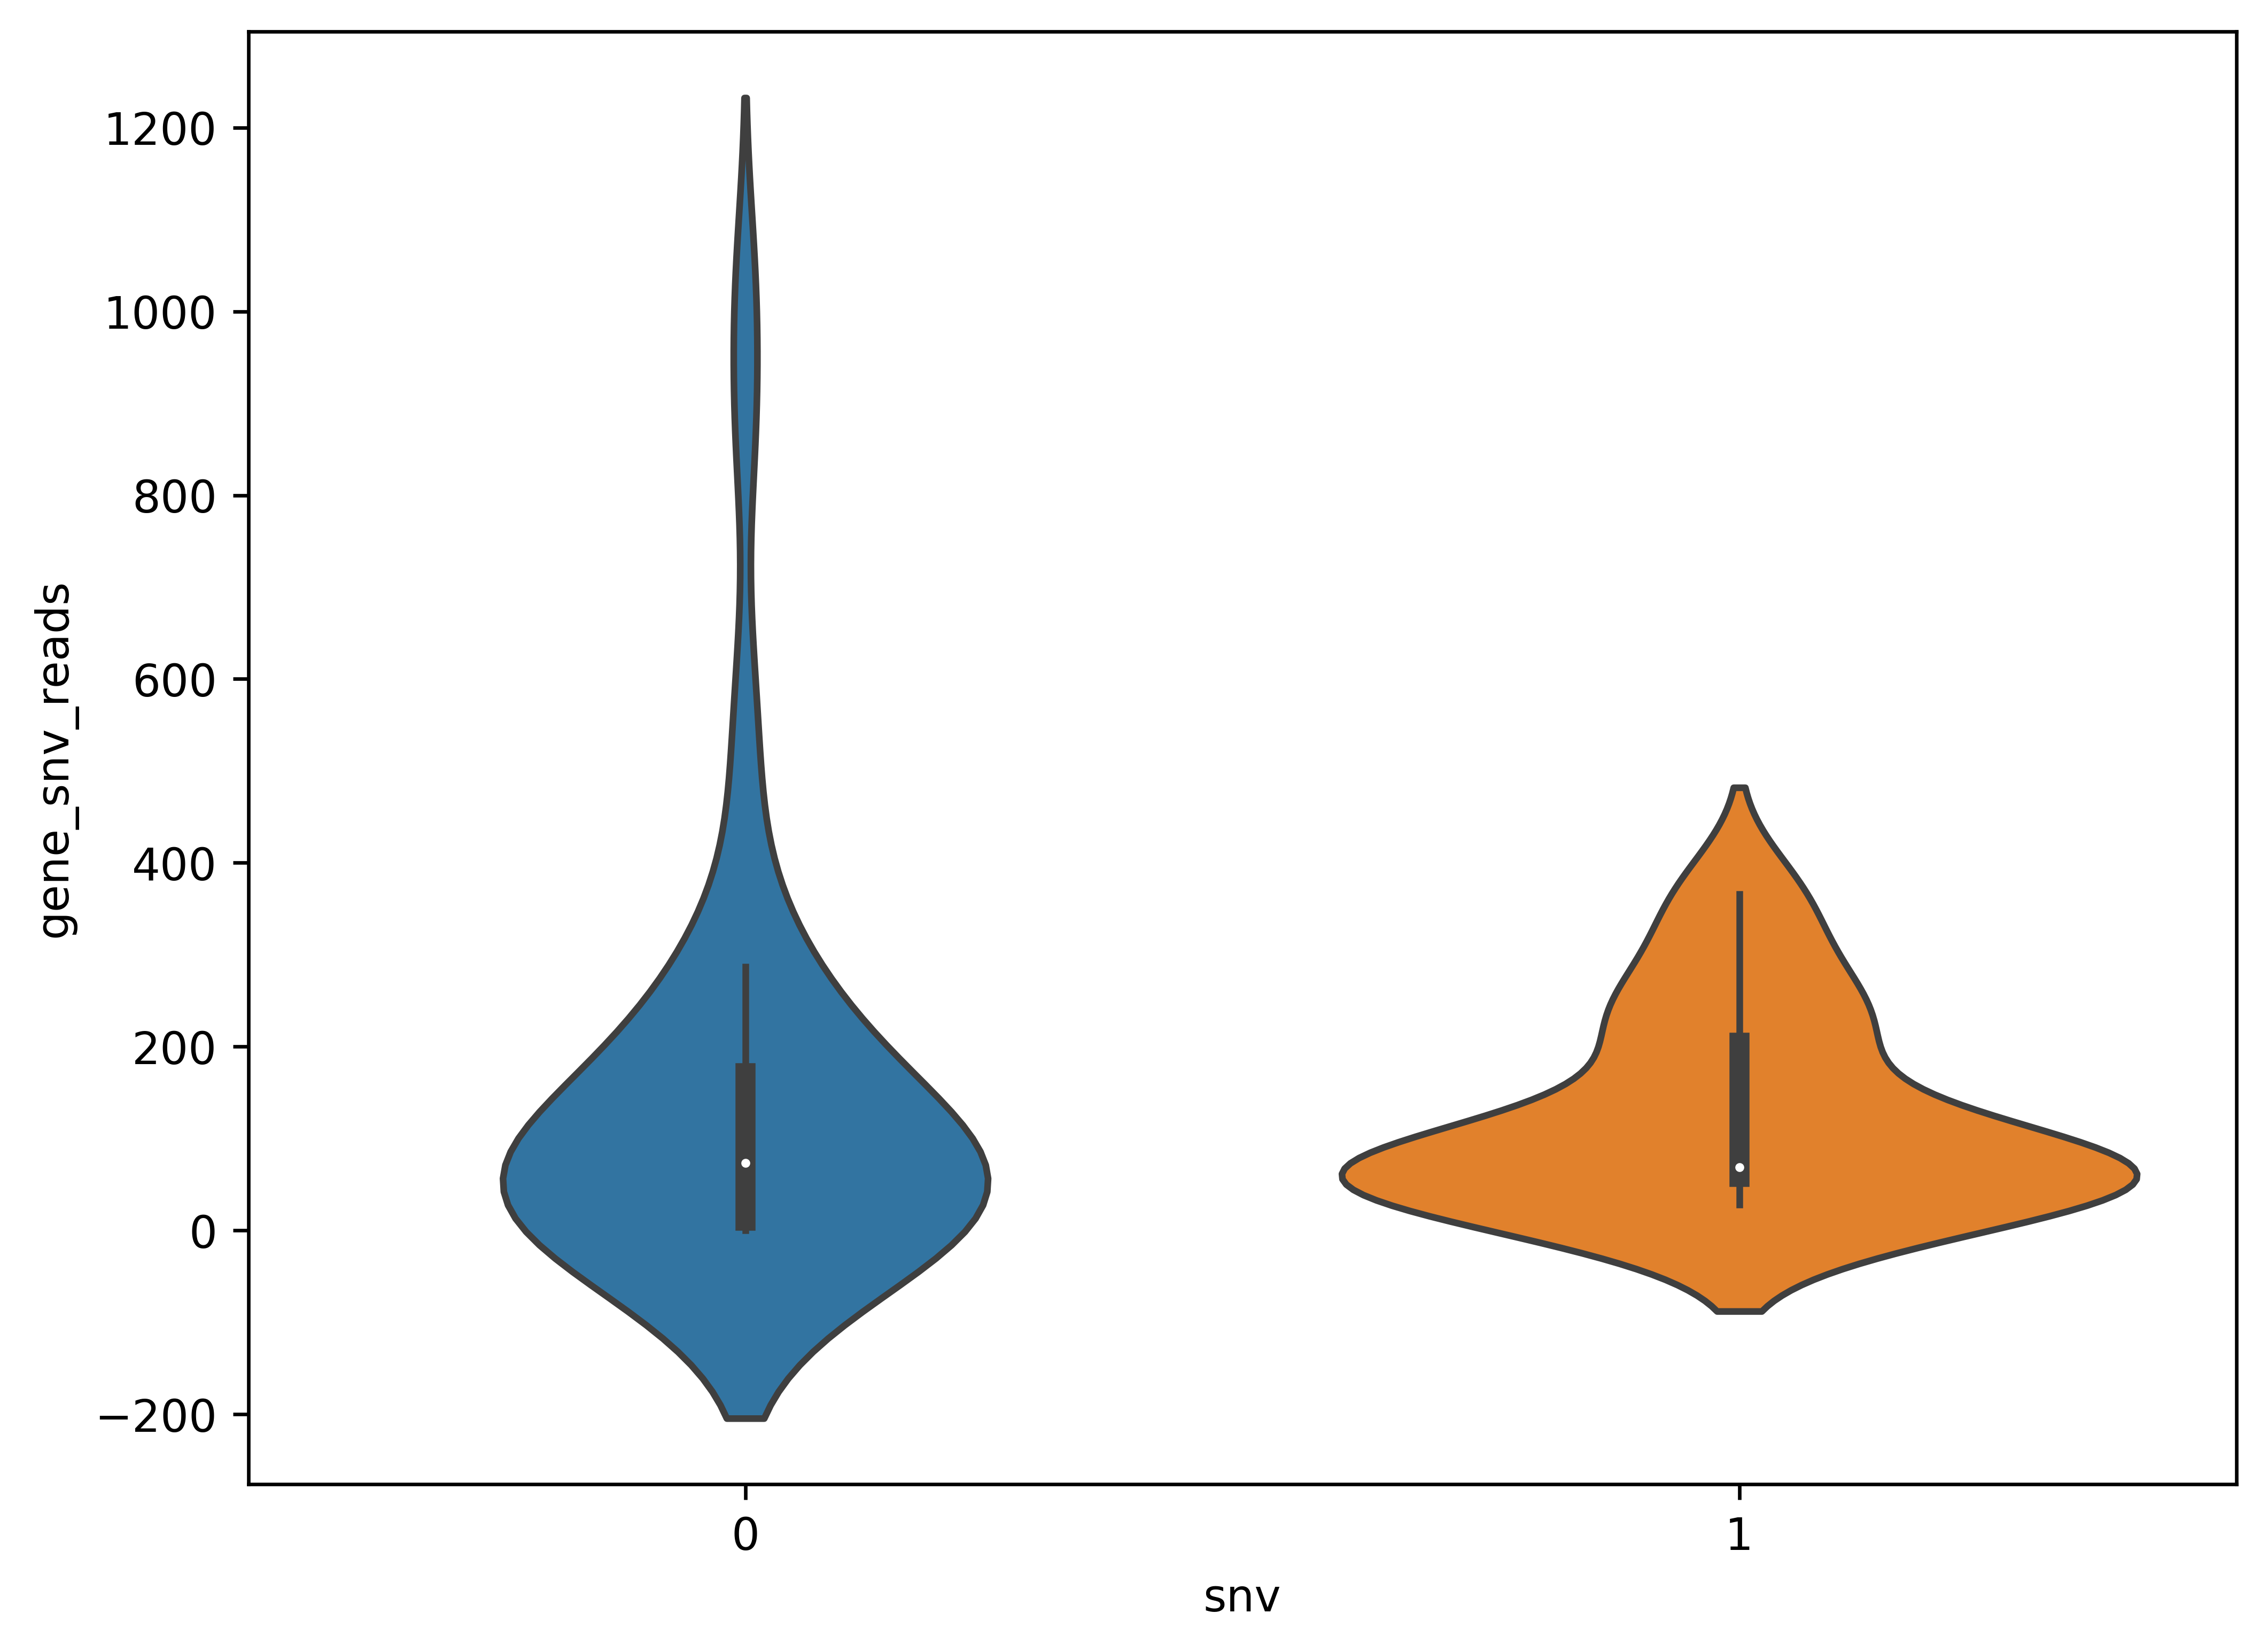

In [726]:
sns.violinplot(x="snv", y="gene_snv_reads", data=df)

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


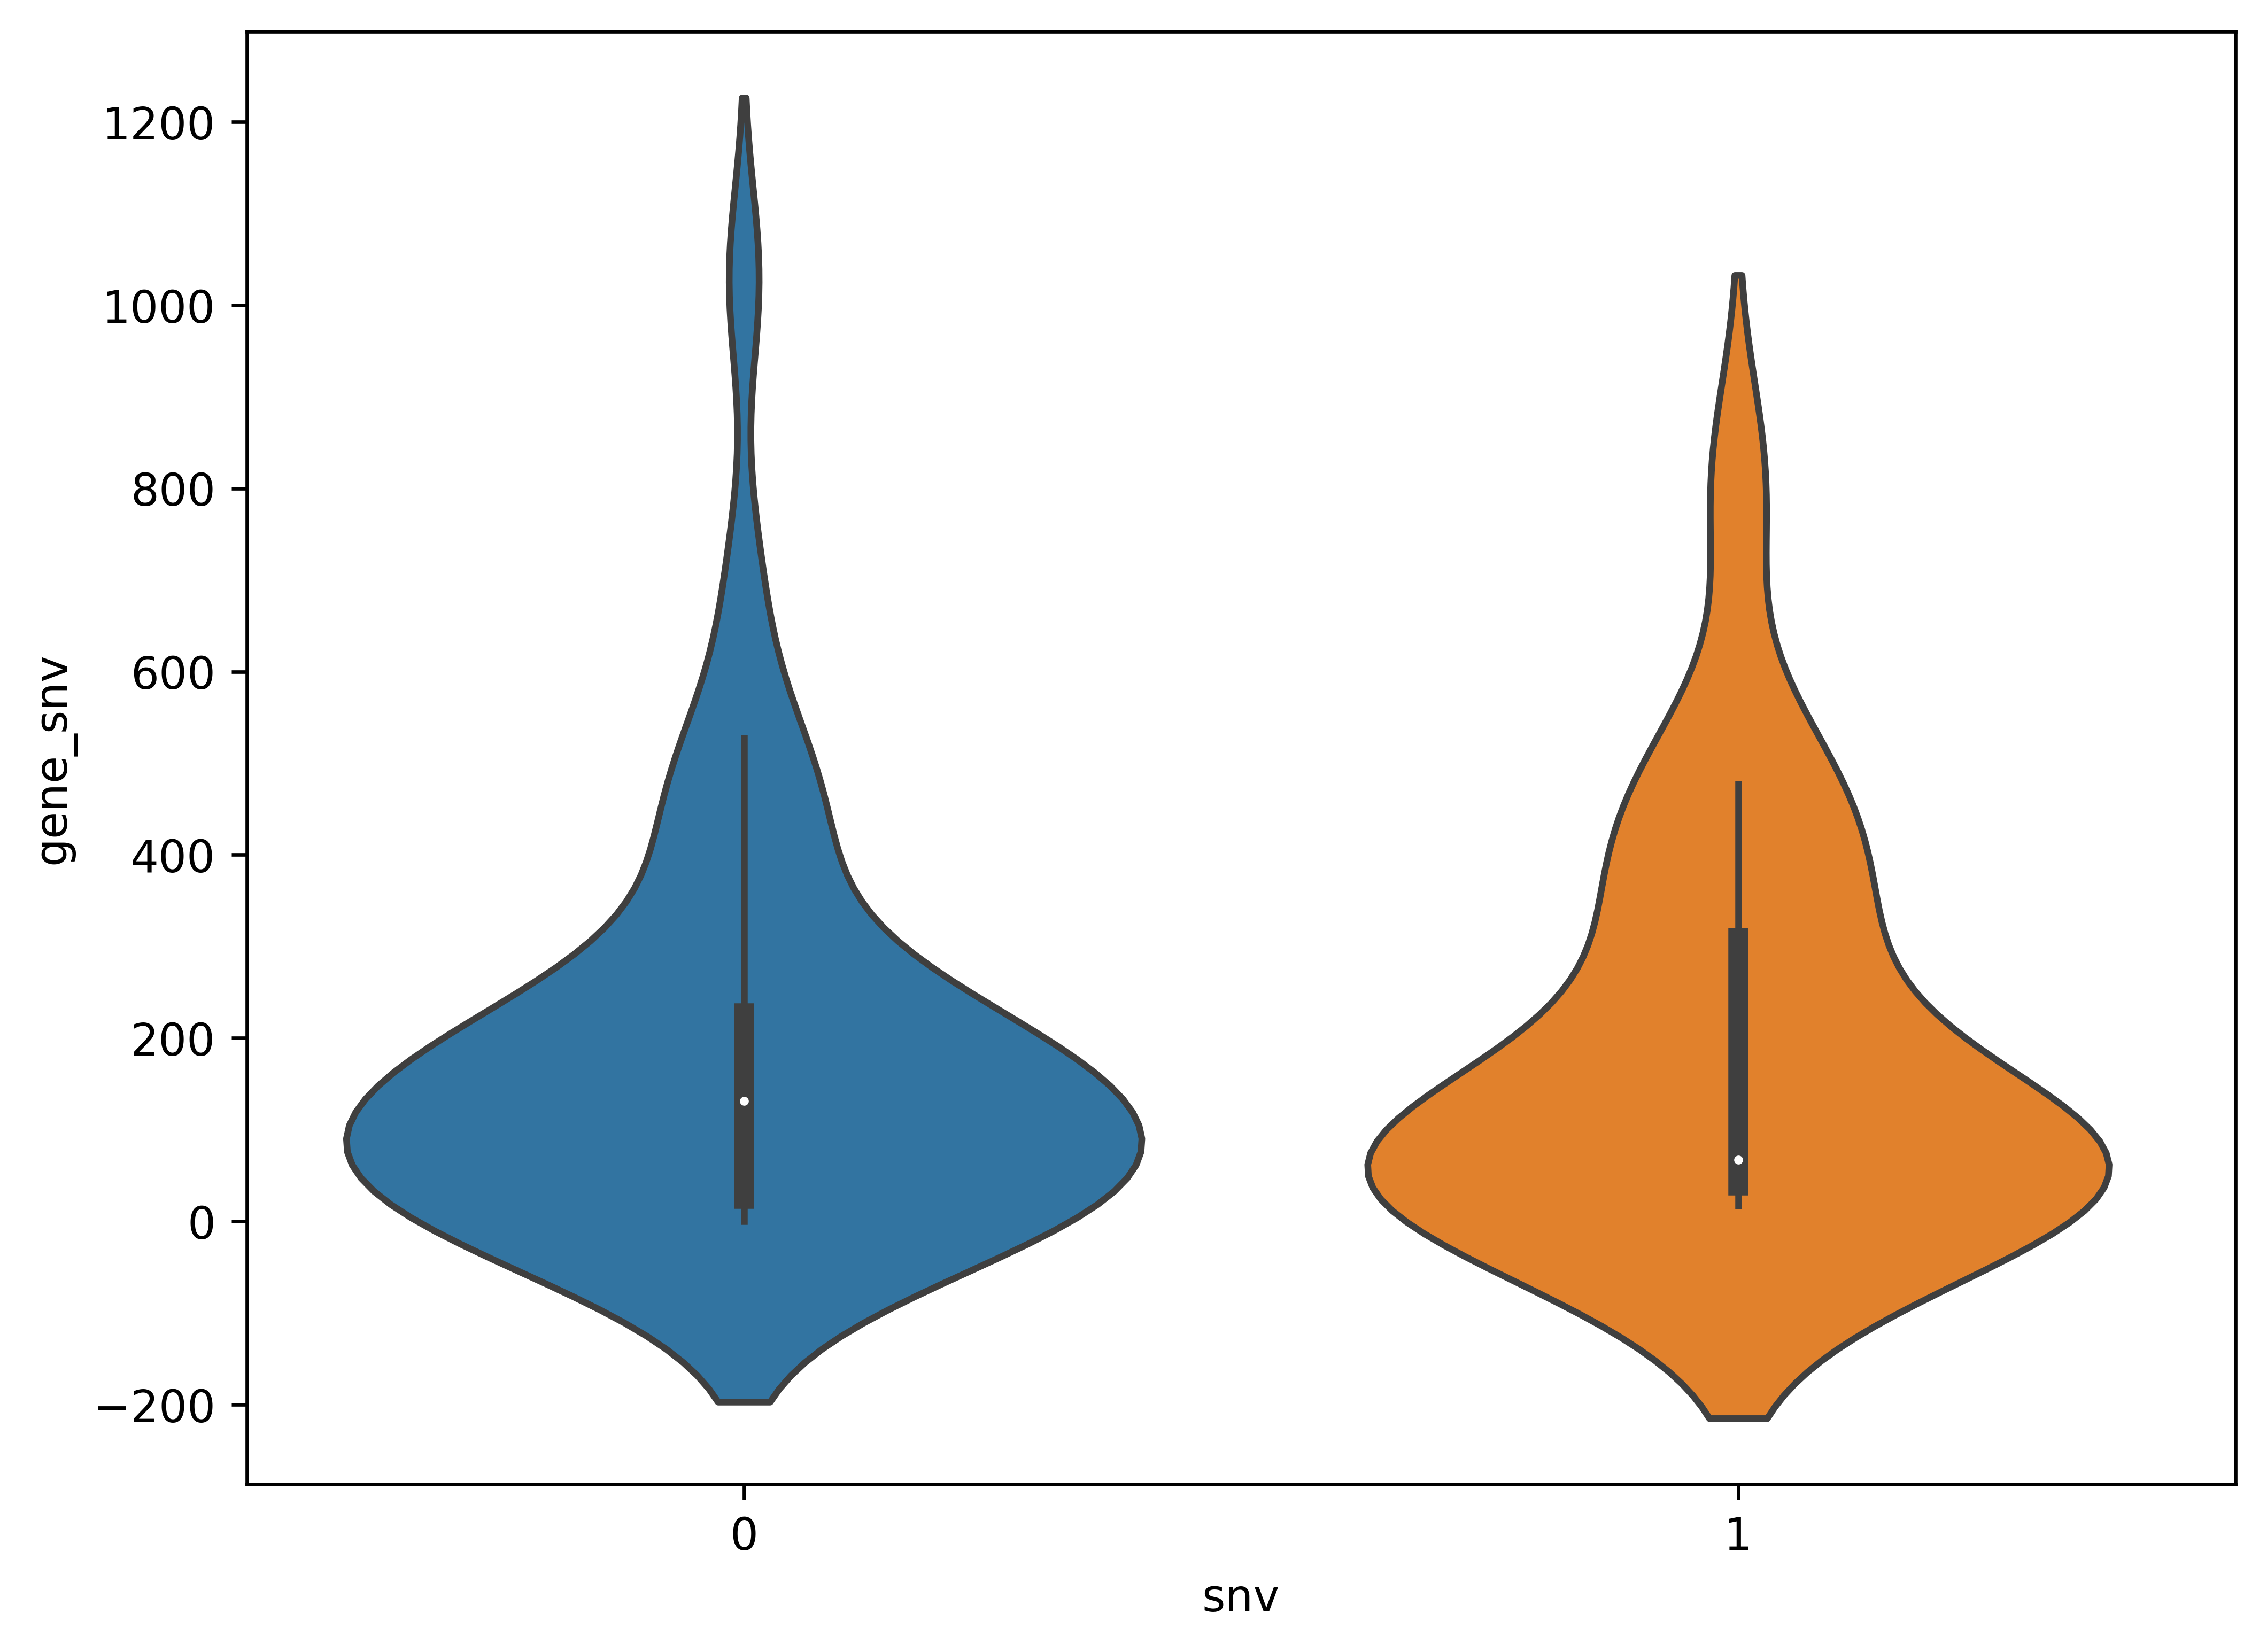

In [716]:
sns.violinplot(x="snv", y="gene_snv", data=df)

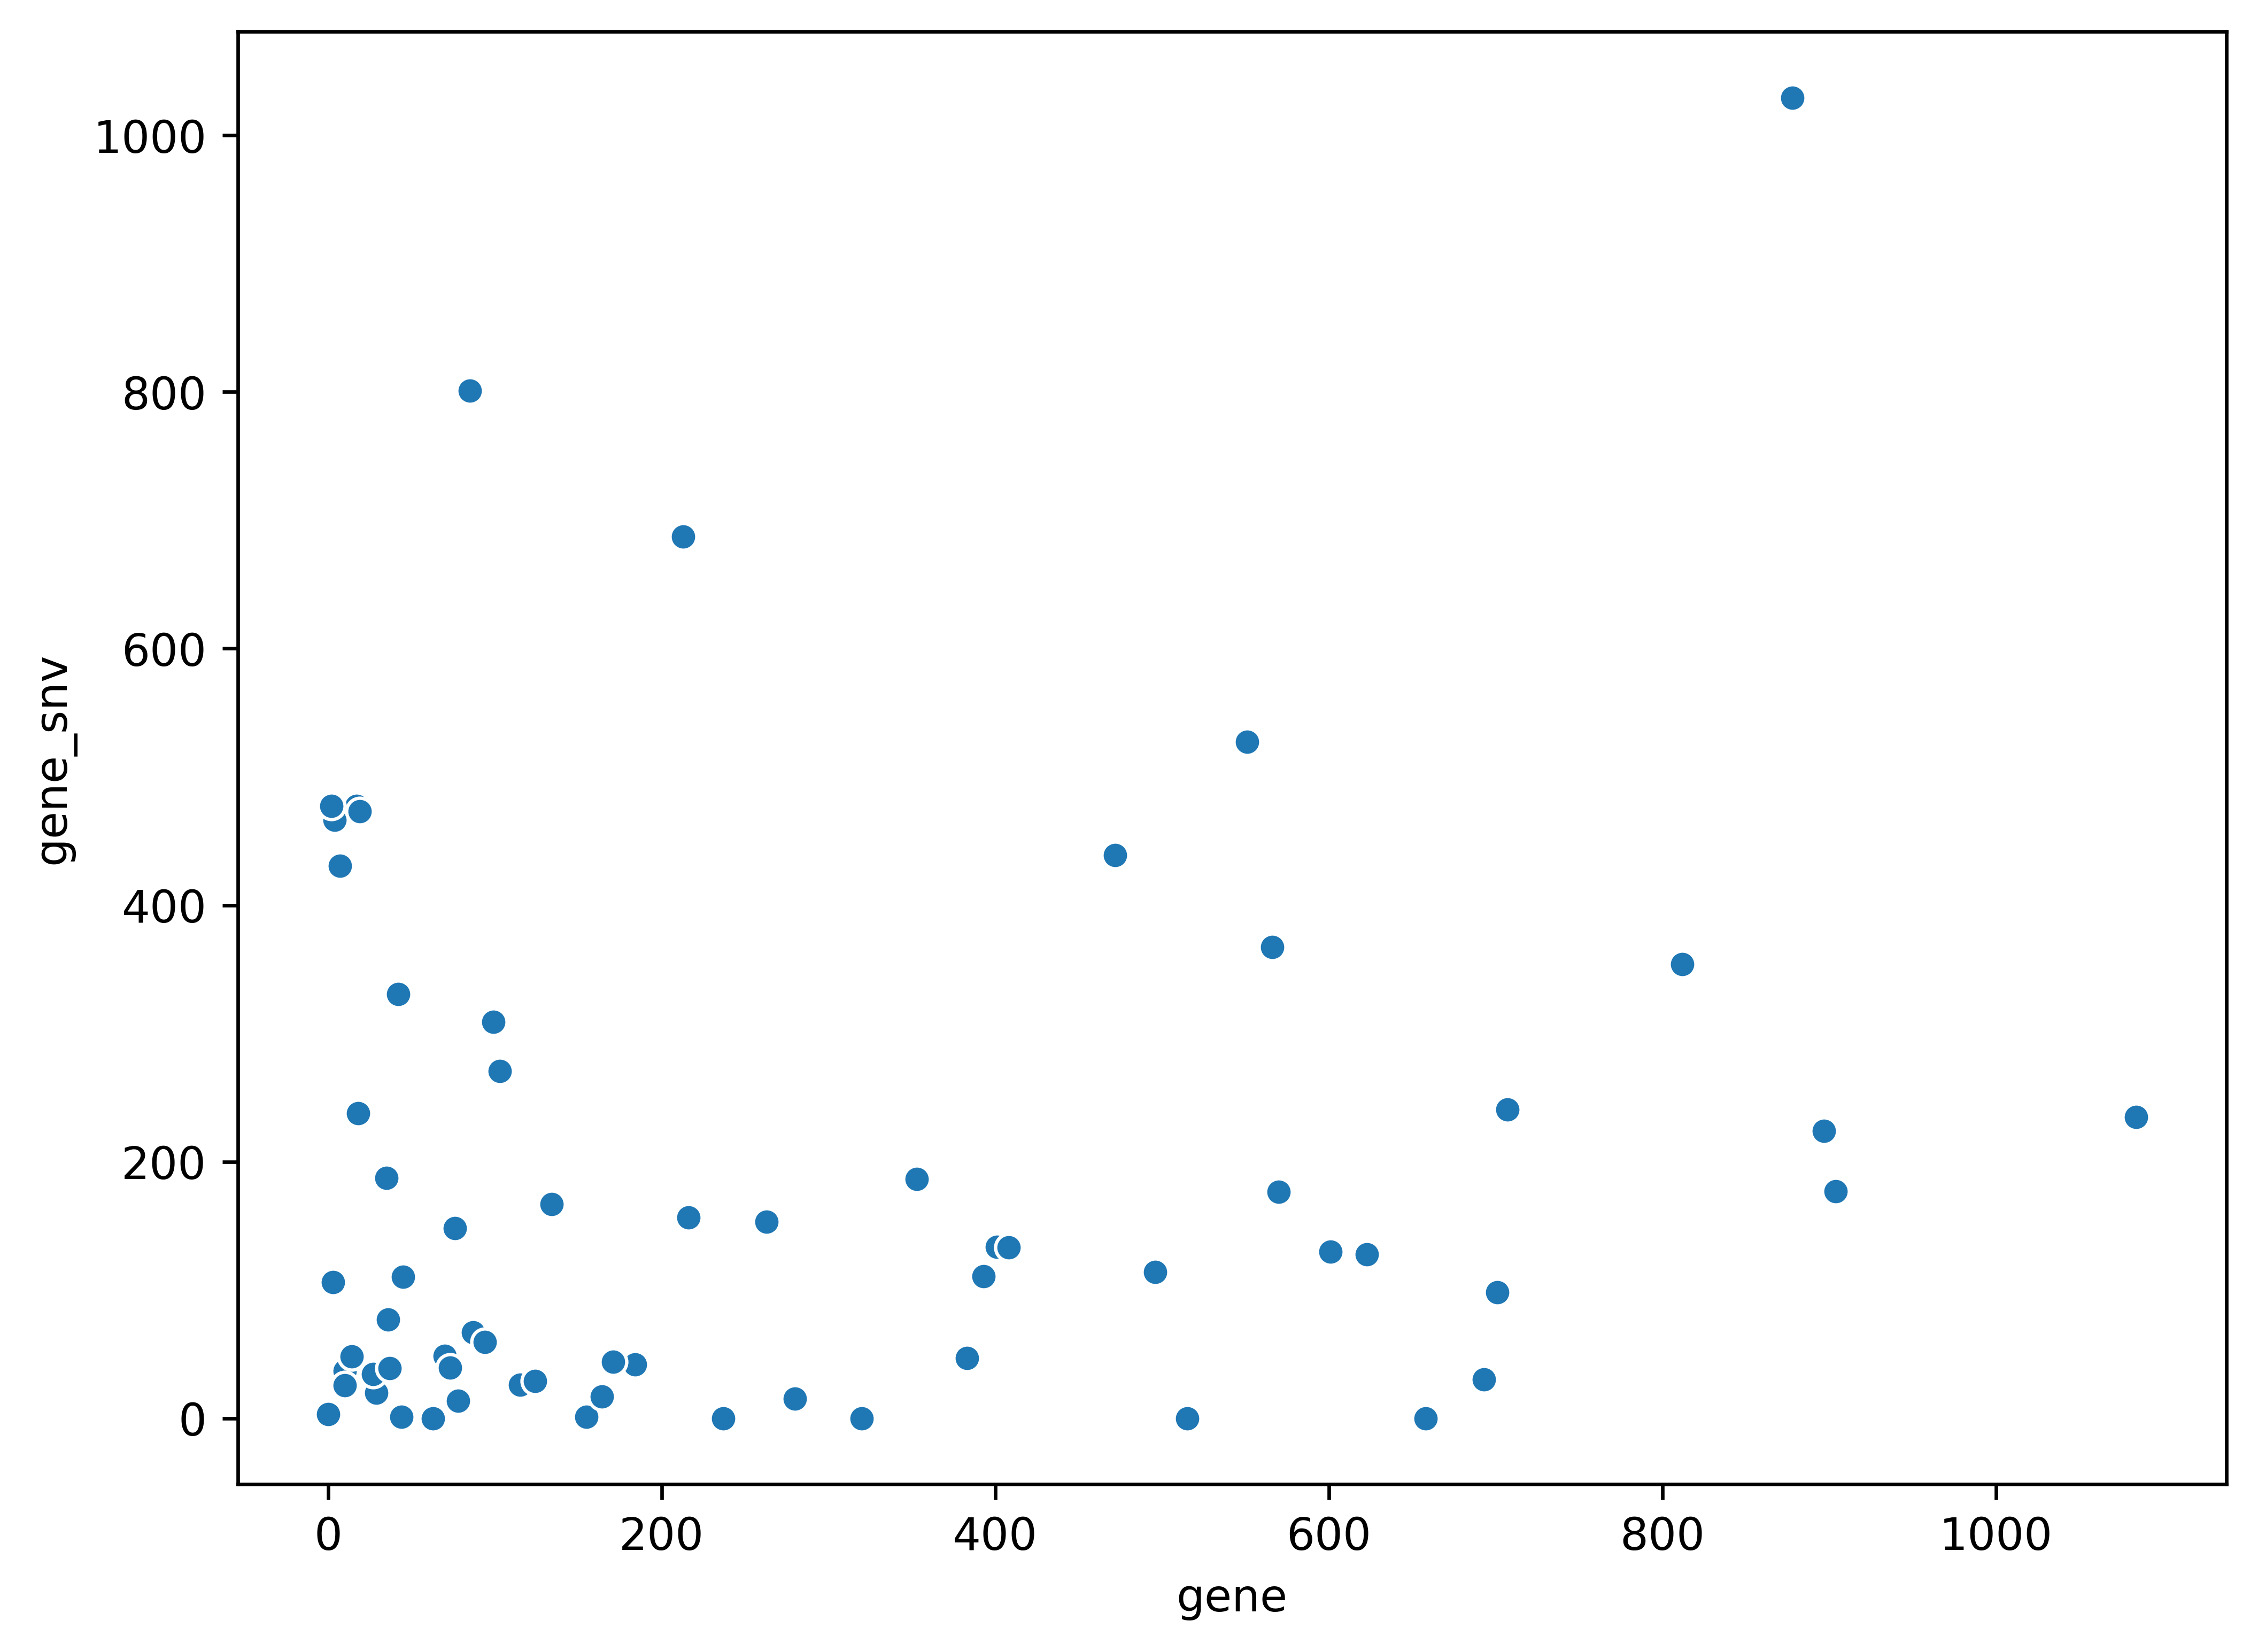

In [727]:
sns.scatterplot(x="gene", y="gene_snv", data=df)

In [723]:
df

gene  snv
SRR1294493     0    0
SRR1294498    17    0
SRR1294499   472    0
SRR1294500   551    0
SRR1294503     3    1
...          ...  ...
SRR1294930   164    1
SRR1294941    94    1
SRR1294944    37    1
SRR1294948    10    1
SRR1295066    14    1

[65 rows x 2 columns]

# Check Vcf

In [800]:
input_folder = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/snv/cell_level_snv"
suffix = "_filtered_pass.vcf"

In [876]:
# for Mes
vcf_positive_Mes = pd.DataFrame(index=only_Mes_filtered_df.snv.values, columns=gene_Mes_filtered.columns.values)
for sample in gene_Mes_filtered.columns.values:
    tmp_file = os.path.join(input_folder,sample+suffix)
    current_file = open(tmp_file, 'r')
    Lines = current_file.readlines()
    for line in Lines:
        if not line.startswith("#"):
            chrom = line.split()[0]
            position = line.split()[1]
            snv_index = chrom + "__" + position
            for snv in vcf_positive_Mes.index.values:
                if snv_index  == snv:
                    snp_index = line.split('\t')[2]
                    snp_ref = line.split('\t')[3]
                    snp_alt = line.split('\t')[4]
                    snp_gt = line.split('\t')[-1].split(":")[0]
                    snp_dp = line.split('\t')[-1].split(":")[2]
                    snp_info = snp_index + "__" + snp_ref + "__" + snp_alt + "__" + snp_gt + "__" + snp_dp
                    vcf_positive_Mes.loc[snv,sample] = snp_info
                    continue
vcf_positive_Mes.to_csv("positive_result_Mes_vcf.csv")

In [877]:
# for Pro
vcf_positive_Pro = pd.DataFrame(index=only_Pro_filtered_df.snv.values, columns=gene_Pro_filtered.columns.values)
for sample in gene_Pro_filtered.columns.values:
    tmp_file = os.path.join(input_folder,sample+suffix)
    current_file = open(tmp_file, 'r')
    Lines = current_file.readlines()
    for line in Lines:
        if not line.startswith("#"):
            chrom = line.split()[0]
            position = line.split()[1]
            snv_index = chrom + "__" + position
            for snv in vcf_positive_Pro.index.values:
                if snv_index  == snv:
                    snp_index = line.split('\t')[2]
                    snp_ref = line.split('\t')[3]
                    snp_alt = line.split('\t')[4]
                    snp_gt = line.split('\t')[-1].split(":")[0]
                    snp_dp = line.split('\t')[-1].split(":")[2]
                    snp_info = snp_index + "__" + snp_ref + "__" + snp_alt + "__" + snp_gt + "__" + snp_dp
                    vcf_positive_Pro.loc[snv,sample] = snp_info
                    continue
vcf_positive_Pro.to_csv("positive_result_Pro_vcf.csv")

In [878]:
vcf_positive_Pro

SRR1294493       SRR1294498       SRR1294499  \
chr11__16777342                NaN  .__G__A__1/1__3              NaN   
chr1__205683280                NaN              NaN  .__T__C__1/1__5   
chr4__42020142                 NaN              NaN              NaN   
chr11__62652779   .__C__T__1/1__10              NaN              NaN   
chr15__72637795    .__T__C__1/1__2              NaN              NaN   
chr10__135184126               NaN              NaN              NaN   
chr19__18054643    .__C__T__1/1__8              NaN              NaN   
chr7__127721507                NaN              NaN              NaN   
chr4__41992677                 NaN              NaN              NaN   
chr6__29913042                 NaN              NaN              NaN   
chr20__2633936     .__T__C__1/1__4  .__T__C__1/1__9  .__T__C__1/1__7   

                        SRR1294500        SRR1294503       SRR1294505  \
chr11__16777342    .__G__A__1/1__6  .__G__A__1/1__14              NaN   
chr1__205683280                NaN               NaN              NaN   
chr4__42020142    .__A__G__1/1__13  .__A__G__1/1__15              NaN   
chr11__62652779   .__C__T__0/1__56  .__C__T__0/1__94              NaN   
chr15__72637795                NaN               NaN  .__T__C__1/1__5   
chr10__135184126  .__G__A__1/1__13  .__G__A__1/1__17  .__G__A__1/1__3   
chr19__18054643   .__C__T__0/1__14               NaN  .__C__T__1/1__4   
chr7__127721507                NaN  .__T__C__1/1__17              NaN   
chr4__41992677    .__C__G__1/1__14   .__C__G__1/1__5              NaN   
chr6__29913042                 NaN  .__C__T__1/1__13              NaN   
chr20__2633936    .__T__C__1/1__14               NaN              NaN   

                        SRR1294508       SRR1294515        SRR1294530  \
chr11__16777342                NaN              NaN   .__G__A__1/1__2   
chr1__205683280                NaN              NaN               NaN   
chr4__42020142                 NaN              NaN               NaN   
chr11__62652779    .__C__T__0/1__9              NaN               NaN   
chr15__72637795                NaN  .__T__C__1/1__4               NaN   
chr10__135184126               NaN              NaN               NaN   
chr19__18054643    .__C__T__0/1__5  .__C__T__1/1__5               NaN   
chr7__127721507                NaN              NaN  .__T__C__1/1__10   
chr4__41992677                 NaN              NaN               NaN   
chr6__29913042    .__C__T__0/1__28              NaN               NaN   
chr20__2633936     .__T__C__1/1__8              NaN   .__T__C__1/1__3   

                 SRR1294544  ...       SRR1294829        SRR1294839  \
chr11__16777342         NaN  ...  .__G__A__1/1__3               NaN   
chr1__205683280         NaN  ...              NaN   .__T__C__1/1__2   
chr4__42020142          NaN  ...  .__A__G__1/1__3               NaN   
chr11__62652779         NaN  ...              NaN               NaN   
chr15__72637795         NaN  ...  .__T__C__1/1__2               NaN   
chr10__135184126        NaN  ...              NaN   .__G__A__1/1__5   
chr19__18054643         NaN  ...              NaN               NaN   
chr7__127721507         NaN  ...              NaN               NaN   
chr4__41992677          NaN  ...  .__C__G__1/1__3   .__C__G__1/1__3   
chr6__29913042          NaN  ...  .__C__T__1/1__2   .__C__T__1/1__5   
chr20__2633936          NaN  ...  .__T__C__1/1__5  .__T__C__1/1__11   

                        SRR1294844       SRR1294910        SRR1294916  \
chr11__16777342                NaN              NaN               NaN   
chr1__205683280   .__T__C__1/1__20              NaN  .__T__C__1/1__36   
chr4__42020142     .__A__G__1/1__9              NaN   .__A__G__1/1__4   
chr11__62652779                NaN  .__C__T__1/1__4  .__C__T__0/1__16   
chr15__72637795                NaN              NaN               NaN   
chr10__135184126  .__G__A__1/1__13  .__G__A__1/1__5               NaN   
chr19__18054643                NaN       

# Random SNVs for Haochen

In [942]:
import random
# random.setstate(123)
useful_snv_Mes = (snv_Mes ==1).sum(axis=1)[(snv_Mes ==1).sum(axis=1) > 5].index.values
random_snv_Mes = useful_snv_Mes[random.sample(range(len(useful_snv_Mes)), k=1000)]

# for Mes
vcf_positive_Mes = pd.DataFrame(index=random_snv_Mes, columns=gene_Mes_filtered.columns.values)
for sample in gene_Mes_filtered.columns.values:
    tmp_file = os.path.join(input_folder,sample+suffix)
    current_file = open(tmp_file, 'r')
    Lines = current_file.readlines()
    for line in Lines:
        if not line.startswith("#"):
            chrom = line.split()[0]
            position = line.split()[1]
            snv_index = chrom + "__" + position
            for snv in random_snv_Mes:
                if snv_index  == snv:
                    snp_index = line.split('\t')[2]
                    snp_ref = line.split('\t')[3]
                    snp_alt = line.split('\t')[4]
                    snp_gt = line.split('\t')[-1].split(":")[0]
                    snp_dp = line.split('\t')[-1].split(":")[2]
                    snp_info = snp_index + "__" + snp_ref + "__" + snp_alt + "__" + snp_gt + "__" + snp_dp
                    vcf_positive_Mes.loc[snv,sample] = snp_info
                    continue
vcf_positive_Mes_T = vcf_positive_Mes.transpose()
vcf_positive_Mes_no_sample = pd.DataFrame(index=random_snv_Mes, columns=['chr','pos','id','Ref','Alt'])
for snv in vcf_positive_Mes_T.columns.values:
    # chr
    vcf_positive_Mes_no_sample.loc[snv,'chr'] = snv.split('__')[0]
    # pos
    vcf_positive_Mes_no_sample.loc[snv,'pos'] = snv.split('__')[1]
    # id
    vcf_positive_Mes_no_sample.loc[snv,'id'] = vcf_positive_Mes_T[snv].dropna().str.split('__')[0][0]
    # ref
    vcf_positive_Mes_no_sample.loc[snv,'Ref'] = vcf_positive_Mes_T[snv].dropna().str.split('__')[0][1]
    # alt
    vcf_positive_Mes_no_sample.loc[snv,'Alt'] = vcf_positive_Mes_T[snv].dropna().str.split('__')[0][2]

    
    
useful_snv_Pro = (snv_Pro ==1).sum(axis=1)[(snv_Pro ==1).sum(axis=1) > 5].index.values
random_snv_Pro = useful_snv_Pro[random.sample(range(len(useful_snv_Pro)), k=1000)]

# for Pro
vcf_positive_Pro = pd.DataFrame(index=random_snv_Pro, columns=gene_Pro_filtered.columns.values)
for sample in gene_Pro_filtered.columns.values:
    tmp_file = os.path.join(input_folder,sample+suffix)
    current_file = open(tmp_file, 'r')
    Lines = current_file.readlines()
    for line in Lines:
        if not line.startswith("#"):
            chrom = line.split()[0]
            position = line.split()[1]
            snv_index = chrom + "__" + position
            for snv in random_snv_Pro:
                if snv_index  == snv:
                    snp_index = line.split('\t')[2]
                    snp_ref = line.split('\t')[3]
                    snp_alt = line.split('\t')[4]
                    snp_gt = line.split('\t')[-1].split(":")[0]
                    snp_dp = line.split('\t')[-1].split(":")[2]
                    snp_info = snp_index + "__" + snp_ref + "__" + snp_alt + "__" + snp_gt + "__" + snp_dp
                    vcf_positive_Pro.loc[snv,sample] = snp_info
                    continue
vcf_positive_Pro_T = vcf_positive_Pro.transpose()
vcf_positive_Pro_no_sample = pd.DataFrame(index=random_snv_Pro, columns=['chr','pos','id','Ref','Alt'])
for snv in vcf_positive_Pro_T.columns.values:
    # chr
    vcf_positive_Pro_no_sample.loc[snv,'chr'] = snv.split('__')[0]
    # pos
    vcf_positive_Pro_no_sample.loc[snv,'pos'] = snv.split('__')[1]
    # id
    vcf_positive_Pro_no_sample.loc[snv,'id'] = vcf_positive_Pro_T[snv].dropna().str.split('__')[0][0]
    # ref
    vcf_positive_Pro_no_sample.loc[snv,'Ref'] = vcf_positive_Pro_T[snv].dropna().str.split('__')[0][1]
    # alt
    vcf_positive_Pro_no_sample.loc[snv,'Alt'] = vcf_positive_Pro_T[snv].dropna().str.split('__')[0][2]


In [944]:
vcf_positive_Mes.to_csv('random_WholeInfo_Mes.csv')
vcf_positive_Pro.to_csv('random_WholeInfo_Pro.csv')

In [946]:
vcf_positive_Mes_no_sample.to_csv('random_PureInfo_Mes.csv')
vcf_positive_Pro_no_sample.to_csv('random_PureInfo_Pro.csv')